# Thinking with Deep Learning: Week 8
# Auto-encoders, Network & Table Learning

__Instructor:__ James Evans

__Notebook Author:__ Bhargav Srinivasa Desikan, Shiyang, Avi

__Perform 3 out of this week's following 4 modules:__


**Module 1: Embedding Social Networks**
This part explores **why** and **how** to build deep neural models over social, communication, or interaction networks. We start by reviewing network properties and generative models, then **practical methods** to encode and transform them (e.g., from text or other media). We introduce **deep** neural network approaches to:
1. **Predict associations** in graphs (e.g., link prediction).  
2. **Identify communities** and classify nodes.  
3. **Embed** graph-structured or tabular data (where tables can be treated as adjacency matrices).  
4. **Deal with alternative geometries** (e.g., hyperbolic or spherical) that can better encode hierarchical or cyclical relationships.


**Module 2: Auto-Encoders & Table Learning**  
This module covers **why** and **how** auto-encoders (AEs) can model and compress tabular data for tasks such as dimensionality reduction or missing-value imputation. We begin by reviewing basic feed-forward auto-encoders and move to **variational** auto-encoders (VAEs) for more powerful generative modeling. We then see how to treat tables as adjacency matrices (e.g., in collaborative filtering) for embedding and prediction tasks.

1. **Encode tabular data** using feed-forward AEs.  
2. **Generate** or impute missing entries with VAEs.  
3. **Compare** shallow methods (e.g., matrix factorization) to deep auto-encoders.  
4. **Extend** to potentially large or sparse data (collaborative filtering or adjacency-based tasks).


**Module 3: Deep Learning with Tabular & Categorical Data**  
This module explores **specialized** deep neural networks for *structured*, *categorical*, and *mixed* features. It reviews how to use embeddings for high-cardinality categorical variables. We also introduce the **Wide & Deep** architecture (to combine memorization and generalization) and (optionally) the **Deep & Cross** model, which explicitly models feature interactions.

1. **Embed** categorical features to reduce dimensionality.  
2. **Build** Wide & Deep models for classification/regression on tabular data.  
3. **Handle** explicit feature crosses with Deep & Cross (optional).  
4. **Compare** to classical baselines (e.g., tree-based models) to evaluate effectiveness.


**Module 4: Knowledge Graph Embeddings**  
In this module, we learn **why** knowledge graphs (KGs) are a powerful structure for representing relationships among entities, and **how** to embed them into continuous vector spaces using neural methods. We illustrate standard approaches such as **TransE**, **DistMult**, or **ComplEx**.

1. **Represent** knowledge as triples (head, relation, tail).  
2. **Train** embeddings with negative sampling to learn entity/relation representations.  
3. **Evaluate** link prediction performance using ranking metrics (MR, MRR, Hits@N).  
4. **Explore** potential expansions or advanced methods for knowledge graph completion or discovery.

In [ ]:
# @markdown Mark the Modules you completed
Embedding Social Networks = False  # @param {type:"boolean"}
Auto-Encoders & Table Learning = False  # @param {type:"boolean"}
Deep Learning with Tabular & Categorical Data = False  # @param {type:"boolean"}
Knowledge Graph Embeddings = False  # @param {type:"boolean"}

# Module 1: Embedding Social Networks

This section walks us through dealing with different kinds of network data and how to create representations of them which we can later use for ML and DL algorithms. We will also walk through some basic analyses we can do on networks and network-derived statistics we can pass to different models.

**IMPORTANT**

Here are some resources for graph and network data:
- Open Graph Benchmark - https://github.com/snap-stanford/ogb
- SNAP - http://snap.stanford.edu/data/index.html

You can also find many social networks and graph datasets on popular graph based packages such as karateclub, StellarGraph, and PyTorch_geometric.

## (Optional): Shallow Network Embeddings

**Key Idea**  
Shallow embeddings methods, like **node2vec** ([Grover & Leskovec, 2016](https://arxiv.org/abs/1607.00653)) or **DeepWalk** ([Perozzi et al., 2014](https://arxiv.org/abs/1403.6652)), create node vectors by performing random walks on the graph and leveraging the co-occurrence of nodes (analogous to word2vec on text). These are typically unsupervised.

**node2vec** highlights:
- Biased random walks with parameters \(p\) and \(q\) that let you interpolate between BFS-like or DFS-like exploration.
- Learned embeddings can be used for link prediction or for node classification.

**DeepWalk** highlights:
- Uses uniform random walks (similar to node2vec but with fewer parameters).
- Often used for large networks because of its simplicity.

> **When to use**:
> - Graphs lacking node features (or with minimal features).
> - Quick prototyping or baseline comparisons.

---

Networkx also lets you convert graphs to and from pandas, numpy, lists, dictionaries.. and so on. We highly recommend you check out for a full list of the functions which help you do this converting: https://networkx.org/documentation/stable//reference/convert.html

This means we can manipulate graphs in many ways and in different data formats.
Another way to play with graphs is generate graphs from random processes, or load graphs previously created by others.

In [ ]:
# Optional if you want to run older shallow embedding approach.

!pip install networkx

import networkx as nx

In [ ]:
karate_club_graph = nx.karate_club_graph()

#### node2vec

[node2vec](https://arxiv.org/abs/1607.00653) (Grover and Lescovec, 2016) is one such popular embedding. Intuition: Find embedding of nodes to dimensions so that “similar” nodes in the graph are close together.

In [ ]:
!pip install node2vec

In [ ]:
from node2vec import Node2Vec

In [ ]:
node2vec = Node2Vec(karate_club_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

In [ ]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [ ]:
model.wv.get_vector('0')

array([ 0.08282229,  0.0427027 ,  0.2077763 ,  0.17405261, -0.06170524,
       -0.01554604, -0.08944914,  0.16240187,  0.03366314, -0.12891589,
        0.13816623, -0.12521745,  0.11224388,  0.01960072, -0.15832503,
       -0.03989649,  0.05433023, -0.00173133, -0.13275495,  0.33944935,
        0.00777108,  0.14773384,  0.22140336,  0.01811676, -0.192665  ,
        0.2794408 , -0.23008889, -0.11217757, -0.24878234, -0.1894549 ,
        0.00639998, -0.09427637, -0.26588646, -0.224695  ,  0.15167746,
        0.0433097 , -0.04825578, -0.04265371,  0.2633413 ,  0.30541056,
       -0.02308722, -0.13775861,  0.03070412, -0.14362076, -0.07964423,
       -0.01595183,  0.00431949, -0.02409314, -0.1532898 ,  0.06400915,
        0.08803084,  0.31618187,  0.09989737,  0.25881156,  0.07959749,
        0.17592026,  0.17037602, -0.11002057,  0.19531153, -0.01220012,
        0.05600089, -0.0272886 , -0.05411749,  0.15110444], dtype=float32)

In [ ]:
model.wv.most_similar('0')

[('11', 0.7204300165176392),
 ('4', 0.7163659334182739),
 ('1', 0.7046128511428833),
 ('10', 0.6999048590660095),
 ('21', 0.6939718723297119),
 ('5', 0.67658931016922),
 ('19', 0.6503445506095886),
 ('17', 0.6436324715614319),
 ('6', 0.6370581984519958),
 ('13', 0.6324421167373657)]

In [ ]:
model.wv.most_similar('33')

[('32', 0.8480402827262878),
 ('14', 0.8262955546379089),
 ('22', 0.8067471981048584),
 ('15', 0.7801916003227234),
 ('18', 0.7739160060882568),
 ('20', 0.7634809613227844),
 ('29', 0.7549576163291931),
 ('9', 0.6951538920402527),
 ('23', 0.6877256035804749),
 ('26', 0.6855080723762512)]

Take some time to interpret the closest nodes based on the node2vec embedding  - what aspect of similarity is best captured?

The node2vec package also includes edge embeddings, via the Hadamard (the best performing approach).

In [ ]:
from node2vec.edges import HadamardEmbedder

In [ ]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [ ]:
edges_embs[('24', '25')]

array([ 7.6469958e-02,  7.4784104e-03,  6.3067988e-02,  5.1046263e-02,
        2.4722263e-02,  6.5637708e-02,  3.5209663e-02,  2.0505169e-02,
        1.3134018e-01,  2.0405375e-03,  1.5755305e-02,  9.2271030e-02,
        1.3784178e-03, -7.4362811e-03, -6.7161006e-04,  2.8125416e-02,
        5.7125748e-03,  4.3303907e-02,  1.4263905e-02, -1.2270492e-04,
        1.1588334e-02,  1.8996768e-02,  4.0717281e-02,  1.0876779e-02,
        3.2780044e-02,  7.1264221e-03,  6.3058116e-02, -3.7047684e-03,
        7.8998186e-02,  4.6694633e-03, -1.5799271e-02,  3.8784344e-02,
        8.9455303e-03,  3.4539856e-03,  1.3238251e-01,  8.6472370e-03,
        9.9601559e-02,  1.2102349e-03,  7.0979707e-03,  7.7771507e-03,
        2.3286641e-02,  5.3513572e-02,  5.4853484e-02,  3.6862604e-02,
        5.7161826e-04,  1.6587693e-02, -2.2264207e-02, -1.8851603e-03,
        2.3211926e-06,  1.7447172e-03,  5.2552987e-02,  9.1039147e-03,
        1.1075872e-02,  3.2961965e-04,  5.5805434e-02,  3.5375416e-02,
      

In [ ]:
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|██████████| 595/595.0 [00:00<00:00, 55845.21it/s]


In [ ]:
edges_kv.most_similar(str(('24', '25')))

[("('25', '25')", 0.9246022701263428),
 ("('24', '31')", 0.90207439661026),
 ("('24', '27')", 0.9013304114341736),
 ("('24', '24')", 0.901061475276947),
 ("('23', '25')", 0.8751444220542908),
 ("('25', '31')", 0.8736699223518372),
 ("('25', '27')", 0.8573899865150452),
 ("('23', '24')", 0.8114395141601562),
 ("('23', '27')", 0.8012290596961975),
 ("('27', '31')", 0.7756262421607971)]

These node and edge embeddings can be used for a wide range of other downstream tasks. node2vec serves as a useful way to quickly prototype these alternate approaches to representing a network or graph. It's also possible to embed an entire graph, and then we can measure between two different graphs. Graph Neural Network models also help you perform a series of tasks on graphs such as community detection and link prediction. We'll be seeing this in more detail in later chapters, but hopefully this gave you an idea of the different graph representations out there!

#### DeepWalk

Deepwalk is another popular shallow embedding method which uses random walks on a graph combined with word2vec to create embeddings. It was first described in [DeepWalk: Online Learning of Social Representations](https://arxiv.org/pdf/1403.6652.pdf). The GitHub repository with the code is: https://github.com/phanein/deepwalk, where you can run the code via command line.

In the cells below, we adapt the code from this GitHub repository (https://github.com/prateekjoshi565/DeepWalk) which creates it from scratch. You can also download the data in the repository, which is Wikipedia data.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

You can get the dataset from https://densitydesign.github.io/strumentalia-seealsology/

__Steps to download:__

a) Enter the following links:

https://en.wikipedia.org/wiki/Space_research

https://en.wikipedia.org/wiki/Space_Race

https://en.wikipedia.org/wiki/Space_exploration

b) Download the TSV file.

In [ ]:
df = pd.read_csv("/content/space_data.tsv", sep = "\t")

In [ ]:
df.head()

,source,target,depth
0,space exploration,discovery and exploration of the solar system,1
1,space exploration,in-space propulsion technologies,1
2,space exploration,robotic spacecraft,1
3,space exploration,timeline of planetary exploration,1
4,space exploration,landings on other planets,1


In [ ]:
df.shape

(3328, 3)

In [ ]:
# construct an undirected graph
G=nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [ ]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 'moon landing',
         'space food', 'food systems on space exploration missions', 'meal, ready-to-eat',
         'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
         'astronaut training', 'reduced-gravity aircraft', 'space adaptation syndrome', 'micro-g environment']

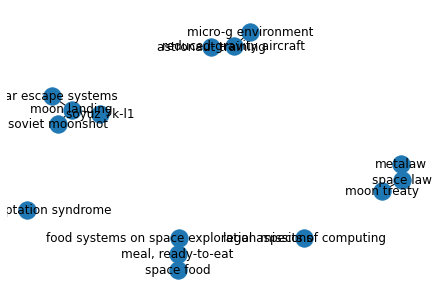

In [ ]:
nx.draw(G.subgraph(terms), with_labels = True)

In [ ]:
len(G) # number of nodes

2088

In [ ]:
# function to generate random walk sequences of nodes
def get_randomwalk(node, path_length):

    random_walk = [node]

    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node

    return random_walk

In [ ]:
get_randomwalk('space exploration', 10)

['space exploration',
 'commercial astronaut',
 'pilot certification in the united states',
 'alien flight student program']

In [ ]:
all_nodes = list(G.nodes())

random_walks = []

for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))

100%|██████████| 2088/2088 [00:00<00:00, 3673.90it/s]


In [ ]:
# count of sequences
len(random_walks)

10440

In [ ]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

In [ ]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(977813, 1007600)

In [ ]:
print(model)

Word2Vec(vocab=2088, vector_size=100, alpha=0.03)


In [ ]:
# find top n similar nodes
model.wv.most_similar('astronaut training')

[('micro-g environment', 0.9744261503219604),
 ('reduced-gravity aircraft', 0.9461185336112976),
 ('illness and injuries during spaceflight', 0.850312352180481),
 ('microgravity university', 0.84595787525177),
 ('space tourism society', 0.8455071449279785),
 ('spaceflight osteopenia', 0.8429339528083801),
 ('shift work sleep disorder', 0.8332218527793884),
 ('space adaptation syndrome', 0.8230597376823425),
 ('psychological and sociological effects of spaceflight', 0.8129661679267883),
 ('effects of sleep deprivation on cognitive performance', 0.8127599358558655)]

In [ ]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 'moon landing',
         'space food', 'food systems on space exploration missions', 'meal, ready-to-eat',
         'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
         'astronaut training', 'reduced-gravity aircraft', 'space adaptation syndrome', 'micro-g environment']

In [ ]:
def plot_nodes(word_list):
    X = [model.wv[x] for x in word_list]

    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)


    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

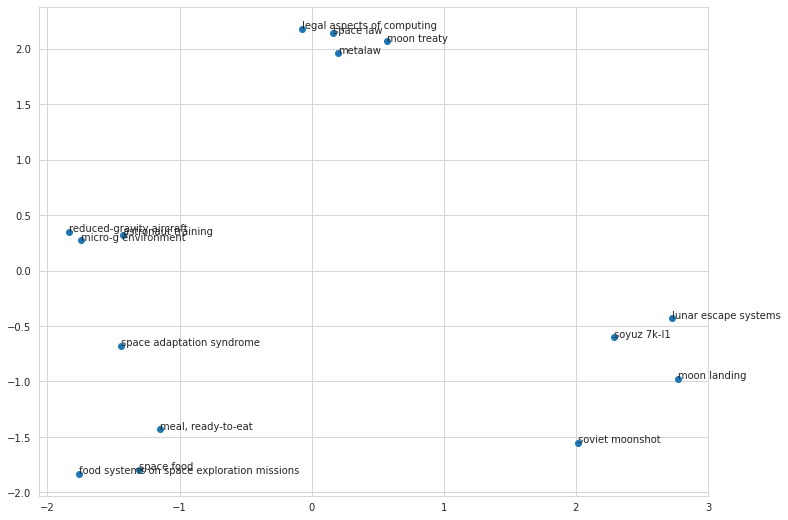

In [ ]:
plot_nodes(terms)

What you saw was a step by step way of implementing DeepWalk - we will soon see how we can implement it even easier using special packages.

### Community2vec

One notable application of shallow graph embedding is a method called "community embeddings." Waller and Anderson (https://www.nature.com/articles/s41586-021-04167-x#Sec9) adapt the word2vec model to map 10,006 popular Reddit communities in a high-dimensional vector space based on user interactions.

To generate the embeddings, they applied the word2vec algorithm to interaction data by treating communities as ‘words’ and users as ‘contexts’—every instance of a user commenting in a community becomes a word–context pair. The model is then trained using the skip-gram with negative sampling (SGNS) method.

Analogously to the "geometry of culture (Kozlowski et al., 2019)" paper, they found dimensions in community embeddings that correspond to social constructs. To do so, they first identified a seed pair of communities that differ in the target construct, but are similar in other respects. For example, they seeded their partisan dimension with r/democrats and r/Conservative, two partisan American political communities (see Supplementary Table 1 in their paper (https://www.nature.com/articles/s41586-021-04167-x#Sec9) for details). Through analyses, they found that Reddit underwent a significant polarization event around the 2016 US presidential election.

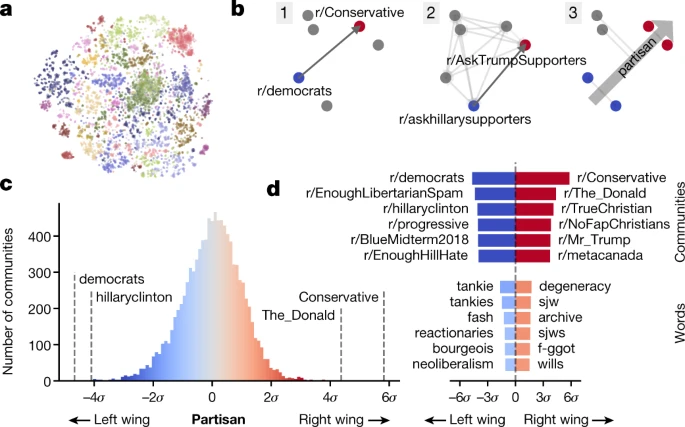



We recommend you to refer to their paper (https://www.nature.com/articles/s41586-021-04167-x#Sec9) and source code (https://github.com/CSSLab/social-dimensions). They have opened age, gender, partisan scores for 10,006 communities, which can be very useful if you're using Reddit datasets for your final projects.

## Deep Learning with Graphs

Early Graph Neural Networks used tree based approaches, only being able to deal with directed acyclic graphs. Soon after RNN based approaches made progress, being able to deal with cyclic scenarios. Today, the state of the art has become graph convolutional neural networks, which we explore in this section.

Graph Convolutional Neural Networks capture local structure by utilizing a convolution not shaped like a tile of pixels, but the neighborhood of each node in a graph. For these models, the goal is then to learn a function of features on a graph that takes as input a feature description for every node and a description of the graph structure in matrix form; typically in the form of an adjacency matrix between nodes. Such models have become widely used for edge prediction, network partitioning and the simulation of network processes (e.g., diffusion) (Duvenaud et al. 2015).

- [Introduction to Graph Convolutional Neural Networks](http://tkipf.github.io/graph-convolutional-networks/)
- [A Gentle Introduction to Deep Learning for Graphs](https://arxiv.org/pdf/1912.12693.pdf)
- [Blog Post on Deep Learning for Graphs](https://medium.com/syncedreview/introduction-to-deep-learning-for-graphs-and-where-it-may-be-heading-75d48f42a322#:~:text=The%20deep%20learning%20for%20graphs,of%20natural%20language%20processing%20applications.)
- [Deep Learning on Graphs: a survey](https://arxiv.org/abs/1812.04202)
- [Graph neural networks: A review of methods and applications](https://arxiv.org/pdf/1812.08434.pdf)
- [A Comprehensive Survey on Graph Neural Networks](https://arxiv.org/pdf/1901.00596.pdf)

We will be using PyTorch Geometric ([code](https://github.com/rusty1s/pytorch_geometric), [documentation](https://pytorch-geometric.readthedocs.io/en/latest/)) for all of our purposes, but it is also worth checking out:


- Deep Graph Library - https://github.com/dmlc/dgl
- StellarGraph - https://github.com/stellargraph/stellargraph


Note: if you are more comfortable with PyTorch, then PyTorch geometric should be your choice - otherwise, StellarGraph has many of the algorithms implemented but using a Keras/Tensorflow framework. StellarGraph also has many intensive examples and demos for you to use.


## Using PyTorch_geometric for Deep Learning on Graphs

The following 4 examples (graph embedding, node classification, graph classification, and point cloud classification) are all taken from the PyTorch geometric docs.


In [ ]:
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric

# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt


def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

     |████████████████████████████████| 48 kB 2.4 MB/s 
     |████████████████████████████████| 407 kB 4.3 MB/s 


## Introduction

Recently, deep learning on graphs has emerged to become one of the hottest research fields in the deep learning community.
Here, **Graph Neural Networks (GNNs)** aim to generalize classical deep learning concepts to irregular structured data (in contrast to images or texts) and to enable neural networks to reason about objects and their relations.

This is done by following a simple **neural message passing scheme**, where node features $\mathbf{x}_v^{(\ell)}$ of all nodes $v \in \mathcal{V}$ in a graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ are iteratively updated by aggregating localized information from their neighbors $\mathcal{N}(v)$:

$$
\mathbf{x}_v^{(\ell + 1)} = f^{(\ell + 1)}_{\theta} \left( \mathbf{x}_v^{(\ell)}, \left\{ \mathbf{x}_w^{(\ell)} : w \in \mathcal{N}(v) \right\} \right)
$$

This tutorial will introduce you to some fundamental concepts regarding deep learning on graphs via Graph Neural Networks based on the **[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric is an extension library to the popular deep learning framework [PyTorch](https://pytorch.org/), and consists of various methods and utilities to ease the implementation of Graph Neural Networks.

Following [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), let's dive into the world of GNNs by looking at a simple graph-structured example, the well-known [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club. Here, we are interested in detecting communities that arise from the member's interaction.

PyTorch Geometric provides an easy access to this dataset via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage:

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


After initializing the [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) dataset, we first inspect some of its properties.
For example, we can see that this dataset holds exactly **one graph**, and that each node in this dataset is assigned a **34-dimensional feature vector** (that uniquely describes members of the karate club).
Furthermore, the graph holds exactly **4 classes**, which represent the community to which each node belongs.

Let's now look at the underlying graph in more detail:

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Each graph in PyTorch Geometric is represented by a single [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) object, which holds all information required to describe its graph representation.
We can print the data object anytime via `print(data)` to receive a short summary about its attributes and their shapes:
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
We can see that this `data` object holds 4 attributes:
(1) The `edge_index` property holds the information about the **graph connectivity**, *i.e.*, a tuple of source and destination node indices for each edge.
PyG further refers to (2) **node features** as `x` (each of the 34 nodes is assigned a 34-dim feature vector), and to (3) **node labels** as `y` (each node is assigned to exactly one class).
(4) There also exists an additional attribute called `train_mask`, which describes for which nodes we already know their community assigments.
In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer the community assignment for the remaining nodes.

The `data` object also provides some **utility functions** to infer some basic properties of the underlying graph.
For example, we can easily infer whether there exists isolated nodes in the graph (*i.e.* there exists no edge to any node), whether the graph contains self-loops (*i.e.*, $(v, v) \in \mathcal{E}$), or whether the graph is undirected (*i.e.*, for each edge $(v, w) \in \mathcal{E}$ there also exists the edge $(w, v) \in \mathcal{E}$).

Let us now inspect the `edge_index` property in more detail:

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

By printing `edge_index`, we can further understand how PyG represents graph connectivity internally.
We see that for each edge, `edge_index` holds a tuple of two node indices, where the first value describes the node index of the source node and the second value describes the node index of the destination node of an edge.

This representation is known as the **COO format (coordinate format)** commonly used for representing sparse matrices.
Instead of holding the adjacency information in a dense representation $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG represents graphs sparsely, which refers to only holding the coordinates/values for which entries in $\mathbf{A}$ are non-zero.

We can further visualize the graph by converting it to the `networkx` library format, which implements, in addition to graph manipulation functionalities, powerful tools for visualization:

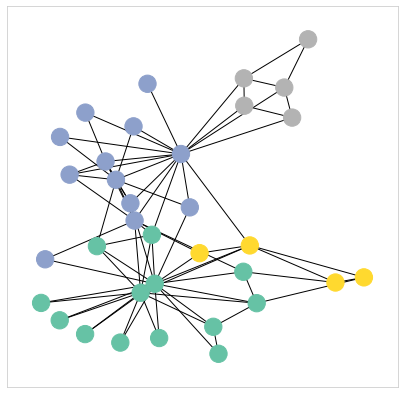

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Implementing Graph Neural Networks

Ater learning about PyG's data handling, it's time to implement our first Graph Neural Network!

For this, we will use on of the most simple GNN operators, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)), which is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.

PyG implements this layer via [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), which can be executed by passing in the node feature representation `x` and the COO graph connectivity representation `edge_index`.

With this, we are ready to create our first Graph Neural Network by defining our network architecture in a `torch.nn.Module` class:

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Here, we first initialize all of our building blocks in `__init__` and define the computation flow of our network in `forward`.
We first define and stack **three graph convolution layers**, which corresponds to aggregating 3-hop neighborhood information around each node (all nodes up to 3 "hops" away).
In addition, the `GCNConv` layers reduce the node feature dimensionality to $2$, *i.e.*, $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Each `GCNConv` layer is enhanced by a [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) non-linearity.

After that, we apply a single linear transformation ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) that acts as a classifier to map our nodes to 1 out of the 4 classes/communities.

We return both the output of the final classifier as well as the final node embeddings produced by our GNN.
We proceed to initialize our final model via `GCN()`, and printing our model produces a summary of all its used sub-modules.


### Embedding the Karate Club Network

Let's take a look at the node embeddings produced by our GNN.
Here, we pass in the initial node features `x` and the graph connectivity information `edge_index` to the model, and visualize its 2-dimensional embedding.

Embedding shape: [34, 2]


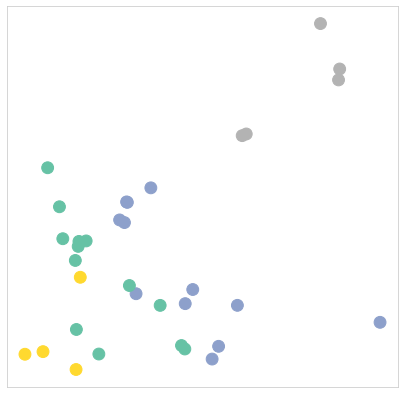

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

Remarkably, even before training the weights of our model, the model produces an embedding of nodes that closely resembles the community-structure of the graph.
Nodes of the same color (community) are already closely clustered together in the embedding space, although the weights of our model are initialized **completely at random** and we have not yet performed any training so far!
This leads to the conclusion that GNNs introduce a strong inductive bias, leading to similar embeddings for nodes that are close to each other in the input graph.

### Training on the Karate Club Network

But can we do better? Let's look at an example on how to train our network parameters based on the knowledge of the community assignments of 4 nodes in the graph (one for each community):

Because everything in our model is differentiable and parameterized, we can add some labels, train the model and observe how the embeddings react.
Here, we make use of a semi-supervised or transductive learning procedure: We simply train against one node per class, but are allowed to make use of the complete input graph data.

Training our model is very similar to any other PyTorch model.
In addition to defining our network architecture, we define a loss critertion (here, [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) and initialize a stochastic gradient optimizer (here, [`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).
After that, we perform multiple rounds of optimization, where each round consists of a forward and backward pass to compute the gradients of our model parameters w.r.t. to the loss derived from the forward pass.
If you are not new to PyTorch, this scheme should appear familar to you.
Otherwise, the PyTorch docs provide [a good introduction on how to train a neural network in PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

Note that our semi-supervised learning scenario is achieved by the following line:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
While we compute node embeddings for all of our nodes, we **only make use of the training nodes for computing the loss**.
Here, this is implemented by filtering the output of the classifier `out` and ground-truth labels `data.y` to only contain the nodes in `train_mask`.

Let us now start training and see how our node embeddings evolve over time (best experienced by explicitely running the code):

<IPython.core.display.Javascript object>

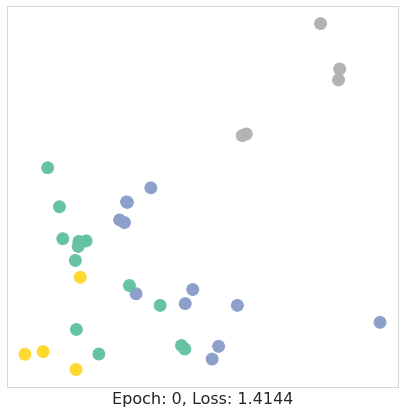

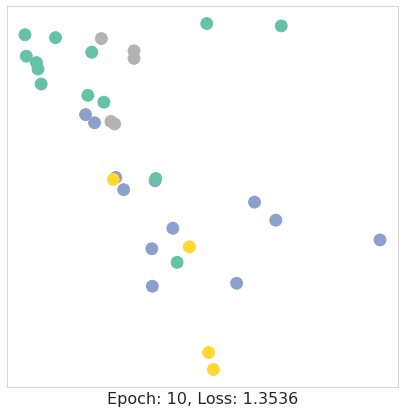

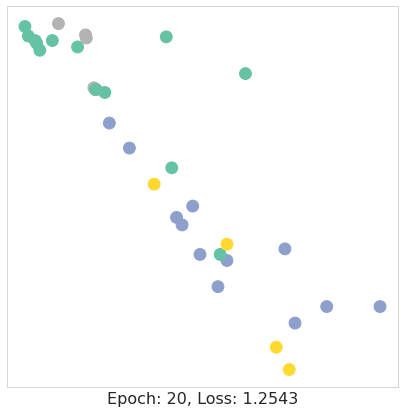

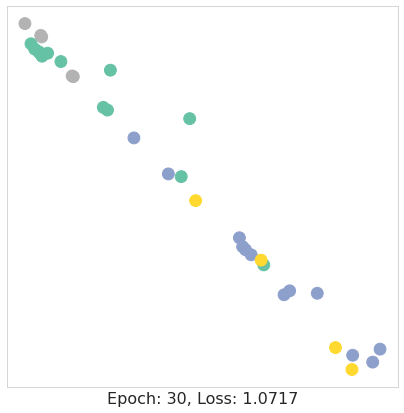

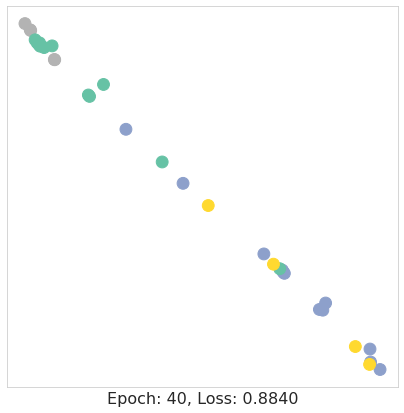

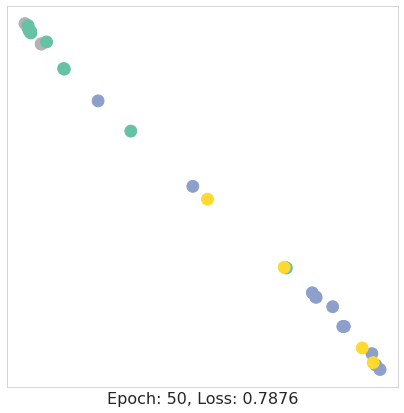

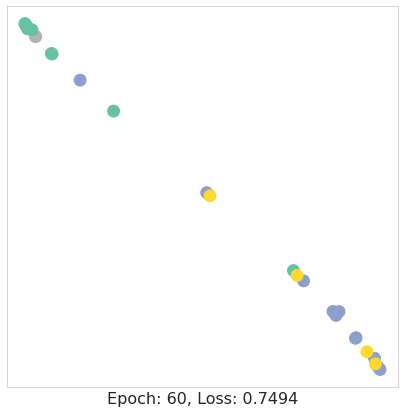

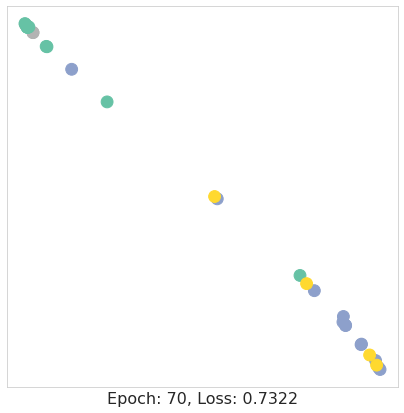

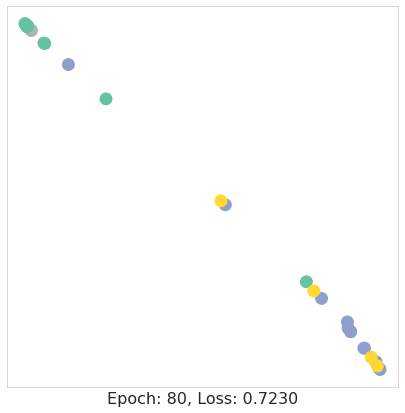

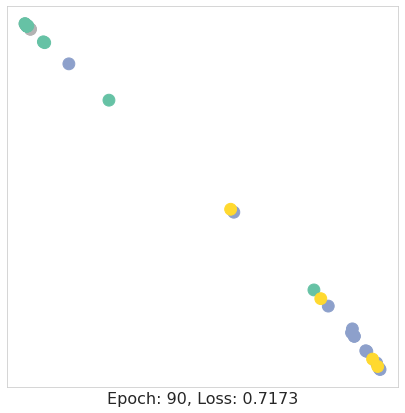

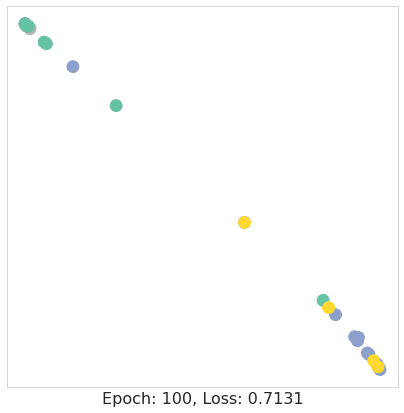

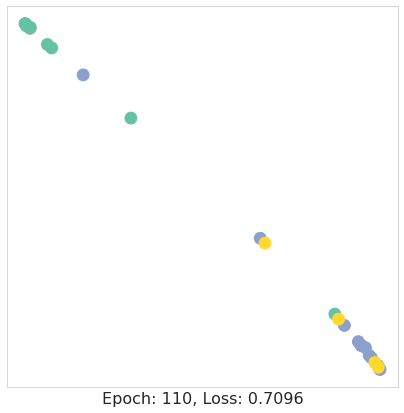

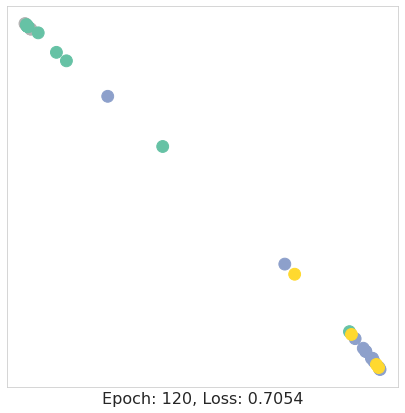

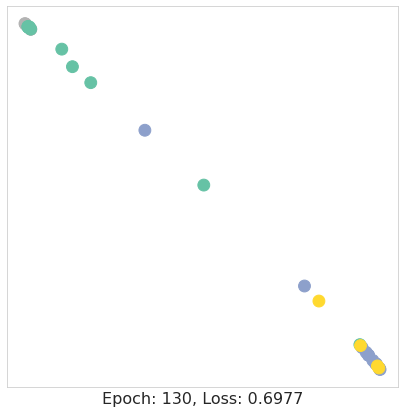

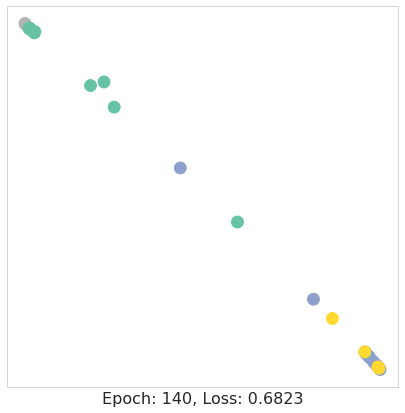

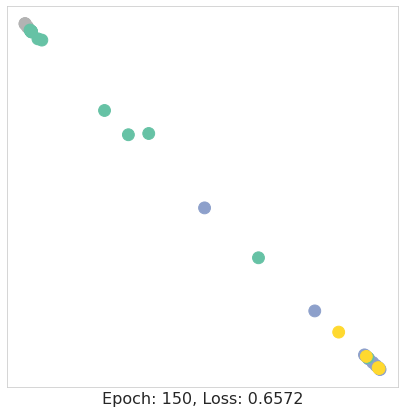

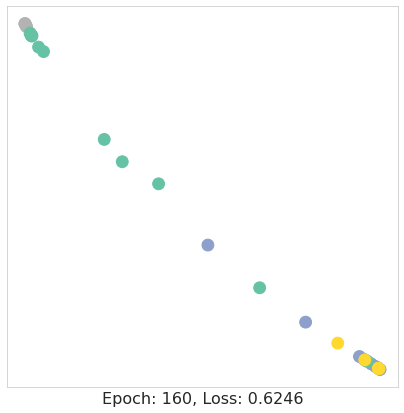

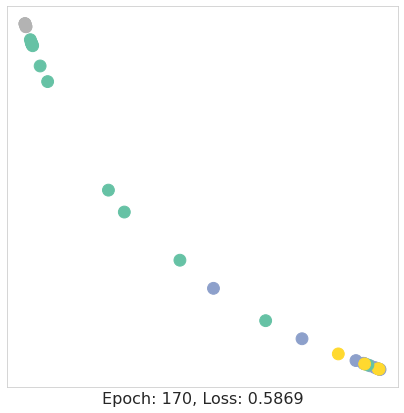

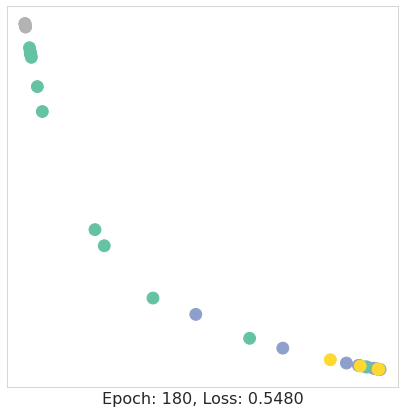

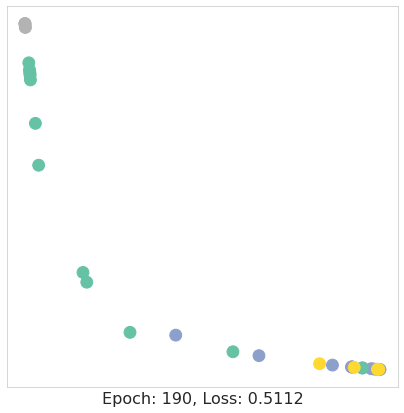

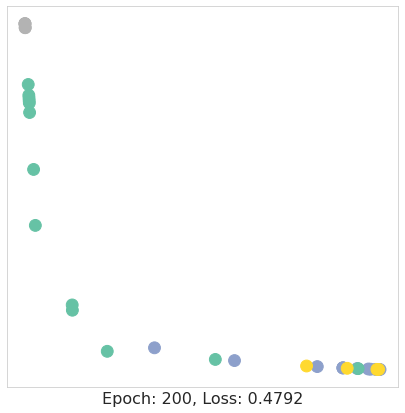

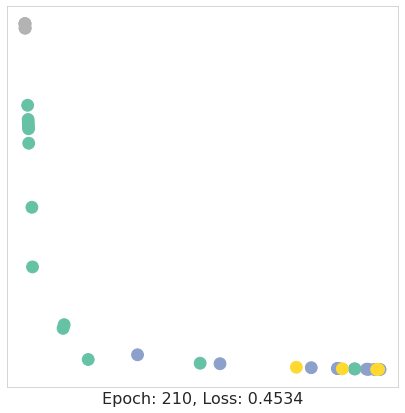

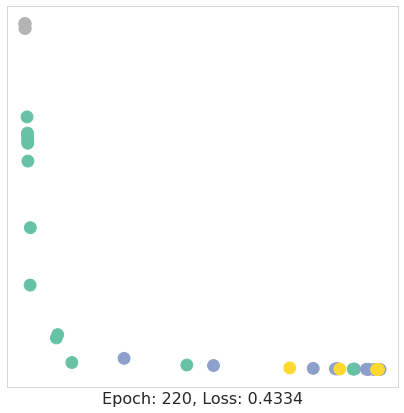

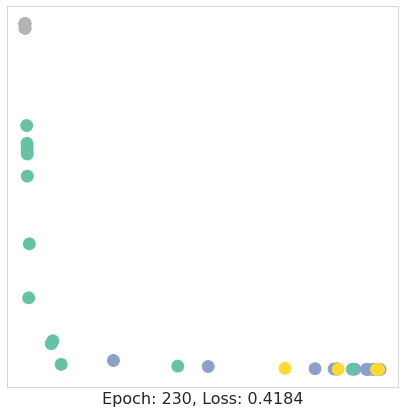

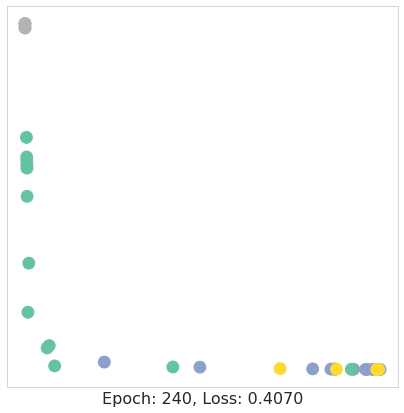

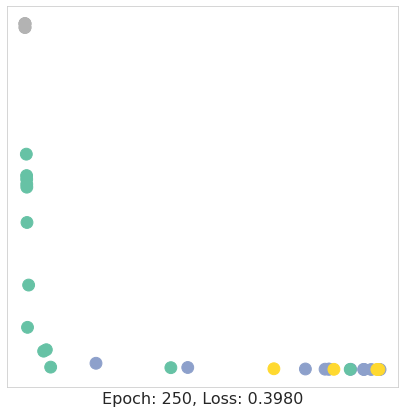

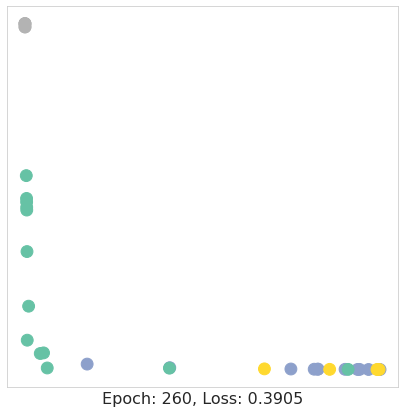

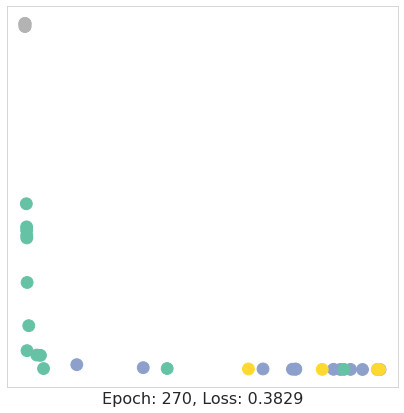

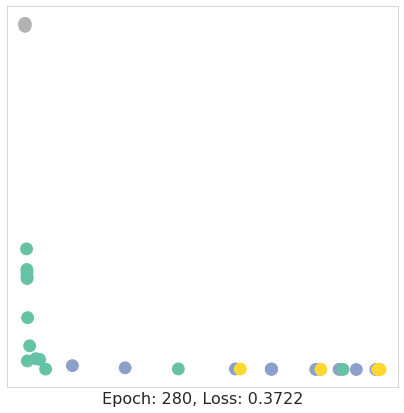

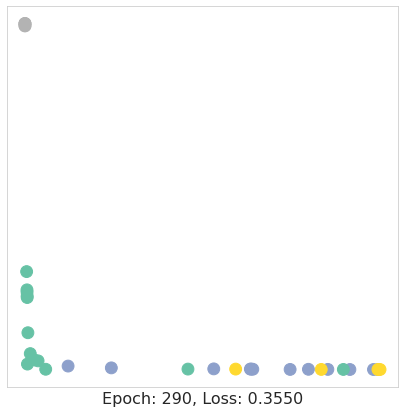

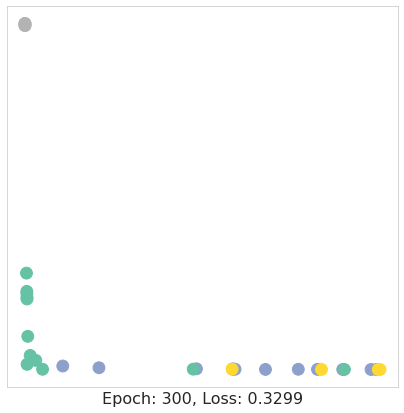

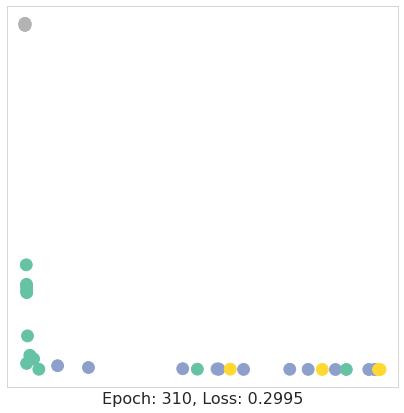

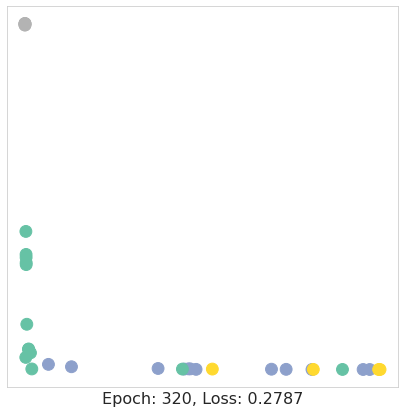

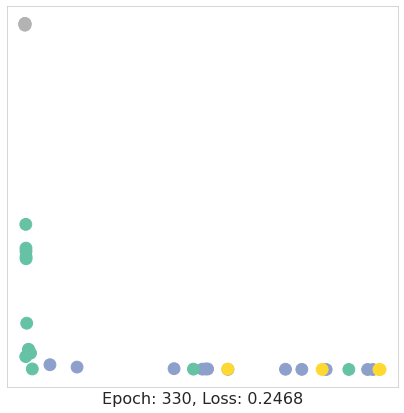

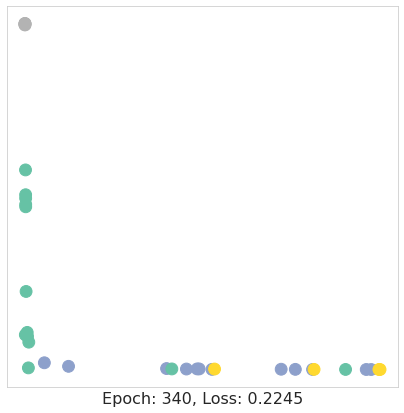

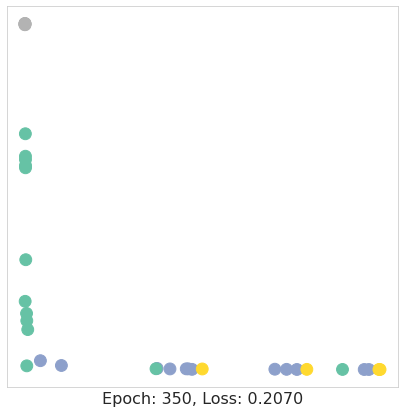

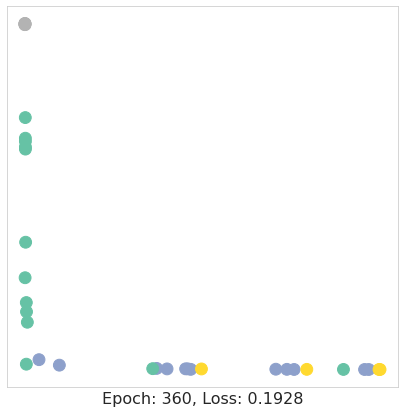

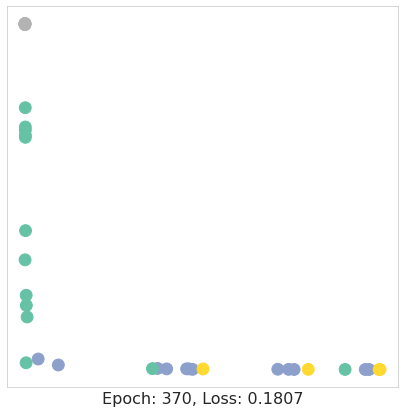

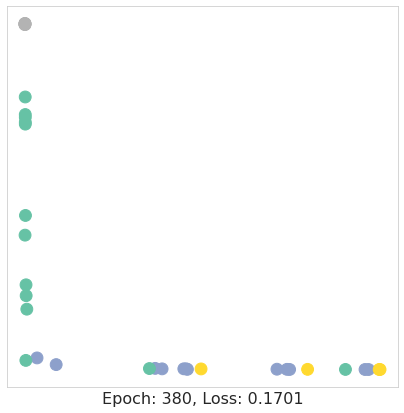

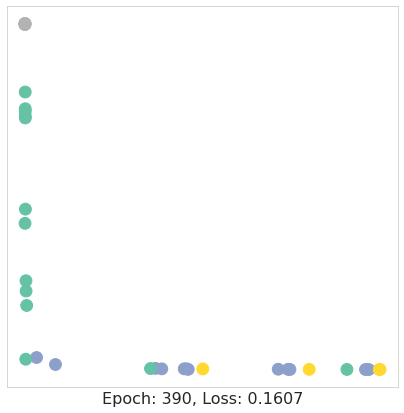

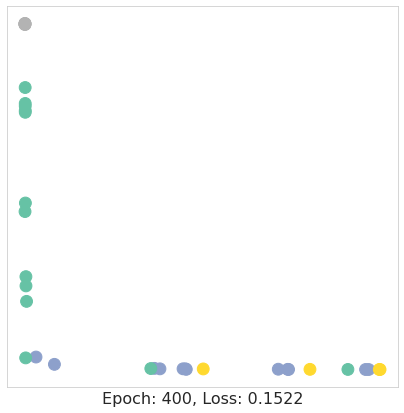

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

As one can see, our 3-layer GCN model manages to linearly separate the communities and classify most nodes correctly.

Furthermore, we did this all with a few lines of code, thanks to the PyTorch Geometric library which helped us out with data handling and GNN implementations.

## Conclusion

This concludes the first introduction into the world of GNNs and PyTorch Geometric.
In the follow-up sessions, you will learn how to achieve state-of-the-art classification results on a number of real-world graph datasets.

[Next: Node Classification with Graph Neural Networks](https://colab.research.google.com/drive/14OvFnAXggxB8vM4e8vSURUp1TaKnovzX)


## Node Classification with Graph Neural Networks

[Previous: Introduction: Hands-on Graph Neural Networks](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8)

Here we teach you how to apply **Graph Neural Networks (GNNs) to the task of node classification**.
We are given the ground-truth labels of only a small subset of nodes, and want to infer the labels for all the remaining nodes (*transductive learning*).

To demonstrate, we make use of the `Cora` dataset, which is a **citation network** where nodes represent documents.
Each node is described by a 1433-dimensional bag-of-words feature vector.
Two documents are connected if there exists a citation link between them.
The task is to infer the category of each document (7 in total).

This dataset was first introduced by [Yang et al. (2016)](https://arxiv.org/abs/1603.08861) as one of the datasets of the `Planetoid` benchmark suite.
We again can make use [PyTorch Geometric](https://github.com/rusty1s/pytorch_geometric) for an easy access to this dataset via [`torch_geometric.datasets.Planetoid`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.Planetoid):

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Processing...
Done!


Overall, this dataset is quite similar to the previously used [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) network.
We can see that the `Cora` network holds 2,708 nodes and 10,556 edges, resulting in an average node degree of 3.9.
For training this dataset, we are given the ground-truth categories of 140 nodes (20 for each class).
This results in a training node label rate of only 5%.

In contrast to `KarateClub`, this graph holds the additional attributes `val_mask` and `test_mask`, which denotes the nodes that should be used for validation and testing.
Furthermore, we make use of **[data transformations](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#data-transforms) via `transform=NormalizeFeatures()`**.
Transforms can be used to modify your input data before inputting them into a neural network, *e.g.*, for normalization or data augmentation.
Here, we [row-normalize](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.NormalizeFeatures) the bag-of-words input feature vectors.

We can further see that this network is undirected, and that there exists no isolated nodes (each document has at least one citation).

### Training a Multi-layer Perception Network (MLP)

In theory, we should be able to infer the category of a document solely based on its content, *i.e.* its bag-of-words feature representation, without taking any relational information into account.

Let's verify that by constructing a simple MLP that solely operates on input node features (using shared weights across all nodes):

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(MLP, self).__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


Our MLP is defined by two linear layers and enhanced by [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU) non-linearity and [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html?highlight=dropout#torch.nn.Dropout).
Here, we first reduce the 1433-dimensional feature vector to a low-dimensional embedding (`hidden_channels=16`), while the second linear layer acts as a classifier that should map each low-dimensional node embedding to one of the 7 classes.

Let's train our simple MLP by following a similar procedure as described in [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8).
We again make use of the **cross entropy loss** and **Adam optimizer**.
This time, we also define a **`test` function** to evaluate how well our final model performs on the test node set (which labels have not been observed during training).

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9615
Epoch: 002, Loss: 1.9557
Epoch: 003, Loss: 1.9505
Epoch: 004, Loss: 1.9423
Epoch: 005, Loss: 1.9327
Epoch: 006, Loss: 1.9279
Epoch: 007, Loss: 1.9144
Epoch: 008, Loss: 1.9087
Epoch: 009, Loss: 1.9023
Epoch: 010, Loss: 1.8893
Epoch: 011, Loss: 1.8776
Epoch: 012, Loss: 1.8594
Epoch: 013, Loss: 1.8457
Epoch: 014, Loss: 1.8365
Epoch: 015, Loss: 1.8280
Epoch: 016, Loss: 1.7965
Epoch: 017, Loss: 1.7984
Epoch: 018, Loss: 1.7832
Epoch: 019, Loss: 1.7495
Epoch: 020, Loss: 1.7441
Epoch: 021, Loss: 1.7188
Epoch: 022, Loss: 1.7124
Epoch: 023, Loss: 1.6785
Epoch: 024, Loss: 1.6660
Epoch: 025, Loss: 1.6119
Epoch: 026, Loss: 1.6236
Epoch: 027, Loss: 1.5827
Epoch: 028, Loss: 1.5784
Epoch: 029, Loss: 1.5524
Epoch: 030, Loss: 1.5020
Epoch: 031, Loss: 1.5065
Epoch: 032, Loss: 1.4742
Epoch: 033, Loss: 1.4581
Epoch: 034, Loss: 1.4246
Epoch: 035, Loss: 1.4131
Epoch: 036, Loss: 1.4112
Epoch: 037, Loss: 1.3923
Epoch: 038, Loss: 1.3055
Epoch: 039, Loss: 1.2982
Epoch: 040, Loss: 1.2543


After training the model, we can call the `test` function to see how well our model performs on unseen labels.
Here, we are interested in the accuracy of the model, *i.e.*, the ratio of correctly classified nodes:

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5900


As one can see, our MLP performs rather bad with only about 59% test accuracy.
But why does the MLP do not perform better?
The main reason for that is that this model suffers from heavy overfitting due to only a **small amount of training nodes**, and therefore generalizes poorly to unseen node representations.

It also fails to incorporate an important bias into the model: **Cited papers are very likely related to the category of a document**.
That is exactly where Graph Neural Networks come into play and can help to boost the performance of our model.



### Training a Graph Neural Network (GNN)

We can easily convert our MLP to a GNN by swapping the `torch.nn.Linear` layers with PyG's GNN operators.

Following-up on [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8), we replace the linear layers by the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) module.
To recap, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)) is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.
In contrast, a single linear layer is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \mathbf{x}_v^{(\ell)}
$$

which does not make use of neighboring node information.

In [ ]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


Let's visualize the node embeddings of our **untrained** GCN network.
For visualization, we make use of [**TSNE**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to embed our 7-dimensional node embeddings onto a 2D plane.

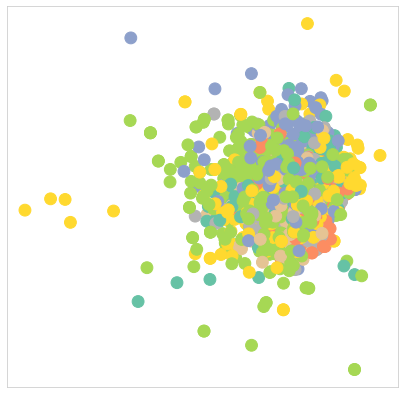

In [ ]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

As one can see, there is at least *some kind* of clustering (*e.g.*, for the "blue" nodes), but we certainly can do better by training our model.
The training and testing procedure is once again the same, but this time we make use of the node features `x` **and** the graph connectivity `edge_index` as input to our GCN model.

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9460
Epoch: 002, Loss: 1.9412
Epoch: 003, Loss: 1.9363
Epoch: 004, Loss: 1.9308
Epoch: 005, Loss: 1.9216
Epoch: 006, Loss: 1.9137
Epoch: 007, Loss: 1.9078
Epoch: 008, Loss: 1.8986
Epoch: 009, Loss: 1.8868
Epoch: 010, Loss: 1.8825
Epoch: 011, Loss: 1.8701
Epoch: 012, Loss: 1.8614
Epoch: 013, Loss: 1.8486
Epoch: 014, Loss: 1.8323
Epoch: 015, Loss: 1.8344
Epoch: 016, Loss: 1.8186
Epoch: 017, Loss: 1.8031
Epoch: 018, Loss: 1.7980
Epoch: 019, Loss: 1.7813
Epoch: 020, Loss: 1.7766
Epoch: 021, Loss: 1.7478
Epoch: 022, Loss: 1.7385
Epoch: 023, Loss: 1.7304
Epoch: 024, Loss: 1.7120
Epoch: 025, Loss: 1.7010
Epoch: 026, Loss: 1.6917
Epoch: 027, Loss: 1.6672
Epoch: 028, Loss: 1.6382
Epoch: 029, Loss: 1.6474
Epoch: 030, Loss: 1.6297
Epoch: 031, Loss: 1.6014
Epoch: 032, Loss: 1.5760
Epoch: 033, Loss: 1.5732
Epoch: 034, Loss: 1.5705
Epoch: 035, Loss: 1.5443
Epoch: 036, Loss: 1.5131
Epoch: 037, Loss: 1.4721
Epoch: 038, Loss: 1.4774
Epoch: 039, Loss: 1.4380
Epoch: 040, Loss: 1.4553


After training the model, we can check its test accuracy:

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8080


**There it is!**
By simply swapping the linear layers with GNN layers, we can reach **81.4% of test accuracy**!
This is in stark contrast to the 59% of test accuracy obtained by our MLP, indicating that relational information plays a crucial role in obtaining better performance.

We can also verify that once again by looking at the output embeddings of our **trained** model, which now produces a far better clustering of nodes of the same category.

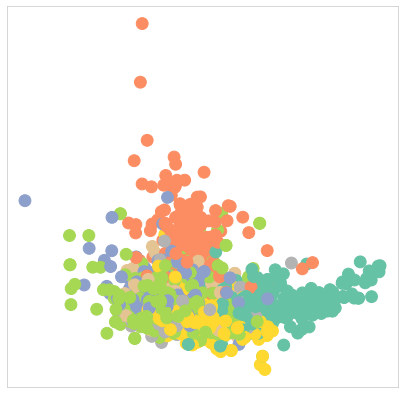

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

## Conclusion

Here you have seen how to apply GNNs to real-world problems, and, in particular, how they can effectively be used for boosting a model's performance.
In the next section, we will look into how GNNs can be used for the task of graph classification.

[Next: Graph Classification with Graph Neural Networks](https://colab.research.google.com/drive/1I8a0DfQ3fI7Njc62__mVXUlcAleUclnb)

## Graph Classification with Graph Neural Networks

In this tutorial session we take a closer look at how to apply **Graph Neural Networks (GNNs) to the task of graph classification**.
Graph classification refers to the problem of classifiying entire graphs (in contrast to nodes), given a **dataset of graphs**, based on some structural graph properties.
Here, we want to embed entire graphs, and we want to embed those graphs in such a way so that they are linearly separable given a task at hand.

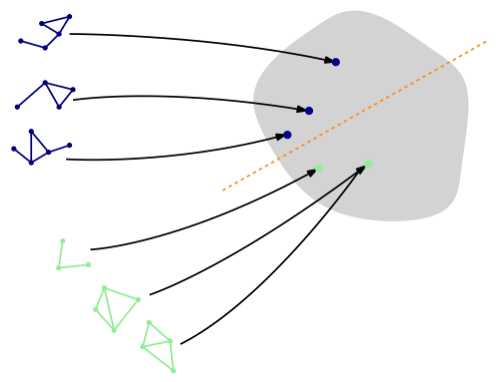

A common task for graph classification is **molecular property prediction**, in which molecules are represented as graphs, and the task may be to infer whether a molecule inhibits HIV virus replication or not. These can be trivially extended to social settings by classifying clique structures in online or in-person social networks.

The TU Dortmund University has collected a wide range of different graph classification datasets, known as the [**TUDatasets**](https://chrsmrrs.github.io/datasets/), which are also accessible via [`torch_geometric.datasets.TUDataset`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.TUDataset) in PyTorch Geometric.
Let's load and inspect one of the smaller ones, the **MUTAG dataset**:

In [ ]:
import torch
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='data/TUDataset', name='MUTAG')

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: MUTAG(188):
Number of graphs: 188
Number of features: 7
Number of classes: 2

Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])
Number of nodes: 17
Number of edges: 38
Average node degree: 2.24
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


This dataset provides **188 different graphs**, and the task is to classify each graph into **one out of two classes**.

By inspecting the first graph object of the dataset, we can see that it comes with **17 nodes (with 7-dimensional feature vectors)** and **38 edges** (leading to an average node degree of 2.24).
It also comes with exactly **one graph label** (`y=[1]`), and, in addition to previous datasets, provides addtional **4-dimensional edge features** (`edge_attr=[38, 4]`).
However, for the sake of simplicity, we will not make use of those.

PyTorch Geometric provides some useful utilities for working with graph datasets, *e.g.*, we can shuffle the dataset and use the first 150 graphs as training graphs, while using the remaining ones for testing:

In [ ]:
torch.manual_seed(12345)
dataset = dataset.shuffle()

train_dataset = dataset[:150]
test_dataset = dataset[150:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 150
Number of test graphs: 38


### Mini-batching of graphs

Because graphs in graph classification datasets are usually small, a good idea is to **batch the graphs** before inputting them into a Graph Neural Network to guarantee full GPU utilization.
In the image or language domain, this procedure is typically achieved by **rescaling** or **padding** each example into a set of equally-sized shapes, and examples are then grouped in an additional dimension.
The length of this dimension is then equal to the number of examples grouped in a mini-batch and is typically referred to as the `batch_size`.

However, for GNNs the two approaches described above are either not feasible or may result in a lot of unnecessary memory consumption.
Therefore, PyTorch Geometric opts for another approach to achieve parallelization across a number of examples. Here, adjacency matrices are stacked in a diagonal fashion (creating a giant graph that holds multiple isolated subgraphs), and node and target features are simply concatenated in the node dimension:

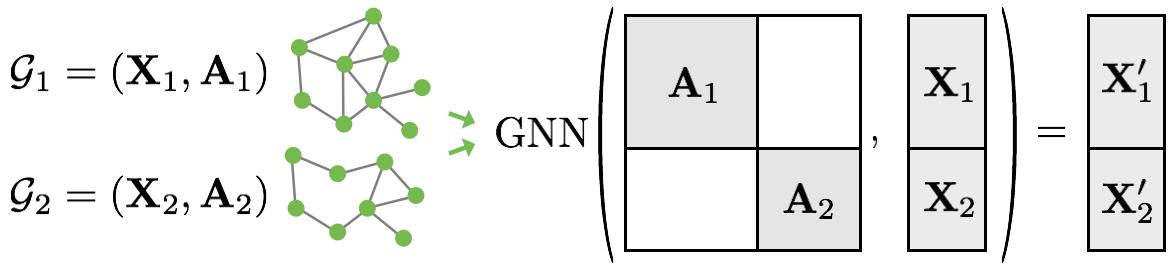

This procedure has some crucial advantages over other batching procedures:

1. GNN operators that rely on a message passing scheme do not need to be modified since messages are not exchanged between two nodes that belong to different graphs.

2. There is no computational or memory overhead since adjacency matrices are saved in a sparse fashion holding only non-zero entries, *i.e.*, the edges.

PyTorch Geometric automatically takes care of **batching multiple graphs into a single giant graph** with the help of the [`torch_geometric.data.DataLoader`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.DataLoader) class:

In [ ]:
from torch_geometric.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 2636], x=[1188, 7], edge_attr=[2636, 4], y=[64], batch=[1188], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 2506], x=[1139, 7], edge_attr=[2506, 4], y=[64], batch=[1139], ptr=[65])

Step 3:
Number of graphs in the current batch: 22
DataBatch(edge_index=[2, 852], x=[387, 7], edge_attr=[852, 4], y=[22], batch=[387], ptr=[23])



Here, we opt for a `batch_size` of 64, leading to 3 (randomly shuffled) mini-batches, containing all $2 \cdot 64+22 = 150$ graphs.

Furthermore, each `Batch` object is equipped with a **`batch` vector**, which maps each node to its respective graph in the batch:

$$
\textrm{batch} = [ 0, \ldots, 0, 1, \ldots, 1, 2, \ldots ]
$$

### Training a Graph Neural Network (GNN)

Training a GNN for graph classification usually follows a simple recipe:

1. Embed each node by performing multiple rounds of message passing
2. Aggregate node embeddings into a unified graph embedding (**readout layer**)
3. Train a final classifier on the graph embedding

There exists multiple **readout layers** in literature, but the most common one is to simply take the average of node embeddings:

$$
\mathbf{x}_{\mathcal{G}} = \frac{1}{|\mathcal{V}|} \sum_{v \in \mathcal{V}} \mathcal{x}^{(L)}_v
$$

PyTorch Geometric provides this functionality via [`torch_geometric.nn.global_mean_pool`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.glob.global_mean_pool), which takes in the node embeddings of all nodes in the mini-batch and the assignment vector `batch` to compute a graph embedding of size `[batch_size, hidden_channels]` for each graph in the batch.

The final architecture for applying GNNs to the task of graph classification then looks as follows and allows for complete end-to-end training:

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(7, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


Here, we again make use of the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) with $\mathrm{ReLU}(x) = \max(x, 0)$ activation for obtaining localized node embeddings, before we apply our final classifier on top of a graph readout layer.

Let's train our network for a few epochs to see how well it performs on the training as well as test set:

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 002, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 003, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 004, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 005, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 006, Train Acc: 0.6533, Test Acc: 0.7368
Epoch: 007, Train Acc: 0.7467, Test Acc: 0.7632
Epoch: 008, Train Acc: 0.7267, Test Acc: 0.7632
Epoch: 009, Train Acc: 0.7200, Test Acc: 0.7632
Epoch: 010, Train Acc: 0.7133, Test Acc: 0.7895
Epoch: 011, Train Acc: 0.7200, Test Acc: 0.7632
Epoch: 012, Train Acc: 0.7200, Test Acc: 0.7895
Epoch: 013, Train Acc: 0.7200, Test Acc: 0.7895
Epoch: 014, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 015, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 016, Train Acc: 0.7533, Test Acc: 0.7368
Epoch: 017, Train Acc: 0.7400, Test Acc: 0.7632
Epoch: 018, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 019, Train Acc: 0.7400, Test Acc: 0.7895
Epoch: 020, Train Acc: 0.7533, Test Acc: 0.7368
Epoch: 021, Train Acc: 0.7467, Test Acc:

As one can see, our model reaches around **76% test accuracy**.
Reasons for the fluctations in accuracy can be explained by the rather small dataset (only 38 test graphs), and usually disappear once one applies GNNs to larger datasets.



Can we do better than this?
As multiple papers pointed out ([Xu et al. (2018)](https://arxiv.org/abs/1810.00826), [Morris et al. (2018)](https://arxiv.org/abs/1810.02244)), applying **neighborhood normalization decreases the expressivity of GNNs in distinguishing certain graph structures**.
An alternative formulation ([Morris et al. (2018)](https://arxiv.org/abs/1810.02244)) omits neighborhood normalization completely and adds a simple skip-connection to the GNN layer in order to preserve central node information:

$$
\mathbf{x}_v^{(\ell+1)} = \mathbf{W}^{(\ell + 1)}_1 \mathbf{x}_v^{(\ell)} + \mathbf{W}^{(\ell + 1)}_2 \sum_{w \in \mathcal{N}(v)} \mathbf{x}_w^{(\ell)}
$$

This layer is implemented under the name [`GraphConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GraphConv) in PyTorch Geometric.

If you complete the following code to use PyG's `GraphConv` rather than `GCNConv`, you should approach **82% test accuracy**.

In [ ]:
from torch_geometric.nn import GraphConv

class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GNN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GraphConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GraphConv(hidden_channels, hidden_channels)
        self.conv3 = GraphConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        x = global_mean_pool(x, batch)

        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return x

model = GNN(hidden_channels=64)
print(model)

GNN(
  (conv1): GraphConv(7, 64)
  (conv2): GraphConv(64, 64)
  (conv3): GraphConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GNN(hidden_channels=64)
print(model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

<IPython.core.display.Javascript object>

GNN(
  (conv1): GraphConv(7, 64)
  (conv2): GraphConv(64, 64)
  (conv3): GraphConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)
Epoch: 001, Train Acc: 0.7333, Test Acc: 0.7895
Epoch: 002, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 003, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 004, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 005, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 006, Train Acc: 0.6533, Test Acc: 0.7368
Epoch: 007, Train Acc: 0.7333, Test Acc: 0.8158
Epoch: 008, Train Acc: 0.7267, Test Acc: 0.8158
Epoch: 009, Train Acc: 0.7867, Test Acc: 0.8421
Epoch: 010, Train Acc: 0.7733, Test Acc: 0.8158
Epoch: 011, Train Acc: 0.7733, Test Acc: 0.7895
Epoch: 012, Train Acc: 0.7933, Test Acc: 0.8421
Epoch: 013, Train Acc: 0.7733, Test Acc: 0.8421
Epoch: 014, Train Acc: 0.7733, Test Acc: 0.7895
Epoch: 015, Train Acc: 0.7933, Test Acc: 0.8421
Epoch: 016, Train Acc: 0.7667, Test Acc: 0.7632
Epoch: 017, Train Acc: 0.7933, Test Acc: 0.8421
Epoch: 018, Train Acc: 0.7867, T

### Conclusion

Here we have taught you to apply GNNs to the task of graph classification.
You have learned how graphs can be batched together for better GPU utilization, and how to apply readout layers for obtaining graph embeddings rather than node embeddings.

## Deep Unsupervised Networks for Graphs

In this section, we will be using StellarGraph to explore deep, unsupervised methods for graphs. While most of the methods we have seen so far are effective on fixed graphs as they are transductive in nature.

Recent work, such as the [GraphSAGE algorithm](http://snap.stanford.edu/graphsage/) has shown that is possible to create inductive algorithms that allow us to create embeddings on unseen graphs, after training on a set of graphs with similar attributes as those graphs we wish to embed.

We introduce two mini-tutorials ([Node representation learning with GraphSAGE](https://stellargraph.readthedocs.io/en/stable/demos/embeddings/graphsage-unsupervised-sampler-embeddings.html), [Node representation learning with Deep Graph Infomax](https://stellargraph.readthedocs.io/en/stable/demos/embeddings/deep-graph-infomax-embeddings.html)) from StellarGraph to explore unsupervised networks for graphs.

The first notebook shows us how to use GraphSAGE to create embeddings for downstream tasks, and the second compares a series of unsupervised graph based deep learning approaches.

### Node representation learning with GraphSAGE and UnsupervisedSampler


Stellargraph Unsupervised GraphSAGE is the implementation of GraphSAGE method outlined in the paper: [Inductive Representation Learning on Large Graphs.](http://snap.stanford.edu/graphsage/) W.L. Hamilton, R. Ying, and J. Leskovec arXiv:1706.02216
[cs.SI], 2017.

This section is a short demo of how Stellargraph Unsupervised GraphSAGE can be used to learn embeddings of the nodes representing papers in the [CORA citation network](https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz). Furthermore, this section demonstrates the use of the learnt embeddings in a downstream node classification task (classifying papers by subject). Note that the node embeddings can also be used in other graph machine learning tasks, such as link prediction, community detection, or other social network analysis tasks.

#### Unsupervised GraphSAGE:

A high-level explanation of the objective underlying unsupervised GraphSAGE graph representation learning follows: *Given a graph, learn embeddings of the nodes using only the graph structure and the node features, without using any known node class labels* (hence "unsupervised"; for semi-supervised learning of node embeddings, see this [demo](../node-classification/graphsage-node-classification.ipynb))

**Unsupervised GraphSAGE model:** In the Unsupervised (or self-supervised) GraphSAGE model, node embeddings are learned by solving a simple classification task: given a large set of "positive" `(target, context)` node pairs generated from random walks performed on the graph (i.e., node pairs that co-occur within a certain context window in random walks), and an equally large set of "negative" node pairs randomly selected from the graph according to a certain distribution, learn a binary classifier that predicts whether arbitrary node pairs are likely to co-occur in a random walk performed on the graph. Through learning this simple binary node-pair-classification task, the model automatically learns an inductive mapping from attributes of nodes and their neighbors to node embeddings in a high-dimensional vector space, which preserves structural and feature similarities of the nodes. Unlike embeddings obtained by algorithms such as [Node2Vec](https://snap.stanford.edu/node2vec), this mapping is inductive: given a new node (with attributes) and its links to other nodes in the graph (which was unseen during model training), we can evaluate its embeddings without having to re-train the model.

In our implementation of Unsupervised GraphSAGE, the training set of node pairs is composed of an equal number of positive and negative `(target, context)` pairs from the graph. The positive `(target, context)` pairs are the node pairs co-occurring on random walks over the graph whereas the negative node pairs are sampled randomly from a global node degree distribution of the graph.

The architecture of the node pair classifier is as follows. Input node pairs (with node features) are fed, together with graph structure, into a pair of identical GraphSAGE encoders, producing a pair of node embeddings. These embeddings are then fed into a node pair classification layer, which applies a binary operator to those node embeddings (e.g., concatenating them), and passes the resulting node pair embeddings through a linear transform followed by a binary activation (e.g., sigmoid), thus predicting a binary label for the node pair.

The entire model is trained end-to-end by minimizing the loss function of choice (e.g., binary cross-entropy between predicted node pair labels and true link labels) using stochastic gradient descent (SGD) updates of the model parameters, with minibatches of 'training' links generated on demand and fed into the model.

Node embeddings obtained from the encoder part of the trained classifier can be used in various downstream tasks. In this demo, we show how these can be used to predict node labels.

In [ ]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

In [ ]:
# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import os
import random

import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

from stellargraph import datasets
from IPython.display import display, HTML

#### Loading the CORA network data

(See [the "Loading from Pandas" demo](../basics/loading-pandas.ipynb) for details on how data can be loaded.)

In [ ]:
dataset = datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load()

In [ ]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 5429

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5429]
        Weights: all 1 (default)
        Features: none


#### Unsupervised GraphSAGE  with on demand sampling
The Unsupervised GraphSAGE requires a training sample that can be either provided as a list of `(target, context)` node pairs or it can be provided with an `UnsupervisedSampler` instance that takes care of generating positive and negative samples of node pairs on demand. In this demo we discuss the latter technique.

##### UnsupervisedSampler:
The `UnsupervisedSampler` class takes in a `Stellargraph` graph instance. The `generator` method in the `UnsupervisedSampler`  is responsible for generating an equal number of positive and negative node pair samples from the graph for training. The samples are generated by performing uniform random walks over the graph, using `UniformRandomWalk` object. Positive `(target, context)` node pairs are extracted from the walks, and for each
positive pair a corresponding negative pair `(target, node)` is generated by randomly sampling `node` from the degree distribution of the graph. Once the `batch_size` number of samples is accumulated, the generator yields a list of positive and negative node pairs along with their respective 1/0 labels.  

In the current implementation, we use uniform random walks to explore the graph structure. The length and number of walks, as well as the root nodes for starting the walks can be user-specified. The default list for root nodes is all nodes of the graph, default `number_of_walks` is 1 (at least one walk per root node), and the default `length` of walks is 2 (at least one node beyond the root node on the walk as a potential positive context).

**1. Specify the other optional parameter values: root nodes, number of walks to take per node, length of each walk, and a random seed.**

In [ ]:
nodes = list(G.nodes())
number_of_walks = 1
length = 5

**2. Create the UnsupervisedSampler instance with the relevant parameters passed to it.**

In [ ]:
unsupervised_samples = UnsupervisedSampler(
    G, nodes=nodes, length=length, number_of_walks=number_of_walks
)

The graph G together with the unsupervised sampler will be used to generate samples.

**3. Create a node pair generator:**

Next, create the node pair generator for sampling and streaming the training data to the model. The node pair generator essentially "maps" pairs of nodes `(target, context)` to the input of GraphSAGE: it either takes minibatches of node pairs, or an `UnsupervisedSampler` instance that generates the minibatches of node pairs on demand. The generator samples 2-hop subgraphs with `(target, context)` head nodes extracted from those pairs, and feeds them, together with the corresponding binary labels indicating which pair represents positive or negative samples, to the input layer of the node pair classifier with GraphSAGE node encoder, for SGD updates of model parameters.

Specify:
1. Minibatch size (number of node pairs per minibatch).
2. Number of epochs for training the model.
3. Xizes of 1- and 2-hop neighbor samples for GraphSAGE:

Note that the length of `num_samples` list defines the number of layers/iterations in the GraphSAGE encoder. In this example, we define a 2-layer GraphSAGE encoder.

In [ ]:
batch_size = 50
epochs = 4
num_samples = [10, 5]

In the following we show the working of node pair generator with the UnsupervisedSampler, which generates samples on demand.

In [ ]:
generator = GraphSAGELinkGenerator(G, batch_size, num_samples)
train_gen = generator.flow(unsupervised_samples)

Build the model: a 2-layer GraphSAGE encoder acting as node representation learner, with a link classification layer on concatenated (`citing-paper`, `cited-paper`) node embeddings.

The GraphSAGE part of the model, with hidden layer sizes of 50 for both GraphSAGE layers, a bias term, and no dropout. (Dropout can be switched on by specifying a positive dropout rate, 0 < dropout < 1).
Note that the length of the `layer_sizes` list must be equal to the length of `num_samples`, as `len(num_samples)` defines the number of hops (layers) in the GraphSAGE encoder.

In [ ]:
layer_sizes = [50, 50]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=generator, bias=True, dropout=0.0, normalize="l2"
)

In [ ]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

The final node pair classification layer that takes a pair of nodes' embeddings produced by `graphsage` encoder, applies a binary operator to them to produce the corresponding node pair embedding (`ip` for inner product; other options for the binary operator can be seen by running a cell with `?link_classification` in it), and passes it through a dense layer:

In [ ]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


Stack the GraphSAGE encoder and prediction layer into a Keras model, and specify the loss:

In [ ]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

**4. Train the model.**

In [ ]:
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True,
)

Epoch 1/4
434/434 [==============================] - 51s 113ms/step - loss: 0.5669 - binary_accuracy: 0.7377
Epoch 2/4
434/434 [==============================] - 52s 118ms/step - loss: 0.5419 - binary_accuracy: 0.7634
Epoch 3/4
434/434 [==============================] - 39s 88ms/step - loss: 0.5374 - binary_accuracy: 0.7736
Epoch 4/4
434/434 [==============================] - 39s 89ms/step - loss: 0.5360 - binary_accuracy: 0.7781


Note that multiprocessing is switched off, since with a large training set of node pairs, multiprocessing can considerably slow down the training process with the data being transferred between various processes.

Also, multiple workers can be used with `Keras version 2.2.4` and above, and it speeds up the training process considerably due to multi-threading.

#### Extracting node embeddings
Now that once the node pair classifier is trained, we can use its node encoder part as node embeddings evaluator. Below we evaluate node embeddings as activations of the output of GraphSAGE layer stack, and visualise them, coloring nodes by their subject label.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from stellargraph.mapper import GraphSAGENodeGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Building a new node-based model**

The `(src, dst)` node pair classifier `model` has two identical node encoders: one for source nodes in the node pairs, the other for destination nodes in the node pairs passed to the model. We can use either of the two identical encoders to evaluate node embeddings. Below we create an embedding model by defining a new Keras model with `x_inp_src` (a list of odd elements in `x_inp`) and `x_out_src` (the 1st element in `x_out`) as input and output, respectively. Note that this model's weights are the same as those of the corresponding node encoder in the previously trained node pair classifier.

In [ ]:
x_inp_src = x_inp[0::2]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)

We also need a node generator to feed graph nodes to the `embedding_model`. We want to evaluate node embeddings for all nodes in the graph:

In [ ]:
node_ids = node_subjects.index
node_gen = GraphSAGENodeGenerator(G, batch_size, num_samples).flow(node_ids)

We now use `node_gen` to feed all nodes into the embedding model and extract their embeddings:

In [ ]:
node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)

55/55 [==============================] - 3s 44ms/step


#### Visualize the node embeddings
Next we visualize the node embeddings in 2D using t-SNE. Colors of the nodes depict their true classes (subject in the case of Cora dataset) of the nodes.

In [ ]:
node_subject = node_subjects.astype("category").cat.codes

X = node_embeddings
if X.shape[1] > 2:
    transform = TSNE  # PCA

    trans = transform(n_components=2)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
    emb_transformed["label"] = node_subject
else:
    emb_transformed = pd.DataFrame(X, index=node_ids)
    emb_transformed = emb_transformed.rename(columns={"0": 0, "1": 1})
    emb_transformed["label"] = node_subject

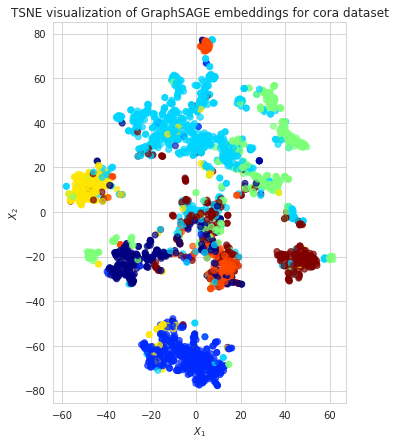

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["label"].astype("category"),
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for cora dataset".format(transform.__name__)
)
plt.show()

The observation that same-colored nodes in the embedding space are concentrated together is indicative  of similarity of embeddings of papers on the same topics. We would emphasize here again that the node embeddings are learnt in unsupervised way, without using true class labels.

#### Downstream task

The node embeddings calculated using the unsupervised GraphSAGE can be used as node feature vectors in a downstream task such as node classification.

In this example, we will use the  node embeddings to train a simple Logistic Regression classifier to predict paper subjects in Cora dataset.

In [ ]:
# X will hold the 50 input features (node embeddings)
X = node_embeddings
# y holds the corresponding target values
y = np.array(node_subject)

#### Data Splitting

We split the data into train and test sets.

We use 5% of the data for training and the remaining 95% for testing as a hold out test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.05, test_size=None, stratify=y
)

#### Classifier Training

We train a Logistic Regression classifier on the training data.

In [ ]:
clf = LogisticRegression(verbose=0, solver="lbfgs", multi_class="auto")
clf.fit(X_train, y_train)

LogisticRegression()

Predict the hold out test set:

In [ ]:
y_pred = clf.predict(X_test)

Calculate the accuracy of the classifier on the test set:

In [ ]:
accuracy_score(y_test, y_pred)

0.7594247959580257

The obtained accuracy is decent, better than that obtained by using node embeddings obtained by `node2vec`, which ignores node attributes, only taking into account graph structure (see this [demo](node2vec-embeddings.ipynb)).

**Predicted classes**

In [ ]:
pd.Series(y_pred).value_counts()

2    778
6    436
1    428
3    345
0    280
4    211
5     95
dtype: int64

**True classes**

In [ ]:
pd.Series(y).value_counts()

2    818
3    426
1    418
6    351
0    298
4    217
5    180
dtype: int64

#### Uses for unsupervised graph representation learning
1. Unsupervised GraphSAGE learns embeddings of unlabeled graph nodes. This is highly useful as most real-world data is typically either unlabeled, or has noisy, unreliable, or sparse labels. In such scenarios unsupervised techniques that learn meaningful low-dimensional representation of nodes in a graph by leveraging the graph structure and node features is useful.
2. Moreover, GraphSAGE is an inductive technique that allows us to obtain embeddings of unseen nodes, without the need to re-train the embedding model. That is, instead of training individual embeddings for each node (as in algorithms such as `node2vec` that learn a look-up table of node embeddings), GraphSAGE learns a function that generates embeddings by sampling and aggregating attributes from each node's local neighborhood, and combines those with the node's own attributes.

### Node representation learning with Deep Graph Infomax


This demo demonstrates how to perform unsupervised training of several models using [the Deep Graph Infomax algorithm](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.DeepGraphInfomax) (https://arxiv.org/pdf/1809.10341.pdf) on the CORA dataset:

- [GCN](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.GCN) (both as a full-batch method, and with [the Cluster-GCN training procedure](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.mapper.ClusterNodeGenerator))
- [GAT](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.GAT) (only as a full-batch method, but the Cluster-GCN training procedure is also supported)
- [APPNP](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.APPNP) (as with GAT, only as a full-batch method, but the Cluster-GCN training procedure is also supported)
- [RGCN](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.RGCN)
- [GraphSAGE](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.GraphSAGE)
- [HinSAGE](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.HinSAGE)

As with all StellarGraph workflows: first we load the dataset, next we create our data generators, and then we train our model. We then take the embeddings created through unsupervised training and predict the node classes using logistic regression.

> See [the GCN + Deep Graph Infomax fine-tuning demo](../node-classification/gcn-deep-graph-infomax-fine-tuning-node-classification.ipynb) for semi-supervised training using Deep Graph Infomax, by fine-tuning the base model for node classification using labelled data.

In [ ]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

In [ ]:
# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

In [ ]:
from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
)
from stellargraph import StellarGraph
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE

from stellargraph import datasets
from stellargraph.utils import plot_history

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from IPython.display import display, HTML

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Model

(See [the "Loading from Pandas" demo](../basics/loading-pandas.ipynb) for details on how data can be loaded.)

In [ ]:
dataset = datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load()

#### Data Generators

Now we create the data generators using `CorruptedGenerator` ([docs](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.mapper.CorruptedGenerator)). `CorruptedGenerator` returns shuffled node features along with the regular node features and we train our model to discriminate between the two.

Note that:

- We typically pass all nodes to `corrupted_generator.flow` because this is an unsupervised task
- We don't pass `targets` to `corrupted_generator.flow` because these are binary labels (true nodes, false nodes) that are created by `CorruptedGenerator`

In [ ]:
fullbatch_generator = FullBatchNodeGenerator(G, sparse=False)
gcn_model = GCN(layer_sizes=[128], activations=["relu"], generator=fullbatch_generator)

corrupted_generator = CorruptedGenerator(fullbatch_generator)
gen = corrupted_generator.flow(G.nodes())

Using GCN (local pooling) filters...


#### GCN Model Creation and Training

We create and train our `DeepGraphInfomax` model ([docs](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.DeepGraphInfomax)). Note that the loss used here must always be `tf.nn.sigmoid_cross_entropy_with_logits`.

In [ ]:
infomax = DeepGraphInfomax(gcn_model, corrupted_generator)
x_in, x_out = infomax.in_out_tensors()

model = Model(inputs=x_in, outputs=x_out)
model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))

In [ ]:
epochs = 100

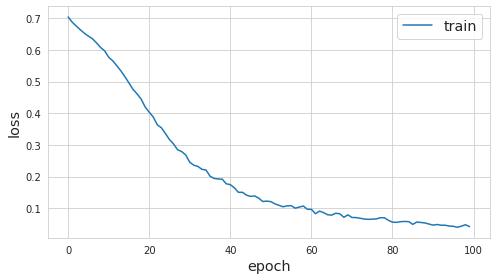

In [ ]:
es = EarlyStopping(monitor="loss", min_delta=0, patience=20)
history = model.fit(gen, epochs=epochs, verbose=0, callbacks=[es])
plot_history(history)

#### Extracting Embeddings and Logistic Regression

Since we've already trained the weights of our base model - GCN in this example - we can simply use `base_model.in_out_tensors` to obtain the trained node embedding model. Then we use logistic regression on the node embeddings to predict which class the node belongs to.

Note that the results here differ from the associated paper due to different train/test/val splits.

In [ ]:
x_emb_in, x_emb_out = gcn_model.in_out_tensors()

# for full batch models, squeeze out the batch dim (which is 1)
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)

In [ ]:
train_subjects, test_subjects = model_selection.train_test_split(
    node_subjects, train_size=0.1, test_size=None, stratify=node_subjects
)

test_gen = fullbatch_generator.flow(test_subjects.index)
train_gen = fullbatch_generator.flow(train_subjects.index)

test_embeddings = emb_model.predict(test_gen)
train_embeddings = emb_model.predict(train_gen)

lr = LogisticRegression(multi_class="auto", solver="lbfgs")
lr.fit(train_embeddings, train_subjects)

y_pred = lr.predict(test_embeddings)
gcn_acc = (y_pred == test_subjects).mean()
print(f"Test classification accuracy: {gcn_acc}")

Test classification accuracy: 0.765791632485644


This accuracy is close to that for [training a supervised GCN model end-to-end](../node-classification/gcn-node-classification.ipynb), suggesting that Deep Graph Infomax is an effective method for unsupervised training.

#### Visualisation with TSNE

Here we visualize the node embeddings with TSNE. As you can see below, the Deep Graph Infomax model produces well separated embeddings using unsupervised training.

In [ ]:
all_embeddings = emb_model.predict(fullbatch_generator.flow(G.nodes()))

y = node_subjects.astype("category")
trans = TSNE(n_components=2)
emb_transformed = pd.DataFrame(trans.fit_transform(all_embeddings), index=G.nodes())
emb_transformed["label"] = y

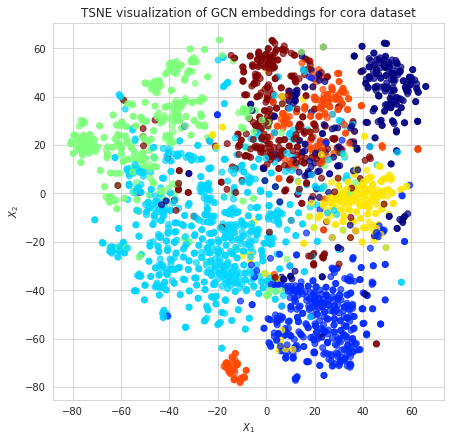

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["label"].cat.codes,
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title("TSNE visualization of GCN embeddings for cora dataset")
plt.show()

#### Comparing Different Models

Now we run Deep Graph Infomax training for other models. Note that switching between StellarGraph models only requires a few code changes.

In [ ]:
def run_deep_graph_infomax(
    base_model, generator, epochs, reorder=lambda sequence, subjects: subjects
):
    corrupted_generator = CorruptedGenerator(generator)
    gen = corrupted_generator.flow(G.nodes())
    infomax = DeepGraphInfomax(base_model, corrupted_generator)

    x_in, x_out = infomax.in_out_tensors()

    model = Model(inputs=x_in, outputs=x_out)
    model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))
    history = model.fit(gen, epochs=epochs, verbose=0, callbacks=[es])

    x_emb_in, x_emb_out = base_model.in_out_tensors()
    # for full batch models, squeeze out the batch dim (which is 1)
    if generator.num_batch_dims() == 2:
        x_emb_out = tf.squeeze(x_emb_out, axis=0)

    emb_model = Model(inputs=x_emb_in, outputs=x_emb_out)

    test_gen = generator.flow(test_subjects.index)
    train_gen = generator.flow(train_subjects.index)

    test_embeddings = emb_model.predict(test_gen)
    train_embeddings = emb_model.predict(train_gen)

    # some generators yield predictions in a different order to the .flow argument,
    # so we need to get everything lined up correctly
    ordered_test_subjects = reorder(test_gen, test_subjects)
    ordered_train_subjects = reorder(train_gen, train_subjects)

    lr = LogisticRegression(multi_class="auto", solver="lbfgs")
    lr.fit(train_embeddings, ordered_train_subjects)

    y_pred = lr.predict(test_embeddings)
    acc = (y_pred == ordered_test_subjects).mean()

    return acc

#### Cluster-GCN

[Cluster-GCN](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.mapper.ClusterNodeGenerator) is a scalable training procedure for that works for several "full batch" models in StellarGraph, including GCN (Graph Convolutional Networks), GAT (Graph Attention Networks) and APPNP (Approximate Personalized Propagation of Neural Predictions). This example just trains on GCN, but you can explore the others on your own. The training mechanism breaks the graph into a number of small subgraph "clusters" and trains a single GCN model on these, successively. It is equivalent to full-batch GCN with a single cluster (`clusters=1`), but with `clusters > 1` random clusters (as used here), its performance will be less than GCN. With better clusters, Cluster-GCN performance should be much improved.

(Note: `ClusterNodeGenerator` can be [used with Neo4j](https://stellargraph.readthedocs.io/en/stable/demos/connector/neo4j/cluster-gcn-on-cora-neo4j-example.html) for scalable training on large graphs, including unsupervised via Deep Graph Infomax.)

In [ ]:
cluster_generator = ClusterNodeGenerator(G, clusters=12, q=4)
cluster_gcn_model = GCN(
    layer_sizes=[128], activations=["relu"], generator=cluster_generator
)


def cluster_reorder(sequence, subjects):
    # shuffle the subjects into the same order as the sequence yield
    return subjects[sequence.node_order]


cluster_gcn_acc = run_deep_graph_infomax(
    cluster_gcn_model, cluster_generator, epochs=epochs, reorder=cluster_reorder
)
print(f"Test classification accuracy: {cluster_gcn_acc}")

Number of clusters 12
0 cluster has size 225
1 cluster has size 225
2 cluster has size 225
3 cluster has size 225
4 cluster has size 225
5 cluster has size 225
6 cluster has size 225
7 cluster has size 225
8 cluster has size 225
9 cluster has size 225
10 cluster has size 225
11 cluster has size 233
Test classification accuracy: 0.6542247744052502


#### GAT

[GAT](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.GAT) is a "full batch" model similar to GCN. It can also be trained using both `FullBatchNodeGenerator` and `ClusterNodeGenerator`, including for Deep Graph Infomax.

In [ ]:
gat_model = GAT(
    layer_sizes=[128], activations=["relu"], generator=fullbatch_generator, attn_heads=8,
)
gat_acc = run_deep_graph_infomax(gat_model, fullbatch_generator, epochs=epochs)

gat_acc
print(f"Test classification accuracy: {gat_acc}")

Test classification accuracy: 0.44011484823625924


#### APPNP

[APPNP](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.APPNP) is a "full batch" model similar to GCN. It can also be trained using both `FullBatchNodeGenerator` and `ClusterNodeGenerator`, including for Deep Graph Infomax.

In [ ]:
appnp_model = APPNP(
    layer_sizes=[128], activations=["relu"], generator=fullbatch_generator
)
appnp_acc = run_deep_graph_infomax(appnp_model, fullbatch_generator, epochs=epochs)

print(f"Test classification accuracy: {appnp_acc}")

Test classification accuracy: 0.49876948318293685


#### GraphSAGE

[GraphSAGE](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.GraphSAGE) is a sampling model, different to the models above.

In [ ]:
graphsage_generator = GraphSAGENodeGenerator(G, batch_size=1000, num_samples=[5])

graphsage_model = GraphSAGE(
    layer_sizes=[128], activations=["relu"], generator=graphsage_generator
)
graphsage_acc = run_deep_graph_infomax(
    graphsage_model, graphsage_generator, epochs=epochs
)

print(f"Test classification accuracy: {graphsage_acc}")

Test classification accuracy: 0.7235438884331419


#### Heterogeneous models

Cora is a homogeneous graph, with only one type of node (`paper`) and one type of edge (`type`). Models designed for heterogeneous graphs (with more than one of either) can also be applied to homogeneous graphs, but it is not using their additional flexibility.

##### HinSAGE

[HinSAGE](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.HinSAGE) is a generalisation of GraphSAGE to heterogeneous graphs that can be trained with Deep Graph Infomax. For homogeneous graphs, it is equivalent to GraphSAGE and it indeed gives similar results.

In [ ]:
hinsage_generator = HinSAGENodeGenerator(
    G, batch_size=1000, num_samples=[5], head_node_type="paper"
)

hinsage_model = HinSAGE(
    layer_sizes=[128], activations=["relu"], generator=hinsage_generator
)
hinsage_acc = run_deep_graph_infomax(hinsage_model, hinsage_generator, epochs=epochs)

print(f"Test classification accuracy: {hinsage_acc}")

Test classification accuracy: 0.7337981952420016


#### RGCN

[RGCN](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.RGCN) is a generalisation of GCN to heterogeneous graphs (with multiple edge types) that can be trained with Deep Graph Infomax. For homogeneous graphs, it is similar to GCN. It normalises the graph's adjacency matrix in a different manner and so won't exactly match it.

In [ ]:
from stellargraph.mapper import RelationalFullBatchNodeGenerator
from stellargraph.layer import RGCN

rgcn_generator = RelationalFullBatchNodeGenerator(G)

rgcn_model = RGCN(layer_sizes=[128], activations=["relu"], generator=rgcn_generator)

rgcn_acc = run_deep_graph_infomax(rgcn_model, rgcn_generator, epochs=epochs)
print(f"Test classification accuracy: {rgcn_acc}")

Test classification accuracy: 0.748974569319114


#### Overall results

The cell below shows the accuracy of each model.

In [ ]:
pd.DataFrame(
    [gat_acc, gcn_acc, cluster_gcn_acc, appnp_acc, graphsage_acc, hinsage_acc, rgcn_acc],
    index=["GAT", "GCN", "Cluster-GCN", "APPNP", "GraphSAGE", "HinSAGE", "RGCN"],
    columns=["Accuracy"],
)

,Accuracy
GAT,0.440115
GCN,0.765792
Cluster-GCN,0.654225
APPNP,0.498769
GraphSAGE,0.723544
HinSAGE,0.733798
RGCN,0.748975


#### Conclusion

This section demonstrated how to use [the Deep Graph Infomax algorithm](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.layer.DeepGraphInfomax) to train other algorithms to yield useful embedding vectors for nodes, without supervision. To validate the quality of these vectors, it used logistic regression to perform a supervised node classification task.

See [the GCN + Deep Graph Infomax fine-tuning demo](../node-classification/gcn-deep-graph-infomax-fine-tuning-node-classification.ipynb) for semi-supervised training using Deep Graph Infomax, by fine-tuning the base model for node classification using labelled data.

## Hyperbolic Embeddings

Very often, relationships between entities are not well captured in standard, flat Euclidean spaces. Work on capturing latent hierarchial information often involves working in spaces (or manifolds) that allow for differing levels of distances based on their position in a heirarchy.



## Poincare Word Embeddings

In this last section, we will take a small break from pure graph and network data and look at different kinds of relations - words as networks, where we use [wordnet](https://wordnet.princeton.edu/) (we recommend checking this page out!) or similar relational databases of words to capture these relationships. Note, however, the social graphs are also highly clustered and so these approaches work for a wide range of such networks.

The method is described in detail in Maximilian Nickel, Douwe Kiela - “[Poincaré Embeddings for Learning Hierarchical Representations](https://arxiv.org/pdf/1705.08039.pdf)”.

The main use-case is to automatically learn hierarchical representations of nodes from a tree-like structure, such as a Directed Acyclic Graph (DAG), using a transitive closure of the relations. Representations of nodes in a symmetric graph can also be learned.

We will be using gensim to create the embeddings, and use the [documentation](https://radimrehurek.com/gensim/models/poincare.html) to help guide us. This [tutorial](https://github.com/harmanpreet93/poincare-embedding-using-gensim/blob/master/poincare-embeddings-using-gensim.ipynb) also offers us some useful functions.

In [ ]:
from gensim.models.poincare import PoincareModel

In [ ]:
# sample relational data
relations = [('kangaroo', 'marsupial'), ('kangaroo', 'mammal'), ('gib', 'cat')]

In [ ]:
model = PoincareModel(relations, negative=2)

In [ ]:
model.train(epochs=50)

In [ ]:
wv = model.kv.get_vector('kangaroo')

In [ ]:
wv

array([ 0.04640015, -0.02460394,  0.05563739,  0.01496385,  0.03725112,
        0.00615374, -0.03434598,  0.03051206,  0.0418259 ,  0.00454462,
       -0.02228578,  0.02157416, -0.01265357,  0.01386236, -0.04882618,
       -0.08402919,  0.0161399 ,  0.04209818,  0.01734006,  0.03749046,
        0.04897332,  0.0405684 ,  0.04965323,  0.05104704, -0.03754755,
        0.00271243, -0.04528086,  0.01332015, -0.03865304,  0.00374651,
        0.01622898,  0.02893338, -0.02629932,  0.05184463, -0.05889312,
        0.00388638,  0.01652343,  0.00160825,  0.04031764,  0.03290425,
       -0.02065457,  0.03767907,  0.03314999, -0.04244265, -0.01240247,
        0.02052427, -0.01616384,  0.00130704,  0.04640077, -0.00607241])

In [ ]:
model.kv.distance('mammal', 'marsupial')

0.013983641183799658

With such a small dataset, it is tough to get any meaningful relationships.

We will now use a larger relational file which is pre-loaded with gensim, and contains one relation per line.

In [ ]:
from gensim.models.poincare import PoincareRelations

In [ ]:
from gensim.test.utils import datapath

In [ ]:
relations = PoincareRelations(file_path=datapath('poincare_hypernyms_large.tsv'))
model = PoincareModel(train_data=relations)
model.train(epochs=50)

Let's look at these relations!

In [ ]:
for relation in relations:
  print(relation)

('kangaroo.n.01', 'marsupial.n.01')
('kangaroo.n.01', 'metatherian.n.01')
('kangaroo.n.01', 'mammal.n.01')
('gib.n.02', 'cat.n.01')
('striped_skunk.n.01', 'mammal.n.01')
('domestic_goat.n.01', 'even-toed_ungulate.n.01')
('rock_squirrel.n.01', 'ground_squirrel.n.02')
('vizsla.n.01', 'dog.n.01')
('dandie_dinmont.n.01', 'mammal.n.01')
('broodmare.n.01', 'horse.n.01')
('spotted_skunk.n.01', 'spotted_skunk.n.01')
('hispid_pocket_mouse.n.01', 'hispid_pocket_mouse.n.01')
('lesser_kudu.n.01', 'placental.n.01')
('water_shrew.n.01', 'insectivore.n.01')
('silky_anteater.n.01', 'placental.n.01')
('giant_kangaroo.n.01', 'metatherian.n.01')
('bronco.n.01', 'bronco.n.01')
('pekinese.n.01', 'pekinese.n.01')
('seattle_slew.n.01', 'thoroughbred.n.02')
('kinkajou.n.01', 'kinkajou.n.01')
('boxer.n.04', 'mammal.n.01')
('rabbit.n.01', 'placental.n.01')
('longhorn.n.01', 'bovid.n.01')
('blue_fox.n.01', 'fox.n.01')
('woolly_monkey.n.01', 'new_world_monkey.n.01')
('jungle_cat.n.01', 'jungle_cat.n.01')
('vole.n

In [ ]:
wv = model.kv.get_vector('kangaroo.n.01')

In [ ]:
wv

array([ 0.08848269, -0.00626555, -0.01501241, -0.02924922, -0.11259114,
        0.19180451, -0.03631974,  0.09506738,  0.03395604,  0.01425819,
        0.10300249, -0.04973628,  0.07015916,  0.17102938, -0.08365731,
       -0.31951016,  0.04548739,  0.07437066,  0.13810178,  0.25001197,
        0.1626546 ,  0.00792985,  0.08908213,  0.01353233, -0.09036873,
        0.08215076, -0.13413783,  0.02152943, -0.02785171, -0.14719753,
        0.01169892,  0.17637299, -0.21157818,  0.03861878, -0.15771474,
        0.16389603,  0.00734713, -0.00599655,  0.1919349 ,  0.07090435,
        0.05993279, -0.0356585 , -0.09663103, -0.0588996 ,  0.07985177,
       -0.03774824, -0.26093403, -0.2194412 ,  0.02344243,  0.09542624])

In [ ]:
model.kv.distance('mammal.n.01', 'carnivore.n.01')

2.9742298803339304

In [ ]:
model.kv.difference_in_hierarchy('mammal.n.01', 'dog.n.01')

0.05382517902410999

In [ ]:
model.kv.difference_in_hierarchy('dog.n.01', 'mammal.n.01')

-0.05382517902410999

In [ ]:
model.kv.most_similar('dog.n.01')

[('vizsla.n.01', 0.09686980767611089),
 ('insectivore.n.01', 2.520458065301932),
 ('wheel_horse.n.01', 2.5375837933236625),
 ('water_shrew.n.01', 2.5692181278747905),
 ('ungulate.n.01', 2.5733081853576047),
 ('placental.n.01', 2.5948792451103624),
 ('steenbok.n.01', 2.6181094838635826),
 ('leporid.n.01', 2.631444806447367),
 ('thoroughbred.n.02', 2.6347931554889272),
 ('viverrine.n.01', 2.647053828325847)]

In [ ]:
# Rank of distance of node 2 from node 1 in relation to distances of all nodes from node 1
model.kv.rank('dog.n.01', 'carnivore.n.01')

81

In [ ]:
model.kv.closest_child('dog.n.01')

'vizsla.n.01'

In [ ]:
model.kv.closest_child('mammal.n.01')

'mastiff_bat.n.01'

In [ ]:
model.kv.closest_parent('canine.n.02')

'wheel_horse.n.01'

In [ ]:
# Position in hierarchy - lower values represent that the node is higher in the hierarchy
print(model.kv.norm('dog.n.01'))
print(model.kv.norm('placental.n.01'))
print(model.kv.norm('mammal.n.01'))

0.6961260493783498
0.6229415566789187
0.6423008703542398


In [ ]:
# One possible descendant chain
model.kv.descendants('mammal.n.01')

['mastiff_bat.n.01',
 'vole.n.01',
 'soft-coated_wheaten_terrier.n.01',
 'striped_skunk.n.01',
 'dandie_dinmont.n.01']

In [ ]:
# One possible ancestor chain
model.kv.ancestors('dog.n.01')

['insectivore.n.01',
 'bovine.n.01',
 'leporid.n.01',
 'badger.n.02',
 'sporting_dog.n.01',
 'goat.n.01',
 'wheel_horse.n.01']

Some of these make a lot of sense! A few not so much - looking at the relations file in detail might give us some hints on how these embeddings are learned.

## Hyperbolic Graph and Image Embeddings

We can extend the idea of hyperbolic embeddings beyond words, to include images, as well as social networks. We do not go into details but leave useful links here for your pursuit:

- Hyberbolic Graph Convolutional Neural Networks: [blog post by Stanford team](https://dawn.cs.stanford.edu/2018/03/19/hyperbolics/) - [code](https://github.com/HazyResearch/hgcn). We note that this comes within relevant data that works as advertised, and can readily be extended to other relevant network data of your choice.

- Hyperbolic Image Embeddings - [paper](https://arxiv.org/abs/1904.02239) - [code](https://github.com/leymir/hyperbolic-image-embeddings).

## Homework

1. **(Data)** Find and load **any graph-based dataset** relevant to your field of interest. This might be:
   - A social network dataset from e.g. [SNAP](http://snap.stanford.edu/data/) or [Open Graph Benchmark](https://github.com/snap-stanford/ogb).
   - Your own social/organizational network data (e.g., co-authorship, follower network).

2. **(Shallow Embedding)** (Optional if you want to skip older techniques):
   - Use **node2vec** or **DeepWalk** to generate embeddings for each node.  
   - Inspect or visualize the embeddings (e.g., via **t-SNE**).
   - Identify which nodes appear closest in the learned space.  

3. **(Deep Embedding)**
   - Build or adapt a simple **Graph Convolutional Network** (GCN) or **GraphSAGE** model on your data.  
   - Evaluate it on at least **one** downstream task: e.g., node classification or link prediction.  

4. **(Reflection)**
   - For each method (shallow or deep), **report** on:
     - Which task they seem to perform best on.
     - Where they performed poorly, and your hypothesis **why**.

---

## Hint

Here is a hint notebook to ingest data for some of these models: [Likun Hint Notebook](https://colab.research.google.com/drive/1kgPM1KcOo0YVHQVSBSsWNwfXweUhs5q0?usp=sharing)

# Module 2: Auto-Encoders & Table Learning

In tabular data (e.g., surveys, structured logs, or relational tables), we often have:
- **High-dimensional** feature vectors.
- **Potential missing values** or noise.
- A desire to **compress** or reduce dimensionality (similar to PCA).
- Possibly a need for **generative** modeling (e.g., data augmentation, missing-value imputation).

**Auto-encoders** (AEs) are a class of neural networks that learn to **reconstruct** the original input after passing it through a **bottleneck** (the latent space). Below is a step-by-step guide to building a basic auto-encoder, a denoising variant, and a variational auto-encoder (VAE) in PyTorch, applying them to a small tabular dataset. We'll also discuss how we can interpret a table as an adjacency matrix for tasks like collaborative filtering or link prediction.

---

## 1. Data Preparation

### Example Dataset: UCI Wine Quality

This dataset has 11 numeric features describing chemical properties of wine and 1 target (quality). We will **ignore** the target column for the main auto-encoder training, as we want to see how well the AE reconstructs the input features.


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/winequality-red.csv'
df = pd.read_csv(url, sep=';')  # The data is separated by semicolons

In [ ]:
print("Data Shape:", df.shape)
df.head()

We will treat the first 11 columns as our **input features** and ignore “quality” for AE training (though you could use it for deeper analyses)

In [ ]:
features = df.drop('quality', axis=1).values  # shape (1599, 11)
print("Features shape:", features.shape)

In [ ]:
# We'll do a standard train/valid/test split:
X_train_val, X_test = train_test_split(features, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train_val, test_size=0.25, random_state=42)  # 0.25 of 80% is 20% overall

print("Train size:", X_train.shape, "Val size:", X_val.shape, "Test size:", X_test.shape)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

We’ll convert these numpy arrays to PyTorch tensors so we can feed them into our model. For auto-encoder training, we typically treat each row as one training sample.


In [ ]:
X_train_torch = torch.from_numpy(X_train_scaled).float()
X_val_torch = torch.from_numpy(X_val_scaled).float()
X_test_torch = torch.from_numpy(X_test_scaled).float()
print("X_train_torch shape:", X_train_torch.shape)

## 2. Basic Auto-Encoder


### Model Definition

A basic auto-encoder has:
1. **Encoder**: Maps input of dimension \(D\) to a lower-dimensional latent space \(Z\).
2. **Decoder**: Reconstructs the input from the latent space.

We can define a small AE with two dense layers each for the encoder and decoder. We use **MSE** as reconstruction loss.

In [ ]:
class BasicAutoencoder(nn.Module):
    def __init__(self, input_dim=11, latent_dim=4):
        super(BasicAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, latent_dim)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

We’ll define a helper function to do the training over multiple epochs and check performance on the validation set.


In [ ]:
def train_autoencoder(model,
                      train_data,
                      val_data,
                      lr=1e-3,
                      num_epochs=50,
                      batch_size=64):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    train_losses = []
    val_losses = []

    # Create simple DataLoader-like iterations
    n_train = train_data.size(0)
    for epoch in range(num_epochs):
        # Shuffle training data
        idx = torch.randperm(n_train)
        train_data_epoch = train_data[idx]

        # Mini-batch training
        model.train()
        batch_losses = []
        for i in range(0, n_train, batch_size):
            x_batch = train_data_epoch[i:i+batch_size]
            optimizer.zero_grad()
            x_recon = model(x_batch)
            loss = criterion(x_recon, x_batch)
            loss.backward()
            optimizer.step()
            batch_losses.append(loss.item())

        # Compute average training loss
        epoch_train_loss = np.mean(batch_losses)

        # Validation
        model.eval()
        with torch.no_grad():
            val_recon = model(val_data)
            val_loss = criterion(val_recon, val_data).item()

        train_losses.append(epoch_train_loss)
        val_losses.append(val_loss)

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

### Execution


In [ ]:
model_ae = BasicAutoencoder(input_dim=11, latent_dim=4)
train_autoencoder(model_ae, X_train_torch, X_val_torch, lr=1e-3, num_epochs=50, batch_size=64)

In [ ]:
# Evaluate on test data
model_ae.eval()
recon_test = model_ae(X_test_torch)
mse_test = nn.MSELoss()(recon_test, X_test_torch)
print(f"Test Reconstruction MSE: {mse_test.item():.4f}")

**Interpretation**: The MSE indicates how close the reconstructed features are to the scaled input features. The lower the better.


## 3. (Optional) Denoising Auto-Encoder

A **denoising auto-encoder** (DAE) adds noise or corruption to the input and trains the model to **recover** the original clean input. This helps learn robust latent representations.


The architecture is the same as the basic AE, but we feed in a noisy version of the input while still using the original as the reconstruction target.


In [ ]:
import torch

class DenoisingAutoencoder(nn.Module):
    def __init__(self, input_dim=11, latent_dim=4):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x_noisy):
        # forward pass with noisy input
        z = self.encoder(x_noisy)
        x_recon = self.decoder(z)
        return x_recon

def train_denoising_ae(model,
                       train_data,
                       val_data,
                       noise_std=0.2,
                       lr=1e-3,
                       num_epochs=50,
                       batch_size=64):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    n_train = train_data.size(0)

    for epoch in range(num_epochs):
        # Shuffle
        idx = torch.randperm(n_train)
        train_data_epoch = train_data[idx]

        # training loop
        model.train()
        batch_losses = []
        for i in range(0, n_train, batch_size):
            x_clean = train_data_epoch[i:i+batch_size]
            # Add Gaussian noise
            noise = torch.randn_like(x_clean) * noise_std
            x_noisy = x_clean + noise

            optimizer.zero_grad()
            x_recon = model(x_noisy)
            loss = criterion(x_recon, x_clean)
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            noise_val = torch.randn_like(val_data) * noise_std
            x_noisy_val = val_data + noise_val
            val_recon = model(x_noisy_val)
            val_loss = criterion(val_recon, val_data).item()

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}, Train Loss: {np.mean(batch_losses):.4f}, Val Loss: {val_loss:.4f}")

In [ ]:
denoise_ae = DenoisingAutoencoder(input_dim=11, latent_dim=4)
train_denoising_ae(denoise_ae, X_train_torch, X_val_torch, noise_std=0.2, num_epochs=50)

## 4. Variational Auto-Encoder (VAE)

**Why**: A VAE learns a probabilistic distribution over the latent space, enabling us to:
- **Sample** from the latent space to generate new data.
- **Perform** missing-value imputation or data augmentation more systematically.


### Model Definition

The VAE typically has an encoder that outputs $\mu$ and $\log \sigma^2$, then uses the **reparameterization trick** to sample \(z\). The decoder reconstructs \(x\). The objective has two parts:
1. **Reconstruction** term
2. **KL divergence** term, ensuring that $q(z|x)$ remains close to $\mathcal{N}(0,I)$.



In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim=11, latent_dim=4):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc_mu = nn.Linear(16, latent_dim)
        self.fc_logvar = nn.Linear(16, latent_dim)
        self.fc2 = nn.Linear(latent_dim, 16)
        self.fc3 = nn.Linear(16, input_dim)

    def encode(self, x):
        h = F.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparam(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h = F.relu(self.fc2(z))
        return self.fc3(h)  # We can use a linear or sigmoid, depends on data

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparam(mu, logvar)
        return self.decode(z), mu, logvar

def vae_loss(recon_x, x, mu, logvar):
    # MSE part
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    # KL Divergence
    # The formula for KL is -0.5 * sum(1 + logvar - mu^2 - exp(logvar))
    kld = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kld

### Training

In [ ]:
def train_vae(model, train_data, val_data, lr=1e-3, num_epochs=50, batch_size=64):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    n_train = train_data.size(0)
    for epoch in range(num_epochs):
        # Shuffle
        idx = torch.randperm(n_train)
        train_epoch = train_data[idx]

        batch_losses = []
        for i in range(0, n_train, batch_size):
            x_batch = train_epoch[i:i+batch_size]
            optimizer.zero_grad()
            x_recon, mu, logvar = model(x_batch)
            loss = vae_loss(x_recon, x_batch, mu, logvar)
            loss.backward()
            optimizer.step()
            batch_losses.append(loss.item())

        # Validation
        with torch.no_grad():
            val_recon, val_mu, val_logvar = model(val_data)
            val_l = vae_loss(val_recon, val_data, val_mu, val_logvar).item()

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}, Train Loss: {np.mean(batch_losses):.2f}, Val Loss: {val_l:.2f}")

In [ ]:
vae_model = VAE(input_dim=11, latent_dim=4)
train_vae(vae_model, X_train_torch, X_val_torch, lr=1e-3, num_epochs=50)

### Sampling / Imputation


After training, you can:
1. Sample random $(z\sim \mathcal{N}(0,I)$ and pass it to decode to generate synthetic data.  
2. Use partial data in the encoder (zeroing or random filling missing entries) to get a distribution over \(z\), then decode multiple samples from that distribution for imputation.

---

## 5. (Optional) Tables as Adjacency: Collaborative Filtering

**Concept**: If you have a user item table with entries representing preferences or ratings:
- You can interpret that as a bipartite adjacency matrix.
- You can attempt to do a matrix completion using an **auto-encoder** approach or a **neural CF** approach.  

A simpler approach might be:

1. Flatten user features or user ID into an embedding, item ID into another embedding.
2. Concatenate or dot them to predict the rating.  
3. (Optional) Use an auto-encoder that tries to reconstruct the entire row of items for a user.

In [ ]:
class CollabAutoEncoder(nn.Module):
    def __init__(self, num_items, latent_dim=20):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_items, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, num_items)
        )
    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

Where each row \(x\) is the user’s item vector. Then the model attempts to reconstruct the user’s preferences or rating vector.


## Conclusion

1. **Basic Auto-encoders** compress data into a smaller latent dimension.  
2. **Denoising** AEs can handle noisy data, learning robust representations.  
3. **Variational** AEs incorporate a probabilistic latent space, enabling generative modeling.  
4. **Tabular** data can also be interpreted as adjacency in collaborative filtering contexts, where an auto-encoder or embedding-based approach can complete missing entries.

## Homework

1. **(Data)**: Use a real tabular dataset or dataset of your choice, ideally related to your final project.

2. **(Basic Auto-encoder)**:
   - Build and train a standard auto-encoder or add noise to the input and evaluate if it helps produce more robust latent representations
4. **(VAE)**:
   - Train a variational auto-encoder on the same data.  
   - Optionally sample from the latent space to generate synthetic data.  
5. **(Optional)** Collaborative Filtering approach:
   - If you have a user item matrix, try an auto-encoder approach for matrix completion.  
   - Evaluate how well it predicts missing entries.  
6. **(Reflection)**: For each approach, comment on:
   - Reconstruction error.  
   - Complexity and training time.  
   - Whether you prefer a simpler AE or the generative benefits of a VAE.


# Module 3: Deep Neural Models for Tabular and Categorical Data

**Note:** you saw FFNNs in our week2 tutorials, but we reintroduce them here as these kind of networks are especially suited for modeling *tabular*, *structured* (aka "traditional" social science data, as from surveys or censuses). If you didn't use these FFNN variants in a prior week, we recommend you try it now!

A deep feed forward network is one where we typically have more than 2 layers of nodes; originally these were also fully connected, but regularizations have altered that. The crucial distinction here is that while a shallow network could get away with not needing to backpropagate values through the network, a deep network must crucially be able to do this. It is with the Stochastic Gradient Descent powered backpropagation that we are able to optimize layers of weights for powerful models.

The last time we saw deep neural models, we added a single layer to our shallow network (refer to [tut 1.2](https://colab.research.google.com/drive/18NT8eyzhlDN9h-lb6svRsbxJ6r3tPNRU?usp=sharing). In this section, we will try different variations of deep models, and use the example in the Keras documentation, *Structured data learning with Wide, Deep, and Cross networks* ([Keras - Salama, 2020](https://keras.io/examples/structured_data/wide_deep_cross_networks/)).

**IMPORTANT NOTE**: this sort of model includes many new topics, so you may not understand every aspect of this model right away. What is important to get from this example, however, is the kind of data we are feeding into the model, the parameters of the model, and the task. In this case, the setting is a mental health deataset. Notice the way the data is set up, and the parts of the neural network - the loss function, activation functions, optimisers, and so on.

This example demonstrates how to do structured data classification using these
two modeling techniques. It is highly recommended to skim these two articles before diving in! The description below these two mentioned models is the abstract of the associated papers.

1. [Wide & Deep](https://ai.googleblog.com/2016/06/wide-deep-learning-better-together-with.html) models:

- The human brain is a sophisticated learning machine, forming rules by memorizing everyday events (“sparrows can fly” and “pigeons can fly”) and generalizing those learnings to apply to things we haven't seen before (“animals with wings can fly”). Perhaps more powerfully, memorization also allows us to further refine our generalized rules with exceptions (“penguins can't fly”). As we were exploring how to advance machine intelligence, we asked ourselves the question—can we teach computers to learn like humans do, by combining the power of memorization and generalization? It's not an easy question to answer, but by jointly training a wide linear model (for memorization) alongside a deep neural network (for generalization), one can combine the strengths of both to bring us one step closer. At Google, we call it Wide & Deep Learning. It's useful for generic large-scale regression and classification problems with sparse inputs (categorical features with a large number of possible feature values), such as recommender systems, search, and ranking problems.

2. [Deep & Cross](https://arxiv.org/abs/1708.05123) models:

- Feature engineering has been the key to the success of many prediction models. However, the process is nontrivial and often requires manual feature engineering or exhaustive searching. DNNs
are able to automatically learn feature interactions; however, they
generate all interactions implicitly, and are not necessarily efficient in learning all types of cross features. In this paper, we propose the Deep & Cross Network (DCN) which keeps the benefits of
a DNN model, and beyond that, it introduces a novel cross network
more efficient in learning certain bounded-degree feature
interactions. In particular, DCN explicitly applies feature crossing
at each layer, requires no manual feature engineering, and adds
negligible extra complexity to the DNN model. Our experimental
results have demonstrated its superiority over the state-of-art algorithms on the CTR prediction dataset and dense classification
dataset, in terms of both model accuracy and memory usage.


In [ ]:
import math
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

### DataSet
For this exercise, we use "Mental Health in Tech Survey" data, which is an open source survey data about mental health conditions of workers in the tech industries. You can find the data at Kaggle:

https://www.kaggle.com/osmi/mental-health-in-tech-survey

The basic idea of this exercise is to predict workers' mental health problems with working conditions.

We provided a cleaned version of this data. The predictors contain 1 continuous variable (age), 3 dummies (Do you work remotely? Is your employer primarily a tech company? Does your employer provide any mental health benefits?) and 2 categorical variables (gender-male/female/other; can you discuss your mental health issue with supervisors-yes/sometimes/no).

The outcome is an answer to the question: If you have a mental health condition, do you feel it interferes with your work? The DV is measured with a 5-categorical variable: NA (no mental health condition), never, rarely, sometimes, often.

Let's start with our models!


We use a google drive stored file, but you can also upload it.

In [ ]:
df=pd.read_csv('/content/mental health.csv')

In [ ]:
train_splits = []
test_splits = []

for _, group_data in df.groupby("interfere"):
    random_selection = np.random.rand(len(group_data)) <= 0.85
    train_splits.append(group_data[random_selection])
    test_splits.append(group_data[~random_selection])

train_data = pd.concat(train_splits).sample(frac=1).reset_index(drop=True)
test_data = pd.concat(test_splits).sample(frac=1).reset_index(drop=True)

print(f"Train split size: {len(train_data)}")
print(f"Test split size: {len(test_data)}")

# Save CSV files (so that the dataset can be reloaded)
train_data_file = "train_data.csv"
test_data_file = "test_data.csv"
train_data.to_csv(train_data_file, index=False)
test_data.to_csv(test_data_file, index=False)

Train split size: 1071
Test split size: 188


In [ ]:
df[0:5]

,age,remote,benefits,tech,gender,supervisor,interfere
0,8,1,1,1,other,yes,4
1,21,0,0,1,other,some of them,3
2,32,0,0,1,other,no,4
3,28,0,0,1,other,some of them,2
4,27,1,1,1,other,yes,4


In [ ]:
CSV_HEADER = ['age','remote','benefits','tech','gender','supervisor','interfere']

TARGET_FEATURE_NAME = "interfere"
TARGET_FEATURE_LABELS = ["1", "2", "3", "4", "5"]

NUMERIC_FEATURE_NAMES = ["age", "remote", "benefits", "tech"]

CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "gender": list(df["gender"].unique()),
    "supervisor": list(df["supervisor"].unique()),
}
CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())
FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES

NUM_CLASSES = len(TARGET_FEATURE_LABELS)

# Build mapping dictionaries for categorical features
cat_mapping = {}
for feature, vocab in CATEGORICAL_FEATURES_WITH_VOCABULARY.items():
    cat_mapping[feature] = {token: i for i, token in enumerate(vocab)}

# Mapping for target labels ("1"->0, "2"->1, etc.)
target_mapping = {label: i for i, label in enumerate(TARGET_FEATURE_LABELS)}

In [ ]:
# Dataset Definition

class MentalHealthDataset(Dataset):
    def __init__(self, csv_file, numeric_features, categorical_features, target_name, cat_vocab, target_map):
        self.df = pd.read_csv(csv_file)
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.target_name = target_name
        self.cat_vocab = cat_vocab
        self.target_map = target_map

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        # Process numeric features: create a tensor [num_numeric]
        numeric_vals = [float(row[feat]) for feat in self.numeric_features]
        numeric_vals = torch.tensor(numeric_vals, dtype=torch.float)

        # Process categorical features: convert each string into an index (integer)
        cat_vals = {}
        for feat in self.categorical_features:
            token = row[feat]
            index = self.cat_vocab[feat][token]
            cat_vals[feat] = torch.tensor(index, dtype=torch.long)

        # Process target (convert string label to integer)
        target = self.target_map[str(row[self.target_name])]
        target = torch.tensor(target, dtype=torch.long)

        return numeric_vals, cat_vals, target

In [ ]:
# Create datasets and data loaders
batch_size = 265
train_dataset = MentalHealthDataset(train_data_file, NUMERIC_FEATURE_NAMES, CATEGORICAL_FEATURE_NAMES,
                                    TARGET_FEATURE_NAME, cat_mapping, target_mapping)
test_dataset = MentalHealthDataset(test_data_file, NUMERIC_FEATURE_NAMES, CATEGORICAL_FEATURE_NAMES,
                                   TARGET_FEATURE_NAME, cat_mapping, target_mapping)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Feature Encoder Module

class FeatureEncoder(nn.Module):
    def __init__(self, numeric_features, categorical_features, cat_vocab, use_embedding=False):
        super().__init__()
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.use_embedding = use_embedding
        self.cat_vocab = cat_vocab

        # For each categorical feature, either create an embedding layer or note the one-hot size
        self.embeddings = nn.ModuleDict()
        self.onehot_dims = {}
        for feat in categorical_features:
            vocab_size = len(cat_vocab[feat])
            if use_embedding:
                embedding_dim = int(math.sqrt(vocab_size))
                self.embeddings[feat] = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
            else:
                self.onehot_dims[feat] = vocab_size

        # Determine output dimensions: numeric features count plus sum of categorical dimensions
        self.numeric_dim = len(numeric_features)
        if use_embedding:
            self.categorical_dim = sum(int(math.sqrt(len(cat_vocab[feat]))) for feat in categorical_features)
        else:
            self.categorical_dim = sum(len(cat_vocab[feat]) for feat in categorical_features)
        self.output_dim = self.numeric_dim + self.categorical_dim

    def forward(self, numeric_inputs, categorical_inputs):
        # numeric_inputs: tensor [batch, num_numeric]
        # categorical_inputs: dict mapping each feature to tensor [batch]
        encoded_cat = []
        for feat in self.categorical_features:
            x = categorical_inputs[feat]  # [batch]
            if self.use_embedding:
                x = self.embeddings[feat](x)  # [batch, emb_dim]
            else:
                x = F.one_hot(x, num_classes=self.onehot_dims[feat]).float()  # [batch, vocab_size]
            encoded_cat.append(x)
        if encoded_cat:
            encoded_cat = torch.cat(encoded_cat, dim=1)
            out = torch.cat([numeric_inputs, encoded_cat], dim=1)
        else:
            out = numeric_inputs
        return out

In [ ]:
#Setup
hidden_units = [32, 32]
dropout_rate = 0.1
learning_rate = 0.001
num_epochs = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Experiment 1: a baseline model

In the first experiment, let's create a multi-layer feed-forward network,
where the categorical features are one-hot encoded.

**Note**: Some new terms here! We see a Batch Normalisation layer. We will encounter these in our second notebook on regularisation, but for a brief explanation:

Batch normalization tries to reduce the “internal covariate shift” between training and testing data. Internal covariate shift is the change in the distribution of network activations due to the change in paramaters during training. In neural networks, the output of the first layer feeds into the second layer, the output of the second layer feeds into the third, and so on. When the parameters of a layer change, so does the distribution of inputs to subsequent layers. These shifts in input distributions can be problematic for training neural networks, especially deep neural networks that could have a large number of layers. Batch normalization tries to mitigate this. You can check out [this](https://arxiv.org/abs/1502.03167) paper where the idea of mitigating internal covariance shift with batch normalization was first introduced.

We also see Dropout, another approach from the regularisation universe. Dropout involves injecting noise while computing each internal layer during forward propagation by randomly and temporarily dropping out a fraction of neurons during training for one epoch of training.

![Dropout](https://d2l.ai/_images/dropout2.svg)


In [ ]:
# Baseline model: simply encodes the features then passes them through hidden layers.
class BaselineModel(nn.Module):
    def __init__(self, numeric_features, categorical_features, cat_vocab, hidden_units, dropout_rate, num_classes):
        super().__init__()
        self.encoder = FeatureEncoder(numeric_features, categorical_features, cat_vocab, use_embedding=False)
        layers_list = []
        input_dim = self.encoder.output_dim
        for units in hidden_units:
            layers_list.append(nn.Linear(input_dim, units))
            layers_list.append(nn.BatchNorm1d(units))
            layers_list.append(nn.ReLU())
            layers_list.append(nn.Dropout(dropout_rate))
            input_dim = units
        self.hidden = nn.Sequential(*layers_list)
        self.output_layer = nn.Linear(input_dim, num_classes)

    def forward(self, numeric_inputs, categorical_inputs):
        x = self.encoder(numeric_inputs, categorical_inputs)
        x = self.hidden(x)
        logits = self.output_layer(x)
        return logits

Let's run it:

In [ ]:
def run_experiment(model, train_loader, test_loader, learning_rate=0.001, num_epochs=50, device='cpu'):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for numeric_vals, cat_vals, labels in train_loader:
            numeric_vals = numeric_vals.to(device)
            # Move each categorical tensor to device
            cat_vals = {k: v.to(device) for k, v in cat_vals.items()}
            labels = labels.to(device)

            optimizer.zero_grad()
            logits = model(numeric_vals, cat_vals)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * numeric_vals.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for numeric_vals, cat_vals, labels in test_loader:
            numeric_vals = numeric_vals.to(device)
            cat_vals = {k: v.to(device) for k, v in cat_vals.items()}
            labels = labels.to(device)
            logits = model(numeric_vals, cat_vals)
            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    accuracy = correct / total
    print(f"Test accuracy: {accuracy*100:.2f}%")

In [ ]:
baseline_model = BaselineModel(NUMERIC_FEATURE_NAMES, CATEGORICAL_FEATURE_NAMES, cat_mapping,
                               hidden_units, dropout_rate, NUM_CLASSES)
run_experiment(baseline_model, train_loader, test_loader, learning_rate, num_epochs, device)

Start training the model...
Epoch 1/50
5/5 [==============================] - 2s 11ms/step - loss: 1.9568 - sparse_categorical_accuracy: 0.1808
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 1.8595 - sparse_categorical_accuracy: 0.1937
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 1.7967 - sparse_categorical_accuracy: 0.2112
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 1.7654 - sparse_categorical_accuracy: 0.1969
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 1.7514 - sparse_categorical_accuracy: 0.2214
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 1.7180 - sparse_categorical_accuracy: 0.2183
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 1.6816 - sparse_categorical_accuracy: 0.2435
Epoch 8/50
5/5 [==============================] - 0s 5ms/step - loss: 1.6310 - sparse_categorical_accuracy: 0.2676
Epoch 9/50
5/5 [==============================] - 0

The baseline linear model achieves ~76% test accuracy.

### Experiment 2: Wide & Deep model

In the second experiment, we create a Wide & Deep model. The wide part of the model
is a linear model, while the deep part is a multi-layer feed-forward network.

Use the sparse representation of the input features in the wide part of the model and the
dense representation of the input features for the deep part of the model.

Note that every input feature contributes to both parts of the model with different
representations. You can see that we merge the layers near the end before reaching the output of the model.

In [ ]:
# Wide and Deep model: processes the inputs via two branches that are later concatenated.
class WideAndDeepModel(nn.Module):
    def __init__(self, numeric_features, categorical_features, cat_vocab, hidden_units, dropout_rate, num_classes):
        super().__init__()
        # Wide branch: one-hot encoding
        self.wide_encoder = FeatureEncoder(numeric_features, categorical_features, cat_vocab, use_embedding=False)
        self.wide_bn = nn.BatchNorm1d(self.wide_encoder.output_dim)

        # Deep branch: embedding encoding with its own hidden layers
        self.deep_encoder = FeatureEncoder(numeric_features, categorical_features, cat_vocab, use_embedding=True)
        layers_list = []
        input_dim = self.deep_encoder.output_dim
        for units in hidden_units:
            layers_list.append(nn.Linear(input_dim, units))
            layers_list.append(nn.BatchNorm1d(units))
            layers_list.append(nn.ReLU())
            layers_list.append(nn.Dropout(dropout_rate))
            input_dim = units
        self.deep_hidden = nn.Sequential(*layers_list)

        # Final classification from concatenated features
        self.final_layer = nn.Linear(self.wide_encoder.output_dim + input_dim, num_classes)

    def forward(self, numeric_inputs, categorical_inputs):
        wide = self.wide_encoder(numeric_inputs, categorical_inputs)
        wide = self.wide_bn(wide)
        deep = self.deep_encoder(numeric_inputs, categorical_inputs)
        deep = self.deep_hidden(deep)
        x = torch.cat([wide, deep], dim=1)
        logits = self.final_layer(x)
        return logits

    # A helper method to extract intermediate embeddings:
    # layer == 'second_last' returns the concatenated features prior to the final layer,
    # layer == 'last' returns the final logits.
    def extract_embeddings(self, numeric_inputs, categorical_inputs, layer='second_last'):
        wide = self.wide_encoder(numeric_inputs, categorical_inputs)
        wide = self.wide_bn(wide)
        deep = self.deep_encoder(numeric_inputs, categorical_inputs)
        deep_feat = self.deep_hidden(deep)
        concat_feat = torch.cat([wide, deep_feat], dim=1)
        logits = self.final_layer(concat_feat)
        if layer == 'second_last':
            return concat_feat
        elif layer == 'last':
            return logits
        else:
            raise ValueError('layer should be either "last" or "second_last"')

Let's run it:

In [ ]:
wide_and_deep_model = WideAndDeepModel(NUMERIC_FEATURE_NAMES, CATEGORICAL_FEATURE_NAMES, cat_mapping,
                                       hidden_units, dropout_rate, NUM_CLASSES)
run_experiment(wide_and_deep_model, train_loader, test_loader, learning_rate, num_epochs, device)

Start training the model...
Epoch 1/50
5/5 [==============================] - 1s 7ms/step - loss: 2.0012 - sparse_categorical_accuracy: 0.1721
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 1.9332 - sparse_categorical_accuracy: 0.1695
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 1.8737 - sparse_categorical_accuracy: 0.1791
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 1.8302 - sparse_categorical_accuracy: 0.1838
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 1.8175 - sparse_categorical_accuracy: 0.1996
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 1.7868 - sparse_categorical_accuracy: 0.2220
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 1.7607 - sparse_categorical_accuracy: 0.2312
Epoch 8/50
5/5 [==============================] - 0s 5ms/step - loss: 1.7164 - sparse_categorical_accuracy: 0.2455
Epoch 9/50
5/5 [==============================] - 0s

The wide and deep model achieves ~79% test accuracy.

### Experiment 3: Deep & Cross model

In the third experiment, we create a Deep & Cross model. The deep part of this model
is the same as the deep part created in the previous experiment. The key idea of
the cross part is to apply explicit feature crossing in an efficient way,
where the degree of cross features grows with layer depth.

In [ ]:
# Deep and Cross model: uses one encoder then applies a cross network and a deep branch.
class DeepAndCrossModel(nn.Module):
    def __init__(self, numeric_features, categorical_features, cat_vocab, hidden_units, dropout_rate, num_classes):
        super().__init__()
        self.encoder = FeatureEncoder(numeric_features, categorical_features, cat_vocab, use_embedding=True)
        self.initial_dim = self.encoder.output_dim

        # Deep branch
        layers_list = []
        input_dim = self.initial_dim
        for units in hidden_units:
            layers_list.append(nn.Linear(input_dim, units))
            layers_list.append(nn.BatchNorm1d(units))
            layers_list.append(nn.ReLU())
            layers_list.append(nn.Dropout(dropout_rate))
            input_dim = units
        self.deep_hidden = nn.Sequential(*layers_list)

        # Cross network: iterate a “cross” operation as many times as there are hidden layers
        self.num_cross = len(hidden_units)
        self.cross_layers = nn.ModuleList([nn.Linear(self.initial_dim, self.initial_dim) for _ in range(self.num_cross)])
        self.cross_bn = nn.BatchNorm1d(self.initial_dim)

        # Final classification from concatenated cross and deep branches
        self.final_layer = nn.Linear(self.initial_dim + input_dim, num_classes)

    def forward(self, numeric_inputs, categorical_inputs):
        x0 = self.encoder(numeric_inputs, categorical_inputs)  # [batch, d]
        cross = x0
        for layer in self.cross_layers:
            x = layer(cross)
            cross = x0 * x + cross  # elementwise multiplication and addition
        cross = self.cross_bn(cross)

        deep = self.deep_hidden(x0)

        x = torch.cat([cross, deep], dim=1)
        logits = self.final_layer(x)
        return logits

Let's run it:

In [ ]:
deep_and_cross_model = DeepAndCrossModel(NUMERIC_FEATURE_NAMES, CATEGORICAL_FEATURE_NAMES, cat_mapping,
                                         hidden_units, dropout_rate, NUM_CLASSES)
run_experiment(deep_and_cross_model, train_loader, test_loader, learning_rate, num_epochs, device)

Start training the model...
Epoch 1/50
5/5 [==============================] - 1s 6ms/step - loss: 2.0555 - sparse_categorical_accuracy: 0.1831
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 1.9448 - sparse_categorical_accuracy: 0.2057
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 1.9156 - sparse_categorical_accuracy: 0.1992
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 1.8392 - sparse_categorical_accuracy: 0.2318
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 1.8469 - sparse_categorical_accuracy: 0.2298
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 1.7943 - sparse_categorical_accuracy: 0.2610
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 1.7810 - sparse_categorical_accuracy: 0.2531
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 1.7190 - sparse_categorical_accuracy: 0.2869
Epoch 9/50
5/5 [==============================] - 0s

The deep and cross model achieves ~81% test accuracy.

### Using the Model for Feature Extraction

By feeding in model inputs and outputs as just the layer you want to receive features for, we create a model that can extract any layer we want. **Note**: We often want to use penultimate layer of the model, directly prior to decision layer--these are the features that the model uses to *make* the ultimate decision. See the following example of an image classification network where we take the layer before the final (Softmax) layer as the output features.

![picture](https://drive.google.com/uc?export=view&id=1pL-PlwtedML4jO2aqEl_Qs1NRYYgqfzU)
![picture](https://drive.google.com/uc?export=view&id=18kdnfUb7nRq2GixmtuhlumvZkOhJqDbR)



In the code below we get one big batch of data from the test, and then pick up the first datapoint to extract the features.

## Extracting Features

In [ ]:
# For the WideAndDeepModel we add a helper method (extract_embeddings) that returns either the penultimate ("second_last") or final ("last") output
def get_embedding(data_df, index, model, layer='last', device='cpu'):
    row = data_df.iloc[[index]]  # DataFrame with a single row
    # Prepare numeric tensor
    numeric_vals = [float(row.iloc[0][feat]) for feat in NUMERIC_FEATURE_NAMES]
    numeric_tensor = torch.tensor(numeric_vals, dtype=torch.float).unsqueeze(0).to(device)

    # Prepare categorical inputs as a dict of tensors
    cat_vals = {}
    for feat in CATEGORICAL_FEATURE_NAMES:
        token = row.iloc[0][feat]
        cat_vals[feat] = torch.tensor(cat_mapping[feat][token], dtype=torch.long).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        embedding = model.extract_embeddings(numeric_tensor, cat_vals, layer=layer)
    return embedding

In [ ]:
import csv

def get_embedding(data_df,index,category):
    row=data_df.iloc[index]
    with open("row.csv","w") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(list(row.index))
        writer.writerow(list(row.values))
    sample = get_dataset_from_csv('row.csv', 1)
    for data in sample.as_numpy_iterator():
        data_point = data
    if category=='last':
        return extractor_last_layer(dict(data_point[0]))
    elif category=='second_last':
        return extractor_second_last_layer(dict(data_point[0]))
    else:
        print('category should be either "last" or "second_last" ')

In [ ]:
emb_last = get_embedding(test_data, 100, wide_and_deep_model, layer='last', device=device)
print(emb_last)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.11822844, 0.24096622, 0.31413406, 0.21894409, 0.10772719]],
      dtype=float32)>

In [ ]:
emb_second_last = get_embedding(train_data, 500, wide_and_deep_model, layer='second_last', device=device)
print(emb_second_last)

<tf.Tensor: shape=(1, 42), dtype=float32, numpy=
array([[ 1.0860162 , -0.37736577,  1.2061636 ,  0.5649524 , -0.00222081,
        -0.53127694,  0.5935211 ,  1.1020007 , -0.4002224 , -0.4413664 ,
         0.45677343,  0.41552836,  0.68917644,  0.        ,  0.        ,
         0.        ,  0.        ,  0.7969216 ,  0.        ,  0.28822738,
         0.82343   ,  0.5013692 ,  0.2766388 ,  0.        ,  0.        ,
         0.82386726,  0.83588374,  0.3238405 ,  0.88354206,  0.        ,
         0.        ,  0.5454124 ,  0.30825227,  0.        ,  1.1464876 ,
         0.674133  ,  0.4126112 ,  0.        ,  0.5152475 ,  0.81858134,
         0.21983206,  0.        ]], dtype=float32)>

### Conclusion

You can use Preprocessing Layers to easily handle categorical features
with different encoding approaches, including one-hot encoding and feature embedding.
Moreover, different model architectures — like wide, deep, and cross networks
— have different advantages, with respect to distinct dataset properties.
You can explore using them independently or combine them to achieve the best result for your structured (e.g., tabular, rectangular) dataset.

# Categorical and Tabular Embeddings

https://www.fast.ai/2018/04/29/categorical-embeddings/

Rather than simply drawing out features of a dataset relevant for a supervised classification task, we may want to achieve an unsupervised embedding that allows us identify patterns in tables and tabular data. When the rows represent persons, and the columns represent sparse choices, opinions or preferences, unsupervised tabular embeddings have become widely used for collaborative filtering, which discovers associations between persons (rows) and items (columns) for preference prediction and item recommendation. Dense tables can also be embedded to facilitate information search.

## Bike Sharing Categorical Embeddings

Read this blog post:
https://www.fast.ai/2018/04/29/categorical-embeddings/

credit: Deep embedding’s for categorical variables (Cat2Vec) - [Gitlab code](https://gitlab.com/praj88/deepembeddings/-/blob/master/Scripts/deepEmbeddings_Keras.ipynb)

You can download the bike data here: https://gitlab.com/praj88/deepembeddings/-/blob/master/Data/bike_sharing_daily.csv


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


### Read Data

In [ ]:
cwd = os.getcwd()
data_df = pd.read_csv('/content/bike_sharing_daily.csv', encoding='latin')

In [ ]:
data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data_df['Date_dt'] = pd.to_datetime(data_df['dteday'])
data_small_df = data_df[['Date_dt','cnt','mnth']]
# data_small_df['Day'] = data_small_df['Date_dt'].dt.dayofweek
data_small_df.head()

# data_small_df = data_small_df.sort_values(by=['Day'])

,Date_dt,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1


In [ ]:
data_small_df = data_small_df.sort_values(by=['mnth','Date_dt'])
data_small_df.head()

,Date_dt,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1


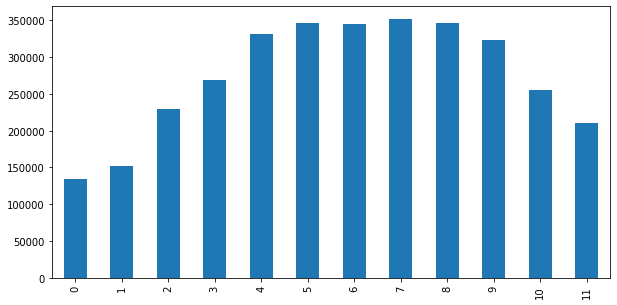

In [ ]:
data_plot = data_small_df.groupby('mnth', as_index=False).agg('sum')[['mnth','cnt']]
data_plot
data_plot['cnt'].plot.bar(figsize=(10,5))


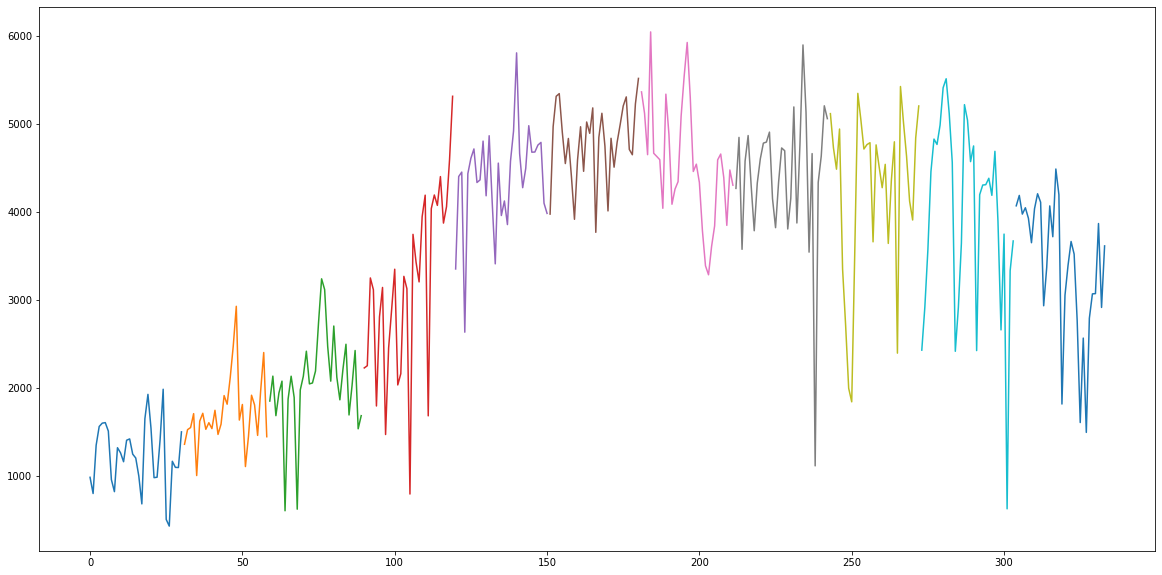

In [ ]:
data_plot_2 = data_df[['Date_dt','cnt','mnth','yr']]
data_plot_2= data_plot_2[data_plot_2['yr']==0]

for x in range(1,12):
    data_plot_2[data_plot_2['mnth']==x]['cnt'].plot(figsize=(20,10))

In [ ]:
scaler = MinMaxScaler()
data_small_df['cnt_Scaled'] = scaler.fit_transform(data_small_df[['cnt']])
data_small_df.head()

,Date_dt,cnt,mnth,cnt_Scaled
0,2011-01-01,985,1,0.110792
1,2011-01-02,801,1,0.089623
2,2011-01-03,1349,1,0.152669
3,2011-01-04,1562,1,0.177174
4,2011-01-05,1600,1,0.181546


### Traditional Embeddings

In [ ]:
pd.get_dummies(data_small_df['mnth']).head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


### Deep Encoding

In [ ]:
data_small_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
data_small_df['mnth'] = (data_small_df['mnth'] - 1).astype(int)

In [ ]:
# Inputs: the 'mnth' column; Targets: the scaled count
x = torch.tensor(data_small_df['mnth'].values, dtype=torch.long)   # LongTensor for embedding indices
y = torch.tensor(data_small_df['cnt_Scaled'].values, dtype=torch.float).unsqueeze(1)

# Create a TensorDataset and DataLoader (batch size of 4, as in the Keras code)
dataset = TensorDataset(x, y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:
# Our model uses an Embedding layer, then flattens the output and passes it through two hidden layers.
class BikeSharingModel(nn.Module):
    def __init__(self, embedding_size):
        super(BikeSharingModel, self).__init__()
        # Embedding layer: input_dim=12 (months 0 to 11), output_dim=embedding_size
        self.embedding = nn.Embedding(num_embeddings=12, embedding_dim=embedding_size)
        # Two hidden fully-connected layers
        self.fc1 = nn.Linear(embedding_size, 50)
        self.fc2 = nn.Linear(50, 15)
        # Output layer for regression (1 output)
        self.fc3 = nn.Linear(15, 1)

    def forward(self, x):
        # x is expected to be of shape [batch] or [batch, 1]
        if x.dim() > 1:
            x = x.squeeze(1)
        # Embedding returns shape [batch, embedding_size] when given [batch]
        x = self.embedding(x)
        # Pass through hidden layers with ReLU activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Instantiate the model with embedding size 3
embedding_size = 3
model = BikeSharingModel(embedding_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_x, batch_y in loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * batch_x.size(0)
    epoch_loss = running_loss / len(loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/50
183/183 [==============================] - 2s 4ms/step - loss: 0.0744 - accuracy: 0.0027
Epoch 2/50
183/183 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.0014
Epoch 3/50
183/183 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.0014
Epoch 4/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.0014
Epoch 5/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.0014
Epoch 6/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.0014
Epoch 7/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.0014
Epoch 8/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.0014
Epoch 9/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.0014
Epoch 10/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.0014

In [ ]:
# Print a summary of the model
print(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 3)              36        
                                                                 
 flatten (Flatten)           (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 50)                200       
                                                                 
 dense_1 (Dense)             (None, 15)                765       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,017
Trainable params: 1,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Extract weights from the embedding layer
embedding_weights = model.embedding.weight.detach().cpu().numpy()

embedding_weights

[array([[-0.1723242 , -0.22398467, -0.1587686 ],
        [-0.07178074, -0.13040155, -0.1773205 ],
        [-0.06258708, -0.09314278, -0.01316557],
        [-0.01270089,  0.02225325,  0.01008021],
        [ 0.10318412,  0.07598124,  0.07703916],
        [ 0.10532589,  0.11036447,  0.1453224 ],
        [ 0.07452605,  0.10285933,  0.10971527],
        [ 0.07795038,  0.10515448,  0.1272875 ],
        [ 0.10483762,  0.09837024,  0.1518811 ],
        [ 0.03947923,  0.08773048,  0.058366  ],
        [-0.04391452,  0.00449358, -0.02005504],
        [-0.05201242, -0.10185727, -0.05493237]], dtype=float32)]

In [ ]:
output_embeddings_df = pd.DataFrame(embedding_weights)
output_embeddings_df = output_embeddings_df.reset_index()
output_embeddings_df.columns = ['mnth', 'embedding_1', 'embedding_2', 'embedding_3']
print(output_embeddings_df)

,mnth,embedding_1,embedding_2,embedding_3
0,0,-0.172324,-0.223985,-0.158769
1,1,-0.071781,-0.130402,-0.177320
2,2,-0.062587,-0.093143,-0.013166
3,3,-0.012701,0.022253,0.010080
4,4,0.103184,0.075981,0.077039
5,5,0.105326,0.110364,0.145322
6,6,0.074526,0.102859,0.109715
7,7,0.077950,0.105154,0.127288
8,8,0.104838,0.098370,0.151881
9,9,0.039479,0.087730,0.058366


### Vizualisation

In [ ]:
output_embeddings_df.iloc[:,1:]

,embedding_1,embedding_2,embedding_3
0,-0.172324,-0.223985,-0.158769
1,-0.071781,-0.130402,-0.177320
2,-0.062587,-0.093143,-0.013166
3,-0.012701,0.022253,0.010080
4,0.103184,0.075981,0.077039
5,0.105326,0.110364,0.145322
6,0.074526,0.102859,0.109715
7,0.077950,0.105154,0.127288
8,0.104838,0.098370,0.151881
9,0.039479,0.087730,0.058366


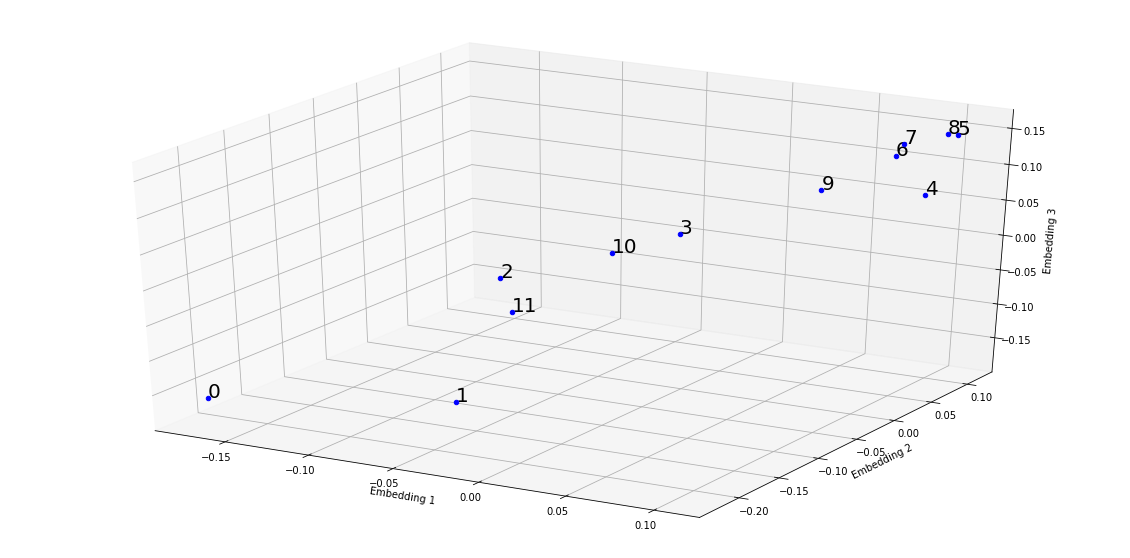

In [ ]:
m = output_embeddings_df.iloc[:, 1:].values
labels = output_embeddings_df['mnth'].values

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    ax.scatter(m[i, 0], m[i, 1], m[i, 2], color='b')
    ax.text(m[i, 0], m[i, 1], m[i, 2], str(labels[i]), size=20, zorder=1, color='k')

ax.set_xlabel('Embedding 1')
ax.set_ylabel('Embedding 2')
ax.set_zlabel('Embedding 3')
plt.show()

[Table2Vec: Neural Word and Entity Embeddings for Table Population and Retrieval](https://arxiv.org/abs/1906.00041)

[GitHub Table2vec](https://github.com/ninalx/table2vec-lideng)

## Memory-efficient embeddings for recommendation systems

We will be drawing on the [embeddings tutorial](https://keras.io/examples/keras_recipes/memory_efficient_embeddings/) included in the official Keras documentation on the topic, authored by [Khalid Salama](https://www.linkedin.com/in/khalid-salama-24403144/).

ap### Introduction

This example demonstrates two techniques for building memory-efficient recommendation models
by reducing the size of the embedding tables, without sacrificing model effectiveness:

1. [Quotient-remainder trick](https://arxiv.org/abs/1909.02107), by Hao-Jun Michael Shi et al.,
which reduces the number of embedding vectors to store, yet produces unique embedding
vector for each item without explicit definition.
2. [Mixed Dimension embeddings](https://arxiv.org/abs/1909.11810), by Antonio Ginart et al.,
which stores embedding vectors with mixed dimensions, where less popular items have
reduced dimension embeddings.

We use the [1M version of the Movielens dataset](https://grouplens.org/datasets/movielens/1m/).
The dataset includes approximately 1 million ratings from 6,000 users on 4,000 movies.

### Setup

In [ ]:
import os
import math
from zipfile import ZipFile
from urllib.request import urlretrieve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

### Prepare the data

### Download and process data

In [ ]:
if not os.path.exists("movielens.zip"):
    urlretrieve("http://files.grouplens.org/datasets/movielens/ml-1m.zip", "movielens.zip")
ZipFile("movielens.zip", "r").extractall()

# Read ratings data (using engine="python" for the nonstandard "::" delimiter)
ratings_data = pd.read_csv(
    "ml-1m/ratings.dat",
    sep="::",
    names=["user_id", "movie_id", "rating", "unix_timestamp"],
    engine="python"
)

# Preprocess: add prefixes, cast rating to float, and remove the timestamp
ratings_data["movie_id"] = ratings_data["movie_id"].apply(lambda x: f"movie_{x}")
ratings_data["user_id"] = ratings_data["user_id"].apply(lambda x: f"user_{x}")
ratings_data["rating"] = ratings_data["rating"].astype(float)
ratings_data.drop(columns=["unix_timestamp"], inplace=True)

print(f"Number of users: {len(ratings_data.user_id.unique())}")
print(f"Number of movies: {len(ratings_data.movie_id.unique())}")
print(f"Number of ratings: {len(ratings_data.index)}")

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Number of users: 6040
Number of movies: 3706
Number of ratings: 1000209




### Create train and evaluate data splits

In [ ]:
random_selection = np.random.rand(len(ratings_data)) <= 0.85
train_data = ratings_data[random_selection]
eval_data = ratings_data[~random_selection]

# Save CSV files (delimiter "|" and no header)
train_data.to_csv("train_data.csv", index=False, sep="|", header=False)
eval_data.to_csv("eval_data.csv", index=False, sep="|", header=False)
print(f"Train data split: {len(train_data.index)}")
print(f"Eval data split: {len(eval_data.index)}")
print("Train and eval data files are saved.")

Train data split: 850713
Eval data split: 149496
Train and eval data files are saved.


### Define dataset metadata and hyperparameters

In [ ]:
csv_header = list(ratings_data.columns)  # ["user_id", "movie_id", "rating"]

user_vocabulary = list(ratings_data.user_id.unique())
movie_vocabulary = list(ratings_data.movie_id.unique())

target_feature_name = "rating"
learning_rate = 0.001
batch_size = 128
num_epochs = 3
base_embedding_dim = 64

### Train and evaluate the model

In [ ]:
class MovieLensDataset(Dataset):
    def __init__(self, csv_file, user2idx, movie2idx, header, sep="|"):
        # The CSV files have no header; we assign column names from header.
        self.data = pd.read_csv(csv_file, sep=sep, header=None, names=header)
        self.user2idx = user2idx
        self.movie2idx = movie2idx

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        user = row["user_id"]
        movie = row["movie_id"]
        rating = float(row["rating"])
        return {
            "user": torch.tensor(self.user2idx[user], dtype=torch.long),
            "movie": torch.tensor(self.movie2idx[movie], dtype=torch.long),
            "rating": torch.tensor(rating, dtype=torch.float)
        }

# Create datasets and data loaders.
train_dataset = MovieLensDataset("train_data.csv", user2idx, movie2idx, csv_header)
eval_dataset = MovieLensDataset("eval_data.csv", user2idx, movie2idx, csv_header)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)

def run_experiment(model, train_loader, eval_loader, num_epochs, learning_rate, device):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    history = {"loss": [], "val_loss": []}

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in train_loader:
            user = batch["user"].to(device)
            movie = batch["movie"].to(device)
            rating = batch["rating"].to(device).unsqueeze(1)
            optimizer.zero_grad()
            pred = model(user, movie)
            loss = criterion(pred, rating)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * user.size(0)
        train_loss /= len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in eval_loader:
                user = batch["user"].to(device)
                movie = batch["movie"].to(device)
                rating = batch["rating"].to(device).unsqueeze(1)
                pred = model(user, movie)
                loss = criterion(pred, rating)
                val_loss += loss.item() * user.size(0)
        val_loss /= len(eval_loader.dataset)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        history["loss"].append(train_loss)
        history["val_loss"].append(val_loss)
    return history

### Experiment 1: baseline collaborative filtering model

#### Implement embedding encoder

In [ ]:

def embedding_encoder(vocabulary, embedding_dim, num_oov_indices=0, name=None):
    return keras.Sequential(
        [
            StringLookup(
                vocabulary=vocabulary, mask_token=None, num_oov_indices=num_oov_indices
            ),
            layers.Embedding(
                input_dim=len(vocabulary) + num_oov_indices, output_dim=embedding_dim
            ),
        ],
        name=f"{name}_embedding" if name else None,
    )


### Implement the baseline model

In [ ]:
class BaselineModel(nn.Module):
    def __init__(self, num_users, num_movies, base_embedding_dim):
        super(BaselineModel, self).__init__()
        self.user_embedding = nn.Embedding(num_users, base_embedding_dim)
        self.movie_embedding = nn.Embedding(num_movies, base_embedding_dim)

    def forward(self, user, movie):
        user_emb = self.user_embedding(user)       # [batch, base_embedding_dim]
        movie_emb = self.movie_embedding(movie)     # [batch, base_embedding_dim]
        # Dot product similarity (per sample)
        dot = (user_emb * movie_emb).sum(dim=1, keepdim=True)
        pred = torch.sigmoid(dot) * 5
        return pred

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate and train the baseline model.
baseline_model = BaselineModel(len(user_vocabulary), len(movie_vocabulary), base_embedding_dim)
print(baseline_model)

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Model: "baseline_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 movie_id (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 user_embedding (Sequential)    (None, 64)           386560      ['user_id[0][0]']                
                                                                                                  
 movie_embedding (Sequential)   (None, 64)           237184      ['movie_id[0][0]']               
                                                                                     

Notice that the number of trainable parameters is 623,744

Epoch 1/3
6647/6647 [==============================] - 172s 26ms/step - loss: 1.1455 - mae: 0.8613 - val_loss: 0.9283 - val_mae: 0.7546
Epoch 2/3
6647/6647 [==============================] - 168s 25ms/step - loss: 0.8151 - mae: 0.7130 - val_loss: 0.7941 - val_mae: 0.7055
Epoch 3/3
6647/6647 [==============================] - 168s 25ms/step - loss: 0.7314 - mae: 0.6746 - val_loss: 0.7526 - val_mae: 0.6853


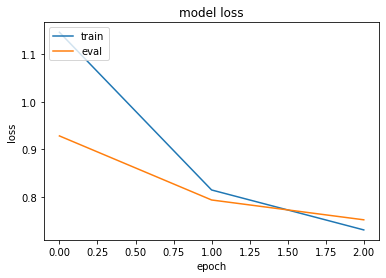

In [ ]:
baseline_history = run_experiment(baseline_model, train_loader, eval_loader, num_epochs, learning_rate, device)

plt.plot(baseline_history["loss"], label="train")
plt.plot(baseline_history["val_loss"], label="eval")
plt.title("Baseline Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Experiment 2: memory-efficient model

### Implement Quotient-Remainder embedding as a layer

The Quotient-Remainder technique works as follows. For a set of vocabulary and  embedding size
`embedding_dim`, instead of creating a `vocabulary_size X embedding_dim` embedding table,
we create *two* `num_buckets X embedding_dim` embedding tables, where `num_buckets`
is much smaller than `vocabulary_size`.
An embedding for a given item `index` is generated via the following steps:

1. Compute the `quotient_index` as `index // num_buckets`.
2. Compute the `remainder_index` as `index % num_buckets`.
3. Lookup `quotient_embedding` from the first embedding table using `quotient_index`.
4. Lookup `remainder_embedding` from the second embedding table using `remainder_index`.
5. Return `quotient_embedding` * `remainder_embedding`.

This technique reduces the number of embedding vectors needs to be stored and trained,
but also generates a *unique* embedding vector for each item of size `embedding_dim`.
Note that `q_embedding` and `r_embedding` can be combined using other operations,
like `Add` and `Concatenate`.

In [ ]:
class QREmbedding(nn.Module):
    def __init__(self, num_embeddings, embedding_dim, num_buckets):
        super(QREmbedding, self).__init__()
        self.num_buckets = num_buckets
        self.q_embeddings = nn.Embedding(num_buckets, embedding_dim)
        self.r_embeddings = nn.Embedding(num_buckets, embedding_dim)

    def forward(self, x):
        # x: LongTensor of shape [batch] (assumed already an index)
        quotient = x // self.num_buckets
        remainder = x % self.num_buckets
        q_emb = self.q_embeddings(quotient)
        r_emb = self.r_embeddings(remainder)
        return q_emb * r_emb

### Implement Mixed Dimension embedding as a layer

In the mixed dimension embedding technique, we train embedding vectors with full dimensions
for frequently queried items, while training embedding vectors with *reduced dimensions*
for less frequent items, plus a *projection weights matrix* to bring low dimension embeddings
to full dimensions. Why? More information on the frequently queried items provides us with high resolution similarity and difference that we can appreciate even if that resolution is not available for the infrequently queried itesm--its like defining a different number of significant digits for quantities understood with greater or less certainty.

More precisely, we define *blocks* of items of similar frequencies. For each block,
a `block_vocab_size X block_embedding_dim` embedding table and `block_embedding_dim X full_embedding_dim`
projection weights matrix are created. Note that, if `block_embedding_dim` equals `full_embedding_dim`,
the projection weights matrix becomes an *identity* matrix. Embeddings for a given batch of item
`indices` are generated via the following steps:

1. For each block, lookup the `block_embedding_dim` embedding vectors using `indices`, and
project them to the `full_embedding_dim`.
2. If an item index does not belong to a given block, an out-of-vocabulary embedding is returned.
Each block will return a `batch_size X full_embedding_dim` tensor.
3. A mask is applied to the embeddings returned from each block in order to convert the
out-of-vocabulary embeddings to vector of zeros. That is, for each item in the batch,
a single non-zero embedding vector is returned from the all block embeddings.
4. Embeddings retrieved from the blocks are combined using *sum* to produce the final
`batch_size X full_embedding_dim` tensor.

In [ ]:
class MDEmbedding(nn.Module):
    def __init__(self, movie_vocabulary, movie_blocks_vocabulary, blocks_embedding_dims, base_embedding_dim, movie2idx):
        super(MDEmbedding, self).__init__()
        self.base_embedding_dim = base_embedding_dim
        self.num_blocks = len(movie_blocks_vocabulary)
        # For each movie (from the baseline vocabulary), determine which block it belongs to and its local index.
        self.movie_to_block = []
        self.movie_local_index = []
        # Build lookup dictionaries for each block.
        block_dicts = []
        for block in movie_blocks_vocabulary:
            block_dict = {movie: i for i, movie in enumerate(block)}
            block_dicts.append(block_dict)
        for movie in movie_vocabulary:
            found = False
            for b_idx, block_dict in enumerate(block_dicts):
                if movie in block_dict:
                    self.movie_to_block.append(b_idx)
                    self.movie_local_index.append(block_dict[movie])
                    found = True
                    break
            if not found:
                # If not found, assign to block 0 with OOV index.
                self.movie_to_block.append(0)
                self.movie_local_index.append(len(movie_blocks_vocabulary[0]))
        # Convert to tensors for vectorized lookup.
        self.movie_to_block = torch.tensor(self.movie_to_block)   # shape: [num_movies]
        self.movie_local_index = torch.tensor(self.movie_local_index)  # shape: [num_movies]

        # Create embedding encoders and (if needed) linear projectors for each block.
        self.block_embedding_encoders = nn.ModuleList()
        self.block_embedding_projectors = nn.ModuleList()
        for i, block in enumerate(movie_blocks_vocabulary):
            num_embeddings = len(block) + 1  # +1 for OOV.
            embedding_dim = blocks_embedding_dims[i]
            emb = nn.Embedding(num_embeddings, embedding_dim)
            self.block_embedding_encoders.append(emb)
            if embedding_dim == base_embedding_dim:
                self.block_embedding_projectors.append(nn.Identity())
            else:
                self.block_embedding_projectors.append(nn.Linear(embedding_dim, base_embedding_dim))

    def forward(self, movie_indices):
        # movie_indices: LongTensor of shape [batch] (indices from baseline movie2idx)
        # Look up the precomputed block and local index for each movie.
        block_indices = self.movie_to_block[movie_indices].to(movie_indices.device)
        local_indices = self.movie_local_index[movie_indices].to(movie_indices.device)
        batch_size = movie_indices.size(0)
        output = torch.zeros((batch_size, self.base_embedding_dim), device=movie_indices.device)
        # Process each block separately.
        for b in range(self.num_blocks):
            mask = (block_indices == b)
            if mask.sum() > 0:
                indices_in_block = local_indices[mask]
                emb = self.block_embedding_encoders[b](indices_in_block)
                emb = self.block_embedding_projectors[b](emb)
                output[mask] = emb
        return output

### Implement the memory-efficient model

In this experiment, we use the **Quotient-Remainder** technique to reduce the
size of the user embeddings, and the **Mixed Dimension** technique to reduce the size of the movie embeddings.

While in the associated [paper](https://arxiv.org/abs/1909.11810), an alpha-power rule is used to determined dimensions of the embedding for each block, we simply set the number of blocks and the
dimensions of embeddings of each block based on the histogram visualization of movie popularity.

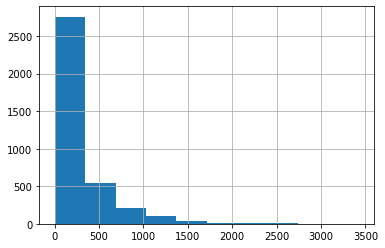

In [ ]:
movie_frequencies = ratings_data["movie_id"].value_counts()
movie_frequencies.hist(bins=10)

You can see that we can group movies into three blocks, and assign them 64, 32, and 16
embedding dimensions, respectively. Experiment with different number of blocks
and dimensions.

In [ ]:
sorted_movie_vocabulary = list(movie_frequencies.keys())

movie_blocks_vocabulary = [
    sorted_movie_vocabulary[:400],  # high popularity movies block
    sorted_movie_vocabulary[400:1700],  # normal popularity movies block
    sorted_movie_vocabulary[1700:],  # low popularity movies block
]

movie_blocks_embedding_dims = [64, 32, 16]

user_embedding_num_buckets = len(user_vocabulary) // 50

In [ ]:
class MemoryEfficientModel(nn.Module):
    def __init__(self, num_users, user_embedding_num_buckets, base_embedding_dim,
                 movie_vocabulary, movie_blocks_vocabulary, blocks_embedding_dims, movie2idx):
        super(MemoryEfficientModel, self).__init__()
        self.user_embedding = QREmbedding(num_users, base_embedding_dim, user_embedding_num_buckets)
        self.movie_embedding = MDEmbedding(movie_vocabulary, movie_blocks_vocabulary,
                                           blocks_embedding_dims, base_embedding_dim, movie2idx)

    def forward(self, user, movie):
        user_emb = self.user_embedding(user)
        movie_emb = self.movie_embedding(movie)
        dot = (user_emb * movie_emb).sum(dim=1, keepdim=True)
        pred = torch.sigmoid(dot) * 5
        return pred

In [ ]:
memory_efficient_model = MemoryEfficientModel(len(user_vocabulary), user_embedding_num_buckets,
                                              base_embedding_dim, movie_vocabulary,
                                              movie_blocks_vocabulary, movie_blocks_embedding_dims,
                                              movie2idx)
print(memory_efficient_model)

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Model: "baseline_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 movie_id (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 user_embedding (QREmbedding)   (None, 64)           15360       ['user_id[0][0]']                
                                                                                                  
 movie_embedding (MDEmbedding)  (None, 64)           102608      ['movie_id[0][0]']               
                                                                                     

Notice that the number of trainable parameters is 117,968, which is more than 5x less than
the number of parameters in the baseline model.

Epoch 1/3
6647/6647 [==============================] - 130s 19ms/step - loss: 1.0312 - mae: 0.8135 - val_loss: 1.0625 - val_mae: 0.8050
Epoch 2/3
6647/6647 [==============================] - 129s 19ms/step - loss: 0.8855 - mae: 0.7484 - val_loss: 0.8944 - val_mae: 0.7506
Epoch 3/3
6647/6647 [==============================] - 130s 20ms/step - loss: 0.8369 - mae: 0.7257 - val_loss: 0.8603 - val_mae: 0.7352


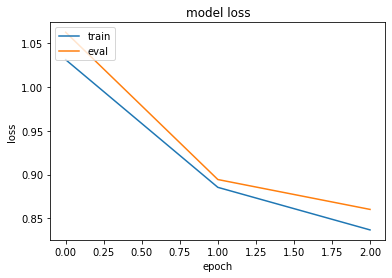

In [ ]:
memory_efficient_history = run_experiment(memory_efficient_model, train_loader, eval_loader,
                                          num_epochs, learning_rate, device)

plt.plot(memory_efficient_history["loss"], label="train")
plt.plot(memory_efficient_history["val_loss"], label="eval")
plt.title("Memory Efficient Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Homework

1. **(Data)**: Find and load a tabular or categorical dataset of your choice, ideally related to your final project.

2. **(Deep Embedding)**
   - Implement the wide & deep model or the deep & cross model to perform a classification or regression task on your data.
   - Use any categorical or tabular embedding method on your data.
   - Extract features from your model and visualise them.

3. **(Reflection)**
   - For your model (wide & deep model or deep & cross), compare to an XGBoost or random forest, and **report** on:
     - Which task they seem to perform best on.
     - Where they performed poorly, and your hypothesis **why**.

---



# Module 4: Knowledge Graph Embeddings

A knowledge graph (KG) is a directed heterogeneous multigraph whose node and relation types have domain-specific semantics (e.g., body parts linked by a joint or tendon; people possessing a shared characteristic). KGs allow us to encode the knowledge into a form that is human interpretable and amenable to automated analysis and inference. KGs are becoming a popular approach to represent diverse types of information in the form of different types of entities connected via different types of relations.

When working with KGs, we adopt a different terminology than the traditional vertices and edges used in graphs. The vertices of the knowledge graph are often called entities and the directed edges are often called triplets and are represented as a (h, r, t) tuple, where h is the head entity, t is the tail entity, and r is the relation associating the head with the tail entities. Note that the term relation here refers to the type of the relation (e.g., one of wants-to-buy, has-bought, is-customer-of, and is-selling). We note that this terminology may vary. For example, the RDF (resource description framework) data model draws on the language of logical inference, calling head, tail and relation as subject, object and predicate (i.e., verb). An (h,r,t) and (s,p,o) triple are the same thing. Sometimes, in linguistic settings, the p (predicate) is replaced by a v for verb, yielding an (s,v,o) triplet.

Knowledge Graph Embeddings can then be used to learn these head, tail and relational (or s,p/v,o) entities as embeddings which can then be used for a variety of downstream tasks.

In this section, you will be following a variant of a Knowledge Graph Embeddings tutorial previously conducted at ECAI 2020, an AI conference. The tutorial uses AmpliGraph (by Accenture), which is currently the most used open source KGE package, but there are many other options:

- scikit-kge - ([blog post](https://mnick.github.io/project/knowledge-graph-embeddings/), [code](https://github.com/mnick/scikit-kge), [helper code](https://github.com/mnick/scikit-kge))

- kgetorch - ([documentation](https://torchkge.readthedocs.io/en/latest/reference/models.html), [code](https://github.com/torchkge-team/torchkge), [helper code](https://github.com/bakerwho/weboftruth/blob/master/weboftruth/utils.py))

- pykg2vec - ([documentation](https://pykg2vec.readthedocs.io/en/latest/index.html), [code](https://github.com/Sujit-O/pykg2vec)

We are working to create material and support these packages as well.



## ECAI 2020 Tutorials on KGE

<u>**Contents**</u>
- Loading a KG and creating train/test splits
- Training and evaluating a KGE Model
- Testing user hypothesis
- Early stopping and types of evaluation
- Choosing model hyperparameters
- Discovering facts using trained model
- Visualizing embeddings and Clustering


In [ ]:
# empty cell

### 1. Introduction and Preliminaries

For this hands-on tutorial, we will be using the open-source library [AmpliGraph](https://github.com/Accenture/AmpliGraph).

Let's start by installing the library and it's dependencies, and then importing the libraries used in this tutorial.

In [ ]:
# If running on local system execute this cell

# Install CUDA
#! conda install -y cudatoolkit=10.0

# Install cudnn libraries
# This library improves the performance of tensorflow, however, we need to give up determinism over speed.
#! conda install cudnn=7.6

# Install tensorflow GPU
# ! pip install tensorflow-gpu==1.15.3

In [ ]:
# If using Google Colab run this cell

# select tensorflow version for colab
%tensorflow_version 1.x

TensorFlow 1.x selected.


Let us check if tensorflow is correctly installed and if we can access the GPU

In [ ]:
import tensorflow as tf

print('TensorFlow  version: {}'.format(tf.__version__))

# Get the GPU name
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow  version: 1.15.2
Found GPU at: /device:GPU:0


Let's install AmpliGraph and other dependencies

In [ ]:
%%capture
# Install AmpliGraph library
! pip install ampligraph

# Required to visualize embeddings with tensorboard projector, comment out if not required!
! pip install --user tensorboard

# Required to plot text on embedding clusters, comment out if not required!
! pip install --user git+https://github.com/Phlya/adjustText

In [ ]:
# All imports used in this tutorial
%tensorflow_version 1.x
import ampligraph
import numpy as np
import pandas as pd
import tensorflow as tf
from ampligraph.datasets import load_fb15k_237
from ampligraph.evaluation import train_test_split_no_unseen, evaluate_performance, mr_score, mrr_score, hits_at_n_score
from ampligraph.discovery import query_topn, discover_facts, find_clusters
from ampligraph.latent_features import TransE, ComplEx, HolE, DistMult, ConvE, ConvKB
from ampligraph.utils import save_model, restore_model

def display_aggregate_metrics(ranks):
    print('Mean Rank:', mr_score(ranks))
    print('Mean Reciprocal Rank:', mrr_score(ranks))
    print('Hits@1:', hits_at_n_score(ranks, 1))
    print('Hits@10:', hits_at_n_score(ranks, 10))
    print('Hits@100:', hits_at_n_score(ranks, 100))

print('Ampligraph version: {}'.format(ampligraph.__version__))

Ampligraph version: 1.4.0


### 2. Loading a Knowledge Graph dataset

To begin we're going to need a knowledge graph, so let's load a standard knowledge graph called ***Freebase-15k-237***.

Ampligraph provides a set of APIs to [load standard knowledge graphs](https://docs.ampligraph.org/en/1.3.1/ampligraph.datasets.html#benchmark-datasets-loaders).

Also provided are a set of APIs load csv, ntriples and rdf formats. Details can be found [here](https://docs.ampligraph.org/en/1.3.1/ampligraph.datasets.html#loaders-for-custom-knowledge-graphs)


In [ ]:
from ampligraph.datasets import load_fb15k_237, load_wn18rr, load_yago3_10


For this tutorial we have remapped the IDs of freebase 237 and created a csv file containing human readable names instead of IDs.

In [ ]:
import pandas as pd

URL = 'https://ampgraphenc.s3-eu-west-1.amazonaws.com/datasets/freebase-237-merged-and-remapped.csv'
dataset = pd.read_csv(URL, header=None)
dataset.columns = ['subject', 'predicate', 'object']
dataset.head(5)

,subject,predicate,object
0,"queens college, city university of new york",/education/educational_institution/students_gr...,carol leifer
1,digital equipment corporation,/business/business_operation/industry,computer hardware
2,/m/0drtv8,/award/award_ceremony/awards_presented./award/...,laurence mark
3,the departed,/award/award_winning_work/awards_won./award/aw...,leonardo dicaprio
4,marilyn manson,/people/person/profession,actor


In [ ]:
print('Total triples in the KG:', dataset.shape)

Total triples in the KG: (310079, 3)



![KG](https://user-images.githubusercontent.com/39597669/90747195-9fc44c80-e2c8-11ea-9f70-097993581bac.png)



### 2.1 Create training, validation and test splits

Let's use the [`train_test_split_no_unseen`](https://docs.ampligraph.org/en/1.3.1/generated/ampligraph.evaluation.train_test_split_no_unseen.html?#train-test-split-no-unseen) function provided by Ampligraph to create the training, validation and test splits.

This API ensures that the test and validation splits contains triples whose entities are "seen" during training.


In [ ]:
from ampligraph.evaluation import train_test_split_no_unseen
# get the validation set of size 500
test_train, X_valid = train_test_split_no_unseen(dataset.values, 500, seed=0)

# get the test set of size 1000 from the remaining triples
X_train, X_test = train_test_split_no_unseen(test_train, 1000, seed=0)

print('Total triples:', dataset.shape)
print('Size of train:', X_train.shape)
print('Size of valid:', X_valid.shape)
print('Size of test:', X_test.shape)

Total triples: (310079, 3)
Size of train: (308579, 3)
Size of valid: (500, 3)
Size of test: (1000, 3)


###**Key Takeaways**

- `train_test_split_no_unseen` API can be used to generate train/test splits such that test set contains only entities 'seen' during training

### 3. Model Training
Now that we have split the dataset, let's dive directly into model training.

Let us create a TransE model and train it on the training split using the `fit` function.

**TransE** is one of the first embedding models which set the platform for the KGE research. It is an energy-based model for learning entity embeddings such that relationships are represented as translations in the embedding space: if $(s, p, o)$ holds, then the embedding of the
object entity o should be close to the embedding of the subject entity $s$ plus some vector that depends on the predicate $p$. TransE has a very low number of trainable parameters compared to most modelsIn and uses simple vector algebra to score triples:

$Score=||s+p-o||_n$

In [ ]:
from ampligraph.latent_features import TransE

model = TransE(k=150,                                                             # embedding size
               epochs=100,                                                        # Num of epochs
               batches_count= 10,                                                 # Number of batches
               eta=1,                                                             # number of corruptions to generate during training
               loss='pairwise', loss_params={'margin': 1},                        # loss type and it's hyperparameters
               initializer='xavier', initializer_params={'uniform': False},       # initializer type and it's hyperparameters
               regularizer='LP', regularizer_params= {'lambda': 0.001, 'p': 3},   # regularizer along with its hyperparameters
               optimizer= 'adam', optimizer_params= {'lr': 0.001},                # optimizer to use along with its hyperparameters
               seed= 0, verbose=True)

model.fit(X_train)

from ampligraph.utils import save_model, restore_model
save_model(model, 'TransE-small.pkl')

Average TransE Loss:   0.013551: 100%|██████████| 100/100 [00:10<00:00, 10.00epoch/s]


You can refer [this link](https://docs.ampligraph.org/en/latest/api.html) for detailed explaination of the parameters and their values.

### 3.1 Compute the evaluation metrics

### Per triple metrics:
This is a metric computed for each test set triple:

- **score**: This is the value assigned to a triple, by the model, by applying the scoring function.

Let's look at how we can get the score for a triple of interest and how to interpret it.


In [ ]:
test_triple = ['harrison ford',
               '/film/actor/film./film/performance/film',
               'star wars']

triple_score = model.predict(test_triple)

print('Triple of interest:\n', test_triple)
print('Triple Score:\n', triple_score)

Triple of interest:
 ['harrison ford', '/film/actor/film./film/performance/film', 'star wars']
Triple Score:
 [-8.411186]


But what does this score tell you? Nothing! It is just a value. In order to interpret the score we have 2 options:

1. We can create a list of hypotheses that we want to test, score them and then choose the top $n$ hypotheses as True statements.

2. Unlike a classification task, we are doing a learning to rank task. In order to interpret the score we can generate the corruptions and compare the triple score against the scores of corruptions to see how well the model ranks the test triple against them.

Let's look at the first option, create a list of hypotheses and score them.

In [ ]:
import numpy as np
list_of_actors = ['salma hayek', 'carrie fisher', 'natalie portman',  'kristen bell',
                  'mark hamill', 'neil patrick harris', 'harrison ford' ]

# stack it horizontally to create s, p, o
hypothesis = np.column_stack([list_of_actors,
                              ['/film/actor/film./film/performance/film'] * len(list_of_actors),
                              ['star wars'] * len(list_of_actors),
                             ])

# score the hypothesis
triple_scores = model.predict(hypothesis)

# append the scores column
scored_hypothesis = np.column_stack([hypothesis, triple_scores])
# sort by score in descending order
scored_hypothesis = scored_hypothesis[np.argsort(scored_hypothesis[:, 3])]
scored_hypothesis

array([['harrison ford', '/film/actor/film./film/performance/film',
        'star wars', '-8.411186'],
       ['natalie portman', '/film/actor/film./film/performance/film',
        'star wars', '-8.487747'],
       ['carrie fisher', '/film/actor/film./film/performance/film',
        'star wars', '-8.995587'],
       ['neil patrick harris', '/film/actor/film./film/performance/film',
        'star wars', '-9.21589'],
       ['salma hayek', '/film/actor/film./film/performance/film',
        'star wars', '-9.554007'],
       ['kristen bell', '/film/actor/film./film/performance/film',
        'star wars', '-9.60973'],
       ['mark hamill', '/film/actor/film./film/performance/film',
        'star wars', '-9.63883']], dtype='<U39')


- **rank**: For a triple, this metric is computed by generating corruptions (random triples) and then scoring them and computing the rank(position) of the triple score against the corruptions. The pseudocode and the example illustrates how to compute rank on the test set.

         for each test set triple <h, r, t>:
                 a. Compute the score of the test triple (hypothesis)
                     hypothesis_score = score(<h, r, t>)
                     
                 b. Generate the subject corruptions
                         sub_corr = <?, r, t>
                 c. Compute the score of the subject corruptions
                         sub_corr_score = score(sub_corr)
                 d. Find the position of hypothesis_score in sub_corr_score to get the sub_rank
                   
                 e. Generate the object corruption
                         obj_corr = <h, r, ?>
                 f. Compute the score of the object corruptions
                         obj_corr_score = score(obj_corr)
                 g. Find the position of hypothesis_score in obj_corr_score to get the obj_rank
                 
                 h. Return rank = [sub_rank, obj_rank]



![rank example](https://user-images.githubusercontent.com/281477/90627614-14897f00-e214-11ea-8f8e-d57da9888606.png)





### Illustrative Example

**Compute the score of the test triple**

In [ ]:
test_triple = ['harrison ford',
               '/film/actor/film./film/performance/film',
               'star wars']

triple_score = model.predict(test_triple)

print('Triple of interest:\n', test_triple)
print('Triple Score:\n', triple_score)

Triple of interest:
 ['harrison ford', '/film/actor/film./film/performance/film', 'star wars']
Triple Score:
 [-8.411186]


Before generating the corruptions, let us look at the number of unique entities present in our dataset

In [ ]:
print('The number of unique entities:', len(model.ent_to_idx))

The number of unique entities: 14184


**Generate the subject *corruptions* and compute rank**
> ```sub_corr = <?, r, t>```

In [ ]:

subj_corr =  np.column_stack([list(model.ent_to_idx.keys()),
                [test_triple[1]] * len(model.ent_to_idx),
                [test_triple[2]] * len(model.ent_to_idx)])

print('Subject corruptions:\n', subj_corr)
print('\nSize of subject corruptions:\n', subj_corr.shape)

Subject corruptions:
 [['/m/011xg5' '/film/actor/film./film/performance/film' 'star wars']
 ['/m/011yd2' '/film/actor/film./film/performance/film' 'star wars']
 ['/m/011yxg' '/film/actor/film./film/performance/film' 'star wars']
 ...
 ['zoology' '/film/actor/film./film/performance/film' 'star wars']
 ['zurich' '/film/actor/film./film/performance/film' 'star wars']
 ['zz top' '/film/actor/film./film/performance/film' 'star wars']]

Size of subject corruptions:
 (14184, 3)


**Compute the score of the subject corruptions**

In [ ]:
sub_corr_score = model.predict(subj_corr)

Now that we have a score, let us compute the rank as follows:

<center>$COUNT ( corruption_{score} >= triple_{score} )$</center>

Find the position of hypothesis_score in sub_corr_score to get the sub_rank

In [ ]:
sub_rank_worst = np.sum(np.greater_equal(sub_corr_score, triple_score[0])) + 1

print('Assigning the worst rank (to break ties):', sub_rank_worst)

Assigning the worst rank (to break ties): 1687


**Generate the object *corruptions* and compute rank**

>    ``` obj_corr = <h, r, ?> ```


In [ ]:
obj_corr =  np.column_stack([
                [test_triple[0]] * len(model.ent_to_idx),
                [test_triple[1]] * len(model.ent_to_idx),
                     list(model.ent_to_idx.keys())])


print('Object corruptions:\n', obj_corr)
print('\nSize of object corruptions:\n', obj_corr.shape)

# f. Compute the score of the object corruptions
obj_corr_score = model.predict(obj_corr)

# g. Find the position of hypothesis_score in obj_corr_score to get the obj_rank
obj_rank_worst = np.sum(np.less_equal(triple_score[0], obj_corr_score)) + 1
print('Assigning the worst rank (to break ties):', obj_rank_worst)


Object corruptions:
 [['harrison ford' '/film/actor/film./film/performance/film' '/m/011xg5']
 ['harrison ford' '/film/actor/film./film/performance/film' '/m/011yd2']
 ['harrison ford' '/film/actor/film./film/performance/film' '/m/011yxg']
 ...
 ['harrison ford' '/film/actor/film./film/performance/film' 'zoology']
 ['harrison ford' '/film/actor/film./film/performance/film' 'zurich']
 ['harrison ford' '/film/actor/film./film/performance/film' 'zz top']]

Size of object corruptions:
 (14184, 3)
Assigning the worst rank (to break ties): 821


In [ ]:
print('Subject corruption rank:', sub_rank_worst)
print('Object corruption rank:', obj_rank_worst)

Subject corruption rank: 1687
Object corruption rank: 821


**Computing the (Unfiltered) rank using evaluate_performance API**

We can use the [evaluate_performance](https://docs.ampligraph.org/en/latest/generated/ampligraph.evaluation.evaluate_performance.html) API to compute ranks. By default, `evaluate_performance` API computes the unfiltered ranks i.e. if any true positives are present in corruptions, they will not be removed before ranking. However, usually for evaluation, we follow a filtered evaluation as described in the next section.


In [ ]:
from ampligraph.evaluation import evaluate_performance

ranks = evaluate_performance(np.array([test_triple]),
                             model=model,
                             ranking_strategy='worst')

print('\nRanks:', ranks)

100%|██████████| 1/1 [00:00<00:00,  4.81it/s]


Ranks: [[1687  821]]


There are multiple strategies to compute ranks especially when there are ties. Lets look at each in detail with an example.

Assume there are only 10 corruptions, and assume that all the corruptions get the same score as the test triple. The ranks are as follows
- Assign the **worst rank** i.e. the test set triple gets a rank of 11. This is followed by most papers in the literature. This is the strictest approach and it drives down the mrr by a large margin if there are many ties. We employ this strategy in AmpliGraph.

<center> $rank = COUNT( corruption_{score} \ge hypothesis_{score} )$ + 1</center>
    
- Assign the **middle rank** i.e. the test set triple gets a rank of 6. We found this strategy being used by [ICLR 2020 paper](https://openreview.net/pdf?id=BkxSmlBFvr). This approach seems to be fair towards the model in resolving the ties as it assigns the middle rank to break ties.

<center> $rank = COUNT( corruption_{score} \gt hypothesis_{score} ) + \dfrac{COUNT( corruption_{score} == hypothesis_{score} )}{2}$ + 1</center>

- Assign the **best rank** i.e. the test set triple gets a rank of 1. This approach is followed by [ConvKB paper](https://arxiv.org/pdf/1712.02121.pdf).  This approach is overly biased and helps the model achieve a very good mrr in case of ties.

<center> $rank = COUNT( corruption_{score} \gt hypothesis_{score} )$ + 1</center>

We recommend the usage of the **worst** strategy (default).

### 3.2 Filtered evaluation
While evaluating ([as described earlier](#Compute-the-evaluation-metrics)), we generate all corruptions (using all unique entities in our dataset) per test triple, score and rank them. While doing so, we are not filtering the true positives - in other words, some corruptions may not really be corruptions and may be ground truth triples observed during training. Training triples usually get a high score as they are "observed" by the model. Hence a test triple would get a lower rank if such triples appear in corruptions. To filter out the True Positives (after step b. and e.), one can pass all the True Positive triples  to `filter_triples` parameter of the `evaluate_performance` API. This will perform a **"filtered" evaluation** and return the **"filtered" ranks** adjusted by removing the True Positives from the corruptions. More details for `evaluate_performance` API can be found [here](https://docs.ampligraph.org/en/latest/generated/ampligraph.evaluation.evaluate_performance.html#ampligraph.evaluation.evaluate_performance).


In [ ]:
from ampligraph.evaluation import evaluate_performance

print('Size of X_test:', X_test.shape)

X_filter = np.concatenate([X_train, X_valid, X_test], 0)

ranks = evaluate_performance(np.array([test_triple]),
                             model=model,
                             filter_triples=X_filter)

print(ranks)

Size of X_test: (1000, 3)


100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


[[1677  811]]


One obvious question is why do we append the Valid and Test set to the X_filter. The model has not "observed" them during training. We do so because, we would like to evaluate a test triple against it's corruptions and not against known facts. If we know that the Validation triples and Test triples are facts (and not queries), we need to filter these triples out of the generated corruptions. This is the standard procedure that is used to compute the metrics to compete on the leadership board.

### 3.3 Aggregate metrics


Once we have the ranks for all test set triples, we can compute the following aggregate metrics: **MR**, **MRR**, **Hits@N**, which indicate overall quality of the model on a test set. These metrics come from Information Retrieval domain and are always computed on a set of **True Statements**. To illustrate each of these metric let us first create a small test set of 5 triples and compute their ranks.

In [ ]:
X_test_small = np.array(
                [['doctorate',
                    '/education/educational_degree/people_with_this_degree./education/education/major_field_of_study',
                    'computer engineering'],

                ['star wars',
                    '/film/film/estimated_budget./measurement_unit/dated_money_value/currency',
                    'united states dollar'],

                ['harry potter and the chamber of secrets',
                    '/film/film/estimated_budget./measurement_unit/dated_money_value/currency',
                    'united states dollar'],

                ['star wars', '/film/film/language', 'english language'],
                ['harrison ford', '/film/actor/film./film/performance/film', 'star wars']])


X_filter = np.concatenate([X_train, X_valid, X_test], 0)

ranks = evaluate_performance(X_test_small,
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='s,o')
print(ranks)

100%|██████████| 5/5 [00:00<00:00, 34.23it/s]


[[   8    6]
 [   2    1]
 [  90    1]
 [   1    1]
 [1677  811]]


Now let us look at each aggregate metrics in detail:

- **Mean rank (MR)**, as the name indicates, is the average of all the ranks of the triples. The value ranges from 1 (ideal case when all ranks equal to 1) to number of corruptions (where all the ranks are last).

$MR=\frac{1}{|Q|}\sum^{|Q|}_{i=1}rank_{(h,r,t)_i}$

In [ ]:
from ampligraph.evaluation import mr_score
print('MR :', mr_score(ranks))

MR : 259.8


- **Mean reciprocal rank (MRR)**, is the average of the reciprocal ranks of all the triples. The value ranges from 0 to 1; higher the value better is the model.

$MRR=\frac{1}{|Q|}\sum^{|Q|}_{i=1}\frac{1}{rank_{(h,r,t)_i}}$

In [ ]:
from ampligraph.evaluation import mrr_score
print('MRR :', mrr_score(ranks))

MRR : 0.480460712632235


MRR is an indicator of mean rank after removing the effect of outliers.

In [ ]:
print('Mean rank after removing the outlier effect: ', np.ceil(1/mrr_score(ranks)))

Mean rank after removing the outlier effect:  3.0


- **hits@n** is the percentage of computed ranks greater than or equal to a rank of $n$. The value ranges from 0 to 1; higher the value better is the model.

$Hits@N=\frac{1}{|Q|}\sum^{|Q|}_{i=1} 1 \text{ if } rank_{(h,r,t)_i}\le N$

In [ ]:
from ampligraph.evaluation import hits_at_n_score
print('hits@1 :', hits_at_n_score(ranks, 1))
print('hits@10 :', hits_at_n_score(ranks, 10))

hits@1 : 0.4
hits@10 : 0.7


In [ ]:
# print unique entities
print('Number of unique entities:', len(model.ent_to_idx))

Number of unique entities: 14184


**What if, for a model, you observe that on a test set, the MRR score is 0.01? Is it a good model?**

This is not straightforward. What the above value means is that if you remove the outlier effect, on average the ranks are approximately 100 (1/0.01). It may be a good/bad value. It depends on number of corruptions you have used for the computation. If you had 1 million corruptions and yet the mrr score was 0.01, the model is not bad as on average it gave a rank of close to 100. But say if the corruptions were only 100 and we had an mrr of 0.01, it means that the model did a very bad (the worst) job at ranking the test triples against just 100 corruptions.

On a real dataset, on should take a closer look at **hits@n** values to decide whether the model is strong. ***The choice of n should depend on the number of corruptions being generated per test triple***. If a large percentage of ranks computed on the test set triple falls within the $n$ ranks, then the model can be considered as a good model.

In [ ]:

def display_aggregate_metrics(ranks):
    print('Mean Rank:', mr_score(ranks))
    print('Mean Reciprocal Rank:', mrr_score(ranks))
    print('Hits@1:', hits_at_n_score(ranks, 1))
    print('Hits@10:', hits_at_n_score(ranks, 10))
    print('Hits@100:', hits_at_n_score(ranks, 100))


display_aggregate_metrics(ranks)


Mean Rank: 259.8
Mean Reciprocal Rank: 0.480460712632235
Hits@1: 0.4
Hits@10: 0.7
Hits@100: 0.8



### 3.4. Training with early stopping

While training a model, we would like to make sure that the model does not over or under fit on the data. If we train a model for a fixed number of epochs, we will not know whether the model has underfit. Hence it is necessary to test the model performance on a held out set at regular intervals to decide when to stop training. This is called "Early stopping", i.e. we don't let the model run for a long time but stop much before when performance on the held out set starts to degrade.

However we also do not want to model to overfit on the held out set and limit the generalization capabilities of the model. Hence we should create both a validation set and a test set to verify the generalization capability of the model.

In [ ]:

early_stopping_params = { 'x_valid': X_valid,   # Validation set on which early stopping will be performed
                          'criteria': 'mrr',    # metric to watch during early stopping
                          'burn_in': 150,       # Burn in time, i.e. early stopping checks will not be performed till 150 epochs
                          'check_interval': 50, # After burn in time, early stopping checks will be performed at every 50th epochs (i.e. 150, 200, 250, ...)
                          'stop_interval': 2,   # If the monitored criteria degrades for these many epochs, the training stops.
                          'corrupt_side':'s,o'  # Which sides to corrupt furing early stopping evaluation (default both subject and obj as described earlier)
                        }

# create a model as earlier
model = TransE(k=100,
               epochs=10000,
               eta=1,
               loss='multiclass_nll',
               initializer='xavier', initializer_params={'uniform': False},
               regularizer='LP', regularizer_params= {'lambda': 0.0001, 'p': 3},
               optimizer= 'adam', optimizer_params= {'lr': 0.001},
               seed= 0, batches_count= 1, verbose=True)

# call model.fit by passing early stopping params
model.fit(X_train,                                      # training set
          early_stopping=True,                          # set early stopping to true
          early_stopping_params=early_stopping_params)  # pass the early stopping params

# evaluate the model with filter
X_filter = np.concatenate([X_train, X_valid, X_test], 0)
ranks = evaluate_performance(X_test,
                             model=model,
                             filter_triples=X_filter)
# display the metrics
display_aggregate_metrics(ranks)

WARNING - All triples will be processed in the same batch (batches_count=1). When processing large graphs it is recommended to batch the input knowledge graph instead.


Average TransE Loss:   0.016593 — Best validation (mrr): 0.092176:   7%|▋         | 699/10000 [00:32<07:06, 21.79epoch/s]
100%|██████████| 1000/1000 [00:03<00:00, 260.06it/s]


Mean Rank: 498.688
Mean Reciprocal Rank: 0.1646466463078662
Hits@1: 0.1025
Hits@10: 0.28
Hits@100: 0.592



### Summary so far


In [ ]:
# ----------------------
# Generate train/test data
# create train/test/valid splits, train the model and evaluate using train_test_split_no_unseen API
from ampligraph.evaluation import train_test_split_no_unseen
# get the validation set of size 500
test_train, X_valid = train_test_split_no_unseen(dataset.values, 500, seed=0)

# get the test set of size 1000 from the remaining triples
X_train, X_test = train_test_split_no_unseen(test_train, 1000, seed=0)
# ----------------------
# Training:

print('Training set:', X_train.shape)

# Train a KGE model
model = TransE(k=300,
               epochs=100,
               eta=1,
               loss='multiclass_nll',
               initializer='xavier', initializer_params={'uniform': False},
               regularizer='LP', regularizer_params= {'lambda': 0.001, 'p': 3},
               optimizer= 'adam', optimizer_params= {'lr': 0.0001},
               seed= 0, batches_count= 10, verbose=True)

model.fit(X_train)
# ----------------------
# Evaluate:
# Filtered evaluation with ranking strategy assigning worst rank to break ties

from ampligraph.utils import save_model, restore_model
save_model(model, 'TransE.pkl')
model = restore_model('TransE.pkl')

# create the filter
X_filter = np.concatenate([X_train, X_valid, X_test], 0)

# compute ranks
ranks = evaluate_performance(X_test,
                             model=model,
                             filter_triples=X_filter)

# ranks are computed per triple
print('Test set:', X_test.shape)
print('Size of ranks:', ranks.shape)

# Aggregate metrics show the aggregate performance of the model on the test set using a single number
display_aggregate_metrics(ranks)
# ----------------------

Training set: (308579, 3)


100%|██████████| 1000/1000 [00:07<00:00, 132.53it/s]


Test set: (1000, 3)
Size of ranks: (1000, 2)
Mean Rank: 629.297
Mean Reciprocal Rank: 0.17627541706517372
Hits@1: 0.114
Hits@10: 0.294
Hits@100: 0.5555


###**Key Takeaways**
- `train_test_split_no_unseen` API can be used to generate train/test splits such that test set contains only entities 'seen' during training
- Once a model is trained, one can use `model.predict` to choose from a set of hypothesis based on the scores returned by the model.
- One can access the quality of model on a **test set of True Facts** by using metrics such as MR, MRR and hits@n
- We can use early stopping to prevent model from over/under fitting by using a Validation Set.

### 4. Practical evaluation protocols

Standard protocols, as described earlier, follow a very strict way of evaluating the test set. We corrupt both the subject and object sides with all the entities present in the KG. Also, when the KG is huge with millions of entities, the standard protocol is not feisible. Due to the large number of corruptions, some of which may be semantically incorrect, it becomes a difficult task for the model while ranking and it may lead to misleading metrics. Hence the standard protocol is not recommended for large KGs.

Let's now look at some practical ways of evaluating for large KGs.

### 4.1 Evaluating by corrupting specific sides
Let's assume that our test set is made up of triples of type <movie, film_language, language_category> and we want to find if our model can correctly find the language of the movie.

In [ ]:
X_test_movie_languages = X_test[X_test[:, 1] == '/film/film/language']
X_test_movie_languages

array([['the mummy returns', '/film/film/language', 'english language'],
       ['love affair', '/film/film/language', 'english language'],
       ['vicky cristina barcelona', '/film/film/language',
        'spanish language'],
       ['borat', '/film/film/language', 'english language'],
       ['/m/03gyvwg', '/film/film/language', 'japanese language'],
       ['and the band played on', '/film/film/language',
        'english language'],
       ['/m/09gb_4p', '/film/film/language', 'english language'],
       ['from russia with love', '/film/film/language',
        'turkish language'],
       ['titanic', '/film/film/language', 'italian language'],
       ['salt', '/film/film/language', 'english language'],
       ['superman ii', '/film/film/language', 'english language'],
       ['spy game', '/film/film/language', 'english language']],
      dtype=object)

With the evaluation shown below, we are using all entities in our dataset and corrupting both subject and object sides of the test triple and returning 2 ranks.

In [ ]:
ranks = evaluate_performance(X_test_movie_languages,
                             model=model,
                             filter_triples=X_filter)

display_aggregate_metrics(ranks)
print('\nSize of test set:', X_test_movie_languages.shape)
print('Size of ranks:', ranks.shape)

100%|██████████| 12/12 [00:00<00:00, 86.29it/s]


Mean Rank: 310.75
Mean Reciprocal Rank: 0.3894430638319825
Hits@1: 0.2916666666666667
Hits@10: 0.5833333333333334
Hits@100: 0.75

Size of test set: (12, 3)
Size of ranks: (12, 2)


This is because [evaluate performance](https://docs.ampligraph.org/en/latest/generated/ampligraph.evaluation.evaluate_performance.html#ampligraph.evaluation.evaluate_performance) with default protocol does the following:
- computes rank by corrupting the subject side (`'s'`)
- computes rank by corrupting the object side (`'o'`)
- returns both the ranks per triple.

The metrics (such as mrr, mr, hits@n) are computed by flattening and averaging the ranks.

This is the standard protocol that is usually followed while doing graph completion and is usually adopted for computing the metrics (on traditional datasets like freebase or wordnet) while competing on the leadership board.

If we want to corrupt specific sides (to suit our use-case), we can do so by passing `corrupt_side` parameter to `evaluate_performance`. It can take on the following values:
- `s` for subject corruption only
- `o` for object corruption only
- `s+o` for subject and object corruption. Returns a single rank.
- `s,o` for subject and object corruption separately (default). Returns 2 ranks. This is equivalent to calling `evaluate_performance` twice with `s` and `o`.


In [ ]:
ranks = evaluate_performance(X_test_movie_languages,
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='o')

display_aggregate_metrics(ranks)
print('\nSize of test set:', X_test_movie_languages.shape)
print('Size of ranks:', ranks.shape)

100%|██████████| 12/12 [00:00<00:00, 103.37it/s]


Mean Rank: 6.083333333333333
Mean Reciprocal Rank: 0.6005952380952381
Hits@1: 0.5
Hits@10: 0.9166666666666666
Hits@100: 1.0

Size of test set: (12, 3)
Size of ranks: (12,)


As you see, only 1 rank is returned per triple, and this rank is the rank obtained by corrupting only the specified side with all the entities in the KG.

### 4.2 Evaluating against a subset of entities

Depending on the use case or size of the graph, you may want to evaluate the test set by generating corruptions only from a subset of entities. This can be done by using `entities_subset` argument. For example, let's say we are doing a genetic study using KG. The graph may have different entity types like patient, diseases, genes, mutations, co-morbidities, etc. Say we want to find out what mutations cause disease i.e. `< ?, causes, disease_name>`. For this use case it doesn't make sense to replace the placeholder with all entities. A logical replacement would involve using all the mutations.

Similarly for our use case, we are interested in finding the language of the movie. So it makes sense to use only language categories to generate the corruptions for the object side. It also makes the task easier for the model.

In [ ]:
print('The number of corruptions generated per triple is:', len(model.ent_to_idx))

The number of corruptions generated per triple is: 14184


In [ ]:
unique_languages = set(X_train[X_train[:, 1] == '/film/film/language'][:, 2])

print('Number of languages in KG:', len(unique_languages))
print('\n', unique_languages)

Number of languages in KG: 61

 {'danish language', 'finnish language', 'tamil language', 'czech language', 'latin language', 'turkish language', 'urdu language', 'portuguese language', 'hebrew language', 'american english', 'vietnamese language', 'arabic language', 'croatian language', 'japanese language', 'greek language', 'cantonese', 'bengali language', 'england', 'standard chinese', 'russian language', 'welsh language', 'yue chinese', 'yiddish language', 'malay language', 'bulgarian language', 'chinese language', 'indonesian language', 'swahili language', 'punjabi language', 'albanian language', 'ukrainian language', 'italian language', 'sinhala language', 'afrikaans language', 'spanish language', 'serbian language', 'french', 'mandarin chinese', 'filipino language', 'german food', 'khmer language', 'dutch language', 'norwegian language', 'swedish language', 'thai language', 'gujarati language', 'serbo-croatian language', 'silent film', 'persian language', 'korean language', 'taga

In [ ]:
ranks = evaluate_performance(X_test_movie_languages,
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='o',
                             entities_subset=list(unique_languages))

display_aggregate_metrics(ranks)

/usr/local/lib/python3.7/dist-packages/ampligraph/latent_features/models/EmbeddingModel.py:1329: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if corruption_entities == 'all':
100%|██████████| 12/12 [00:00<00:00, 94.04it/s]


Mean Rank: 5.916666666666667
Mean Reciprocal Rank: 0.6006944444444444
Hits@1: 0.5
Hits@10: 0.9166666666666666
Hits@100: 1.0


Usually, we can see a drastic increase in the metric values mainly because we are using fewer **semantically "valid" corruptions**.

When we have a schema for our KG, and the focus is not just graph completion but a specific use case (Eg: similar job search, product recommendation, gene discovery to target a disease, etc), we would  recommend using semantically "valid" corruptions by looking at the schema to do performance evaluation.

###**Key Takeaways**
- During default evaluation, the `evaluate_performance` API corrupts both subject and object side with ALL the entities in the KG and returns 2 ranks. This is a hard task for the model and the resulting metrics may mislead the user.
- Depending on use case, we can corrupt specific sides of the triples by specifying the `corrupt_side` argument; and we can also provide semantically valid entities to be used for generating corruptions by using the `entities_subset` argument in `evaluate_performance` API



### 5. Comparision of Models

In [ ]:
from ampligraph.latent_features import TransE, ComplEx, HolE, DistMult, ConvE, ConvKB

### 5.1 Traditional models :

These models take as input vector representation of embeddings of entities and predicates of a triple. The embeddings are combined using a scoring function to generate a score. Ranking protocol is followed to train/evaluate the model.

#### TransE
As described above, TransE is one of the first embedding models that set the platform for KGE research. It uses simple vector algebra to score the triples. It has very low number of trainable parameters compared to most models. Sometimes subject, predicate, and object are used to replace head, relation, and tail.

<center>$f = - || s + p - o ||_{n}$</center>


In [ ]:
model = TransE(k=150, epochs=50, eta=1, loss='multiclass_nll',
               initializer='xavier', initializer_params={'uniform': False},
               regularizer='LP', regularizer_params= {'lambda': 0.0001, 'p': 3},
               optimizer= 'adam', optimizer_params= {'lr': 0.001},
               seed= 0, batches_count= 1, verbose=True)

model.fit(X_train)

ranks = evaluate_performance(X_test,
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='s,o',
                             ranking_strategy='worst')
display_aggregate_metrics(ranks)

WARNING - All triples will be processed in the same batch (batches_count=1). When processing large graphs it is recommended to batch the input knowledge graph instead.


100%|██████████| 1000/1000 [00:04<00:00, 247.96it/s]


Mean Rank: 975.3305
Mean Reciprocal Rank: 0.1271885486934672
Hits@1: 0.078
Hits@10: 0.226
Hits@100: 0.5085


In [ ]:
print('The number of unique entities:', len(model.ent_to_idx))
print('The number of unique relations:', len(model.rel_to_idx))

The number of unique entities: 14184
The number of unique relations: 237


In [ ]:
print('Size of entity embeddings:', model.ent_emb.shape)
print('Size of entity embeddings:', model.rel_emb.shape)

Size of entity embeddings: (14184, 150)
Size of entity embeddings: (237, 150)


#### DistMult
Similar to TransE, but instead of additive operations, it does multiplication of vectors to compute the score. DistMult also has same number of parameters as TransE. This model is **quite bad at differenciating anti-symmetric relations** (especially during knowledge discovery), because <s,p,o> and <o,p,s> would get the same score.

<center>$f = \sum s * p * o$</center>

Example: \< Jack Likes VideoGames \> \< VideoGames Likes Jack \>

In [ ]:
model = DistMult(k=150, epochs=50, eta=1, loss='multiclass_nll',
                initializer='xavier', initializer_params={'uniform': False},
                regularizer='LP', regularizer_params= {'lambda': 0.0001, 'p': 3},
                optimizer= 'adam', optimizer_params= {'lr': 0.001},
                seed= 0, batches_count= 1, verbose=True)

model.fit(X_train)

ranks = evaluate_performance(X_test,
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='s,o',
                             ranking_strategy='worst')
display_aggregate_metrics(ranks)

WARNING - All triples will be processed in the same batch (batches_count=1). When processing large graphs it is recommended to batch the input knowledge graph instead.


100%|██████████| 1000/1000 [00:03<00:00, 253.28it/s]


Mean Rank: 712.518
Mean Reciprocal Rank: 0.22716552824188782
Hits@1: 0.1575
Hits@10: 0.3545
Hits@100: 0.587


In [ ]:
print('Size of entity embeddings:', model.ent_emb.shape)
print('Size of entity embeddings:', model.rel_emb.shape)

Size of entity embeddings: (14184, 150)
Size of entity embeddings: (237, 150)


####ComplEx
This model can be thought of as performing DistMult like operations but in Complex space. The number of parameters is twice as that of TransE and DistMult (k for real part and k for imaginary part). The scoring function can handle symmetry and anti-symmetry quite well.

In [ ]:
model = ComplEx(k=150, epochs=50, eta=1, loss='multiclass_nll',
                initializer='xavier', initializer_params={'uniform': False},
                regularizer='LP', regularizer_params= {'lambda': 0.0001, 'p': 3},
                optimizer= 'adam', optimizer_params= {'lr': 0.001},
                seed= 0, batches_count= 1, verbose=True)

model.fit(X_train)

ranks = evaluate_performance(X_test,
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='s,o',
                             ranking_strategy='worst')
display_aggregate_metrics(ranks)

WARNING - All triples will be processed in the same batch (batches_count=1). When processing large graphs it is recommended to batch the input knowledge graph instead.


100%|██████████| 1000/1000 [00:05<00:00, 193.01it/s]


Mean Rank: 598.6655
Mean Reciprocal Rank: 0.22117991371706924
Hits@1: 0.155
Hits@10: 0.3515
Hits@100: 0.6055


In [ ]:
print('Size of entity embeddings:', model.ent_emb.shape)
print('Size of entity embeddings:', model.rel_emb.shape)

Size of entity embeddings: (14184, 300)
Size of entity embeddings: (237, 300)


#### HolE

Holographic embeddings (HOLE) are another approach to learn compositional
vector space representations of knowledge graphs. It relates to holographic models of associative memory in that it employs circular correlation to create
compositional representations. Note that circular correlation is useful for periodic data (e.g., sales volume - days of the week are periodic with shifts of 7 days; wind probability distribution - rotations by 2𝜋 give identical results, so it’s periodic in direction). There are computational advantages to circular correlation as well, which can be computed directly and very efficiently by Fourier transforms. By using correlation as the
compositional operator, HOLE can capture rich interactions
but simultaneously remains efficient to compute, easy to train,
and scalable to large datasets.

In [ ]:
model = HolE(k=150, epochs=50, eta=1, loss='multiclass_nll',
                initializer='xavier', initializer_params={'uniform': False},
                regularizer='LP', regularizer_params= {'lambda': 0.0001, 'p': 3},
                optimizer= 'adam', optimizer_params= {'lr': 0.001},
                seed= 0, batches_count= 1, verbose=True)

model.fit(X_train)

ranks = evaluate_performance(X_test,
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='s,o',
                             ranking_strategy='worst')
display_aggregate_metrics(ranks)

WARNING - All triples will be processed in the same batch (batches_count=1). When processing large graphs it is recommended to batch the input knowledge graph instead.


100%|██████████| 1000/1000 [00:05<00:00, 198.04it/s]


Mean Rank: 637.4505
Mean Reciprocal Rank: 0.21405610381219006
Hits@1: 0.15
Hits@10: 0.343
Hits@100: 0.5935


In [ ]:
print('Size of entity embeddings:', model.ent_emb.shape)
print('Size of entity embeddings:', model.rel_emb.shape)

Size of entity embeddings: (14184, 300)
Size of entity embeddings: (237, 300)


### 5.2 Convolutional models

These are convolutional models. They converts embeddings to an "image" like representation, and performs convolutions on them. Instead of embedding vectors(for s, p and o) as inputs to the model, you can think of the inputs to be like a 2 or 3-channel image where each channel represents s, p and o features.

Both models are similar in terms of their architecture, that is while extracting feature representation of inputs; but the main difference lies in the way in which the corruptions are generated and how the loss is computed.


#### ConvKB

ConvKB generates **eta** or $\eta$ corruptions per training triple and computes feature matrix for the triples/corruptions (s,p,o) using shared layers. It uses margin based losses like other KGE models.

In [ ]:
model = ConvKB(k=150, epochs=50, eta=1, loss='multiclass_nll',
                initializer='xavier', initializer_params={'uniform': False},
                regularizer='LP', regularizer_params= {'lambda': 0.0001, 'p': 3},
                optimizer= 'adam', optimizer_params= {'lr': 0.001},
                seed= 0,
                batches_count= 5, # Goes OOM (ResourceExhaustedError) if batch count is 1
                verbose=True)


model.fit(X_train)

ranks = evaluate_performance(X_test,
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='s,o',
                             ranking_strategy='worst')
display_aggregate_metrics(ranks)

100%|██████████| 1000/1000 [00:16<00:00, 62.43it/s]


Mean Rank: 3620.5835
Mean Reciprocal Rank: 0.04084208488886708
Hits@1: 0.026
Hits@10: 0.0665
Hits@100: 0.1375


In [ ]:
print('Size of entity embeddings:', model.ent_emb.shape)
print('Size of entity embeddings:', model.rel_emb.shape)

Size of entity embeddings: (14184, 150)
Size of entity embeddings: (237, 150)


####ConvE
ConvE does a "target" prediction. It uses s and p embeddings and tries to predict all the o's (multi-hot encoding) in the graph. In one way, it is equivalent to treating all the unknown entities during training as a negative. Due to this approach, one needs to use the standard "target-based" losses for training ConvE models.

The output layer of ConvE is extremely large (because it is equal to the number of unique entities in the graph), which in turn results in scalability issues when working with practical graphs.

In [ ]:
model = ConvE(k=150, epochs=2, loss='bce',
                initializer='xavier', initializer_params={'uniform': False},
                regularizer='LP', regularizer_params= {'lambda': 0.001, 'p': 3},
                optimizer= 'adam', optimizer_params= {'lr': 0.001},
                seed= 0, batches_count= 20, verbose=True)

model.fit(X_train)

ranks = evaluate_performance(X_test,
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='o',
                             ranking_strategy='worst')
display_aggregate_metrics(ranks)

Average Loss: 585.614348: 100%|██████████| 2/2 [00:06<00:00,  3.02s/epoch]


Mapping set data: test
Mapping set data: filter


100%|██████████| 1000/1000 [00:02<00:00, 489.43it/s]


Mean Rank: 6506.092
Mean Reciprocal Rank: 0.0006113891863091853
Hits@1: 0.0
Hits@10: 0.0
Hits@100: 0.004


In [ ]:
print('Size of entity embeddings:', model.ent_emb.shape)
print('Size of entity embeddings:', model.rel_emb.shape)

Size of entity embeddings: (14184, 150)
Size of entity embeddings: (237, 150)


###**Key Takeaways**
- Traditional models use the vector representation of embeddings as inputs, where as Convolutional models use image-like representations and perform convolutions on them.
- Convolutional models are extremely good when it comes to performance on standard datasets, however they don't scale well as the dataset size increases.
- ComplEx model uses 2*k embeddings internally (for real and imaginary parts)

### 6. Hyperparameter Selection


### 6.1 Role of Hyperparameters

A large value of ***k*** may result in overfitting, and the size of the embeddings on the disk would also be large. It may also happen that the embedding matrix may not even fit on the GPU.

In [ ]:
from ampligraph.latent_features import TransE

model = TransE(k=1000, epochs=20, eta=1, loss='multiclass_nll',
                initializer='xavier', initializer_params={'uniform': False},
                regularizer='LP', regularizer_params= {'lambda': 0.001, 'p': 3},
                optimizer= 'adam', optimizer_params= {'lr': 0.001},
                seed= 0, batches_count= 5, verbose=True)

model.fit(X_train)

ranks = evaluate_performance(X_test[::10],
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='s,o')

display_aggregate_metrics(ranks)

100%|██████████| 100/100 [00:00<00:00, 155.17it/s]


Mean Rank: 622.45
Mean Reciprocal Rank: 0.1518957241843961
Hits@1: 0.08
Hits@10: 0.285
Hits@100: 0.53


A small ***k*** may result in underfitting.

In [ ]:
model = TransE(k=10, epochs=20, eta=1, loss='multiclass_nll',
                initializer='xavier', initializer_params={'uniform': False},
                regularizer='LP', regularizer_params= {'lambda': 0.001, 'p': 3},
                optimizer= 'adam', optimizer_params= {'lr': 0.001},
                seed= 0, batches_count= 5, verbose=True)

model.fit(X_train)

ranks = evaluate_performance(X_test[::10],
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='s,o')

display_aggregate_metrics(ranks)

100%|██████████| 100/100 [00:00<00:00, 227.12it/s]


Mean Rank: 977.11
Mean Reciprocal Rank: 0.10120320293645028
Hits@1: 0.055
Hits@10: 0.205
Hits@100: 0.435


Ideally, you should choose a ***k*** which is large enough, along with a proper choice of ***eta*** or $\eta$.

It has been observed that the performance of model increases with increase in ***eta*** up to a certain point and then saturates. Usually a good value for eta is between 20-30. [add reference]()

In [ ]:
model = TransE(k=250, epochs=20, eta=20, loss='multiclass_nll',
                initializer='xavier', initializer_params={'uniform': False},
                regularizer='LP', regularizer_params= {'lambda': 0.001, 'p': 3},
                optimizer= 'adam', optimizer_params= {'lr': 0.001},
                seed= 0, batches_count= 10, verbose=True)

model.fit(X_train)

ranks = evaluate_performance(X_test[::10],
                             model=model,
                             filter_triples=X_filter,
                             corrupt_side='s,o')
display_aggregate_metrics(ranks)

100%|██████████| 100/100 [00:00<00:00, 204.91it/s]


Mean Rank: 580.81
Mean Reciprocal Rank: 0.1549268500636737
Hits@1: 0.09
Hits@10: 0.275
Hits@100: 0.58



### 6.2 Grid Search and Random Search

Ampligraph provides an API to perform model selection and to run experimental campaigns on datasets. One can use [select_best_model_ranking](https://docs.ampligraph.org/en/latest/generated/ampligraph.evaluation.select_best_model_ranking.html) to perform model selection. It supports grid search and random search.


In [ ]:
from ampligraph.evaluation import select_best_model_ranking

model_class = TransE
param_grid = {
                     "batches_count": [5],
                     "seed": 0,
                     "epochs": [50],
                     "k": [150, 50],
                     "eta": [1, 5],
                     "loss": ["multiclass_nll"],
                     "loss_params": {},
                     "embedding_model_params": {},
                     "regularizer": ["LP"],
                     "regularizer_params": {
                         "p": [3],
                         "lambda": [1e-3]
                      },
                     "optimizer": ["adam"],
                     "optimizer_params":{
                         "lr": 0.001 #lambda: np.random.uniform(0.00001, 0.01)
                     },
                     "verbose": False
                 }
best_model, best_params, best_mrr_train, ranks_test, mrr_test, experimental_history = \
        select_best_model_ranking(model_class,
                          X_train,
                          X_valid,
                          X_test,
                          param_grid,
                          # max_combinations=2, # performs random search-executes 2 models by randomly choosing params
                          use_filter=True,
                          verbose=True,
                          early_stopping=True)

4it [00:43, 10.88s/it]


In [ ]:
print('MRR of the best model:', best_mrr_train)

MRR of the best model: 0.178098857660958


In [ ]:
# params of the best model
best_params

{'batches_count': 5,
 'epochs': 50,
 'eta': 1,
 'k': 150,
 'loss': 'multiclass_nll',
 'optimizer': 'adam',
 'optimizer_params': {'lr': 0.001},
 'regularizer': 'LP',
 'regularizer_params': {'lambda': 0.001, 'p': 3},
 'seed': 0,
 'verbose': False}

You can also look at the experimental history and check the various combinations tested during the model selection, along with the results for each combination, using the experimental history.

In [ ]:
experimental_history

[{'model_name': 'TransE',
  'model_params': {'batches_count': 5,
   'epochs': 50,
   'eta': 1,
   'k': 150,
   'loss': 'multiclass_nll',
   'optimizer': 'adam',
   'optimizer_params': {'lr': 0.001},
   'regularizer': 'LP',
   'regularizer_params': {'lambda': 0.001, 'p': 3},
   'seed': 0,
   'verbose': False},
  'results': {'hits_1': 0.114,
   'hits_10': 0.304,
   'hits_3': 0.195,
   'mr': 498.017,
   'mrr': 0.178098857660958}},
 {'model_name': 'TransE',
  'model_params': {'batches_count': 5,
   'epochs': 50,
   'eta': 5,
   'k': 150,
   'loss': 'multiclass_nll',
   'optimizer': 'adam',
   'optimizer_params': {'lr': 0.001},
   'regularizer': 'LP',
   'regularizer_params': {'lambda': 0.001, 'p': 3},
   'seed': 0,
   'verbose': False},
  'results': {'hits_1': 0.107,
   'hits_10': 0.31,
   'hits_3': 0.194,
   'mr': 511.88,
   'mrr': 0.17608551297098796}},
 {'model_name': 'TransE',
  'model_params': {'batches_count': 5,
   'epochs': 50,
   'eta': 1,
   'k': 50,
   'loss': 'multiclass_nll',


###**Key Takeaways**
- Large value of k may increase the model performance slightly, however it may result in OOM on GPU and it will need larger storage space on disk.
- A small k would result in model underfitting the data
- Ideal option is to choose an "in-between" k and an appropriate value for eta. A good choice will result is similar mrr as that obtained with larger k.
- Rather than running multiple models manually for hyperparameter selection, one can use the `select_best_model_ranking` API provided by AmpliGraph to do model selection using either grid search or random search.
- You can use a callable in the search param grid and specify `max_combinations` parameter in the `select_best_model_ranking` API. AmpliGraph will perform random search, by randomly choosing values from the callable. It will evaluate `max_combinations` number of models and return the best one.

### 7. Model Calibration

In [ ]:
model = restore_model('TransE.pkl')
X_test_small = np.array([['star wars', '/film/film/language', 'english language'],
                         ['star wars', '/film/film/language', 'java']])

model.predict(X_test_small)

array([ -5.6359477, -11.73115  ], dtype=float32)

As described earlier, model.predict returns a score that doesn't signify anything because the score is not bound for most models. It is just a value and to interpret it we use the ranking protocol.

However, one can also [calibrate](https://docs.ampligraph.org/en/latest/generated/ampligraph.latent_features.EmbeddingModel.html?#ampligraph.latent_features.EmbeddingModel.calibrate) the scores of a model, so that one can obtain a bounded confidence estimate ranging from 0 to 1. This is done by performing a logistic regression on the score of triples. One can use the `calibrate` API to do this. It takes an argument `X_Pos` which should be True Positives (Eg. training set). If a list of True Negatives are available, then this can be passed to `X_Neg`. The model would calibrate the scores by tuning a logistic regressor. One can then use `predict_proba` API to get a bounded score.

If a list of True Negatives are not available, then the calibration can be performed on synthetic corruptions. However, while doing so, one must pass the `positive_base_rate` argument which specifies the base rate of positive statements. Choosing this value is a challenging task and it affects the value predicted by `predict_proba`.



In [ ]:
model.calibrate(X_train,
                X_neg=None,
                positive_base_rate=0.5,
                batches_count=100,
                epochs=100)

Calibration Loss:   0.392433: 100%|██████████| 100/100 [00:27<00:00,  3.68epoch/s]


In [ ]:
model.predict_proba(X_test_small)

array([0.9700419, 0.2735039], dtype=float32)

For more details on calibration refer [this paper](https://arxiv.org/abs/1912.10000).

**Key Takeaways:**
- Models usually return a score between +inf and -inf (depending on the type). These scores can be calibrated to the range [0, 1] using `model.calibrate`

### 8. Knowledge Discovery

In Ampligraph we provide a number of high-level convenience functions for performing knowledge discovery using graph embeddings:

> ***query_topn***: which when given two elements of a triple will return the top_n results of all possible completions ordered by predicted score.

> ***discover_facts***: generate a set of candidate statements using one of several defined strategies and return triples that perform well when evaluated against corruptions.

> ***find_clusters***: perform link-based cluster analysis on graph embeddings.

> ***find_duplicates***: which will find duplicate entities in a graph based on their embeddings.



### 8.1 Triple completion

Sometimes you may have either a relation and entity (head or tail) pair, or just two entities, and you want to see what the top n results returned by the model are that completes the triple.

```
    <head, relation, ?>
    <head, ?,        tail>
    <?,    relation, tail>
```

Specify ```rels_to_consider``` or ```ents_to_consider``` lists to return triples where the missing element is filled only from that list.


In [ ]:
from ampligraph.discovery import query_topn

# restore the previously saved model to save time
model = restore_model('TransE.pkl')

triples, scores = query_topn(model, top_n=10,
                             head='missy elliott',
                             relation='/people/person/profession',
                             tail=None,
                             ents_to_consider=None,
                             rels_to_consider=None)

for triple, score in zip(triples, scores):
    print('Score: {} \t {} '.format(score, triple))

Score: -9.849929809570312 	 ['missy elliott' '/people/person/profession' 'pianist'] 
Score: -9.871614456176758 	 ['missy elliott' '/people/person/profession' 'songwriter'] 
Score: -10.250166893005371 	 ['missy elliott' '/people/person/profession' 'bandleader'] 
Score: -10.326056480407715 	 ['missy elliott' '/people/person/profession' 'record producer'] 
Score: -10.333597183227539 	 ['missy elliott' '/people/person/profession' 'musician'] 
Score: -10.365818977355957 	 ['missy elliott' '/people/person/profession' 'singer-songwriter'] 
Score: -10.431962966918945 	 ['missy elliott' '/people/person/profession' 'presenter'] 
Score: -10.454360961914062 	 ['missy elliott' '/people/person/profession' 'poet'] 
Score: -10.455535888671875 	 ['missy elliott' '/people/person/profession' 'composer'] 
Score: -10.49730110168457 	 ['missy elliott' '/people/person/profession' 'model'] 


In [ ]:

triples, scores = query_topn(model, top_n=10,
                             head='the departed',
                             relation=None,
                             tail='/m/086k8',
                             ents_to_consider=None,
                             rels_to_consider=None)

for triple, score in zip(triples, scores):
    print('Score: {} \t {} '.format(score, triple))

Score: -7.128971099853516 	 ['the departed' '/film/film/production_companies' '/m/086k8'] 
Score: -7.380791187286377 	 ['the departed'
 '/award/award_winning_work/awards_won./award/award_honor/award_winner'
 '/m/086k8'] 
Score: -7.616968154907227 	 ['the departed' '/location/hud_county_place/place' '/m/086k8'] 
Score: -7.776998043060303 	 ['the departed' '/education/educational_institution/campuses' '/m/086k8'] 
Score: -7.868991851806641 	 ['the departed'
 '/education/educational_institution_campus/educational_institution'
 '/m/086k8'] 
Score: -8.215829849243164 	 ['the departed' '/film/film/produced_by' '/m/086k8'] 
Score: -8.289680480957031 	 ['the departed' '/film/film/written_by' '/m/086k8'] 
Score: -8.328374862670898 	 ['the departed'
 '/celebrities/celebrity/sexual_relationships./celebrities/romantic_relationship/celebrity'
 '/m/086k8'] 
Score: -8.477277755737305 	 ['the departed'
 '/award/award_nominated_work/award_nominations./award/award_nomination/nominated_for'
 '/m/086k8'] 


### 8.2 Clustering

Once the model is trained, we can use the embeddings and perform downstream tasks like clustering or classification. Here we will illustrate how to do node clustering. Ampligraph provides an api [find_clusters](https://docs.ampligraph.org/en/latest/generated/ampligraph.discovery.find_clusters.html) which takes in model, the concepts to cluster, and the clustering model (sklearn based). It performs clustering and returns the cluster indices for the concepts.

In [ ]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

# restore the previously saved model to save time
model = restore_model('TransE.pkl')

# Get the entities that we want to cluster. Here we use all unique entities
all_entities = np.array(list(set(dataset.values[:, 0]).union(dataset.values[:, 2])))
print('Size of the subset being used for subset generation:', len(all_entities))

# create the clustering algorithm from sklearn
kmeans = KMeans(n_clusters=3, n_init=100, max_iter=500)

# call find_clusters to get the cluster assignments of the entities
clusters = find_clusters(all_entities, model, kmeans, mode='entity')

Size of the subset being used for subset generation: 14184


Now that we have cluster assignments, let us plot it in a 2D space. Let us use PCA to reduce the dimensions of the embeddings from k=150 to 2 dimensions.

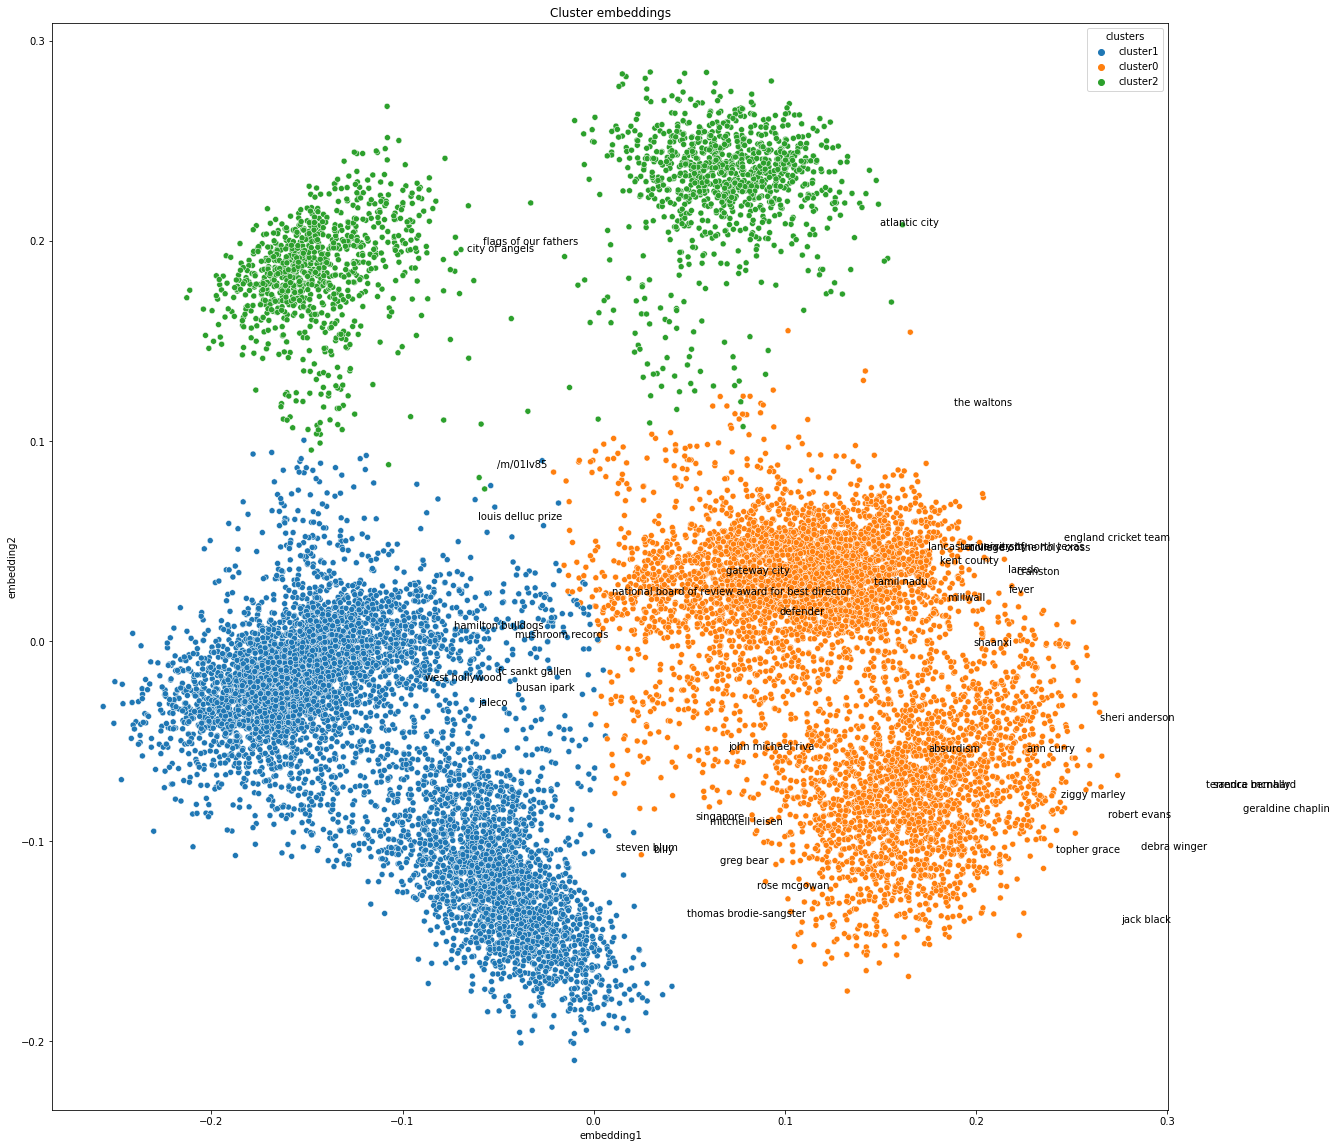

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Get the embeddings (150 dims) for all the entities of interest
jobs_embeddings = model.get_embeddings(all_entities, embedding_type='entity')

# Perform PCA and reduce the dims to 2
embeddings_2d = PCA(n_components=2).fit_transform(np.array([emb for emb in jobs_embeddings]))

# Create a dataframe to plot the embeddings using scatterplot
df = pd.DataFrame({"entities": all_entities, "clusters": "cluster" + pd.Series(clusters).astype(str),
                    "embedding1": embeddings_2d[:, 0], "embedding2": embeddings_2d[:, 1]})

plt.figure(figsize=(20, 20))
plt.title("Cluster embeddings")

ax = sns.scatterplot(data=df, x="embedding1", y="embedding2", hue="clusters")

# Print only a few labels, to avoid clutter, using adjust_text
# from adjustText import adjust_text
texts = []
for i, point in df.iterrows():
    # randomly choose a few labels to be printed
    if np.random.uniform() < 0.003:
        texts.append(plt.text(point['embedding1']+.1, point['embedding2'], str(point['entities'])))

# adjust_text(texts)
plt.show()

### 8.3 Hypothesis Generation

Other times you may wish to discover **any** potential new facts from an existing knowledge graph.

With a knowledge graph containing millions of entities the space of possible facts is huge, and evaluating all of them can take a very long time. In order to speed up this task we have implemented a number of sampling strategies.

The strategies implemented include:
>    ```entity_frequency```, ```graph_degree```, ```cluster_coefficient```, ```cluster_triangles```, ```cluster_squares```, ```random_uniform```, ```exhaustive```.

Entities in all strategies excluding ```random_uniform```, ```exhaustive``` are sorted in ascending fashion, on the assumption that frequent or densely connected entities are less likely to have missing true statements.

The general procedure is to generate a set of candidate statements, and then rank them against a set of corruptions using the ```ampligraph.evaluation.evaluate_performance()``` function.

A sampling weight is calculated for each entity using the specified strategy, and ```max_candidates``` are sampled to produce the candidate triple set.

Candidates are then evaluated to obtain a rank, and triples that appear in the ```top_n``` ranked statements of evaluation procedure are returned as potentially true statements.
            


In [ ]:
from ampligraph.discovery import discover_facts

triples, ranks = discover_facts(dataset.values,
                                model,
                                top_n=500,
                                max_candidates=500,
                                strategy='cluster_triangles',
                                target_rel='/people/person/profession',
                                seed=42)

for triple, rank in zip(triples, ranks):
    print('Rank: {} \t {} '.format(rank, triple))


WARNING - DeprecationWarning: use_default_protocol will be removed in future. Please use corrupt_side argument instead.


100%|██████████| 500/500 [00:01<00:00, 254.11it/s]


Rank: 6.0 	 ['bob clampett' '/people/person/profession' 'actor'] 
Rank: 298.0 	 ['bob boyle' '/people/person/profession' 'actor'] 
Rank: 298.5 	 ['thomas newman' '/people/person/profession' 'actor'] 


### 9. Visualizing embeddings using Tensorboard

Tensorboard Projector allows us to visualize high dimensional embeddings in a graphical interface. This can be useful to examine and understand embedded concepts.

Ampligraph provides a single function for creating the Tensorboard files, [create_tensorboard_visualizations](https://docs.ampligraph.org/en/latest/generated/ampligraph.utils.create_tensorboard_visualizations.html#ampligraph.utils.create_tensorboard_visualizations), as demonstrated below.


In [ ]:
from ampligraph.utils import create_tensorboard_visualizations

model = restore_model('TransE.pkl')

create_tensorboard_visualizations(model, 'embeddings_transe')

Run the cell below to run tensorboard, and it will open in a different browser window with the tensorboard interface.

In [ ]:
# This will not work in google colab - only uncomment and run if using jupyter notebook

# ! tensorboard --logdir='./embeddings_transe'

## Homework

1. **(Data)**: Create a knowledge graph dataset relevant to your social science interest.

2. **(Deep Embedding)**
   - Run a knowledge graph embedding algorithm on your dataset.
   - Visualise your embeddings and run distance metrics on them

3. **(Reflection)**
   - Evaluate your model and **report** on:
     - Evaluate with mean rank, MRR, or hits@N
     - Where they performed poorly, and your hypothesis **why**.

---